In [1]:
from multiprocessing import set_start_method
set_start_method('forkserver')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-paper')
sns.set_style('white')
sns.set_context('paper')

### Read datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Identify missing values

In [4]:
train.columns[train.isnull().sum()>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
test.columns[test.isnull().sum()>0]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

### A peek at the training dataset

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Identify correlations with the target

In [7]:
corr = train.corr()

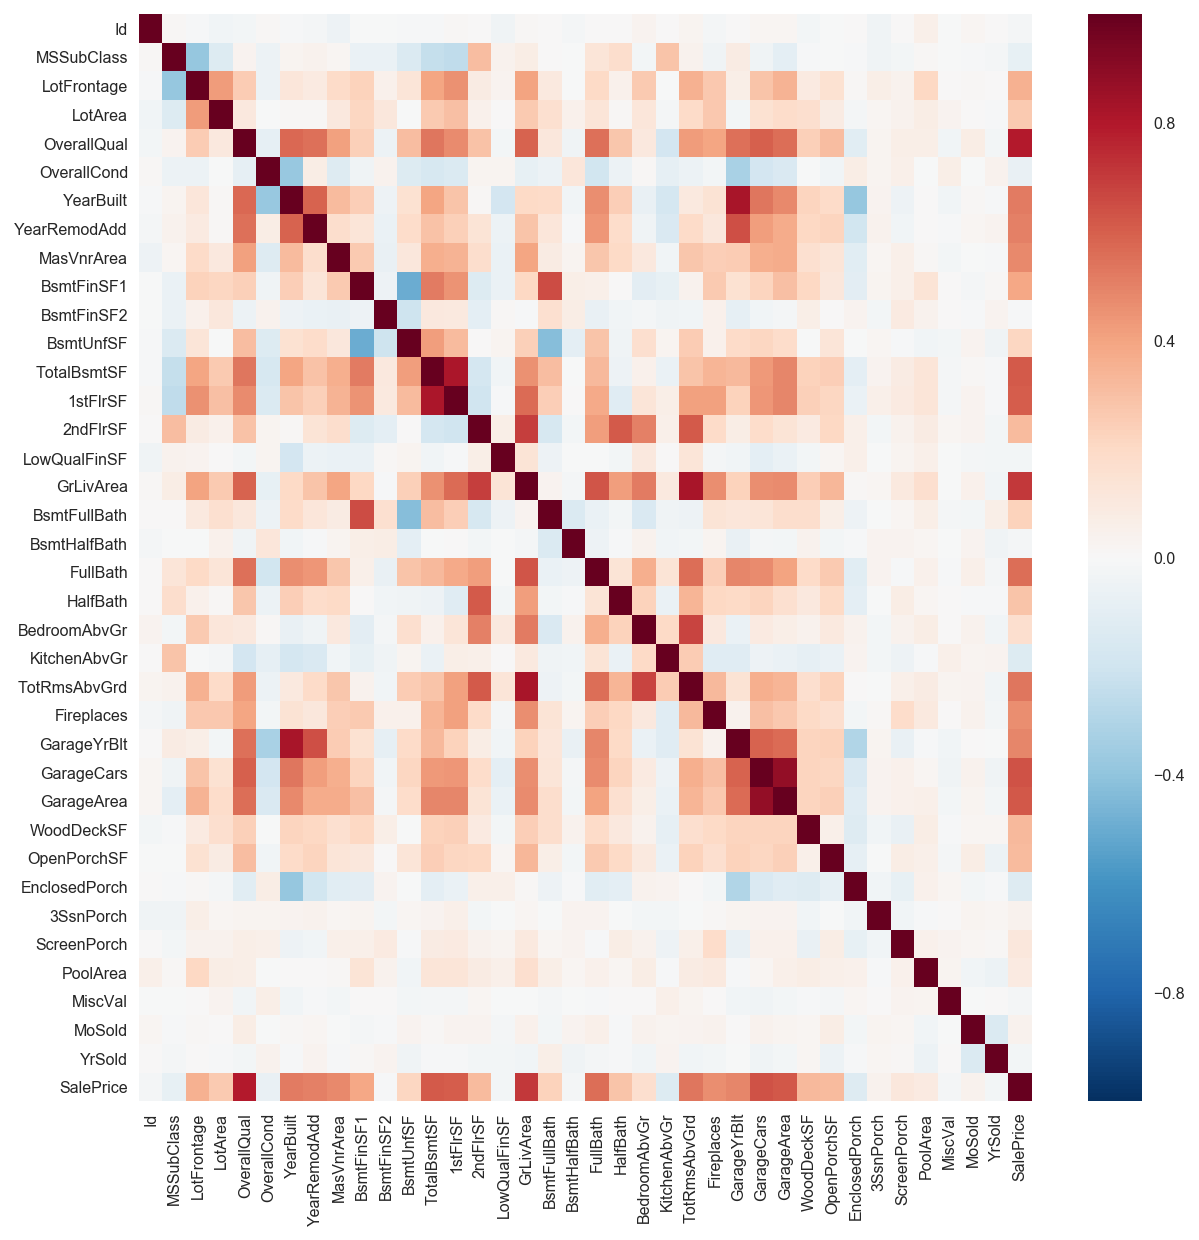

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(corr)

### Imputing missing values in the training dataset

In [9]:
train.loc[train.Electrical.isnull(), 'Electrical']

1379    NaN
Name: Electrical, dtype: object

In [10]:
cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 
        'Fence', 'MiscFeature']

In [11]:
# Deal with missing values
# cat_na(train, cols)
train[cols] = train[cols].fillna('Absent')
train.MasVnrType.fillna('None', inplace=True)
train.MasVnrArea.fillna(0, inplace=True)
train.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)
train.GarageYrBlt.fillna(1800, inplace=True)
train.Electrical.fillna('SBrkr', inplace=True)  # mode of train.Electrical
train.columns[train.isnull().sum()>0]

Index([], dtype='object')

### Imputing missing values in the test dataset

In [12]:
test[cols] = test[cols].fillna('Absent')
test.MasVnrType.fillna('None', inplace=True)
test.MasVnrArea.fillna(0, inplace=True)
test.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)
test.GarageYrBlt.fillna(1800, inplace=True)
test.Electrical.fillna('SBrkr', inplace=True)  # mode of train.Electrical


In [13]:
test.columns[test.isnull().sum()>0]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [14]:
mode_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 
             'Functional', 'SaleType']
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
             'BsmtHalfBath', 'GarageCars', 'GarageArea']
#test[mode_cols] = test[mode_cols].fillna(test[mode_cols].mode())
test[zero_cols] = test[zero_cols].fillna(0)
#test.loc[test.GarageCars.isnull(), ['GarageCars','GarageArea', 'GarageQual']]
# test.loc[test.KitchenQual.isnull(), 'KitchenAbvGr']

In [15]:
test.columns[test.isnull().sum()>0]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'],
      dtype='object')

In [16]:
for col in mode_cols:
    test[col].fillna(test[col].mode()[0], inplace=True)

test.columns[test.isnull().sum()>0]

Index([], dtype='object')

### Continuous variables

In [17]:
corr['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [18]:
train['log'] = np.log(train.SalePrice)
train = train[(train['GrLivArea'] <= 4000) & (train['GarageArea'] <= 1200)]

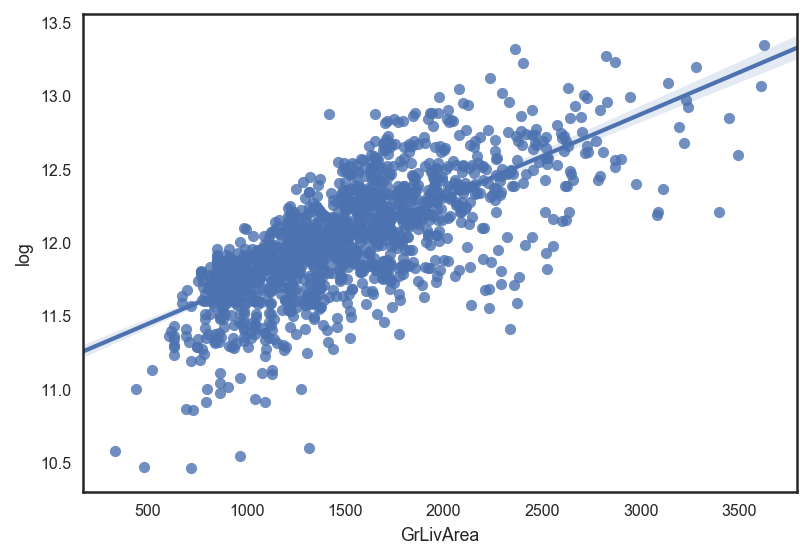

In [19]:
sns.regplot('GrLivArea', 'log', data=train)

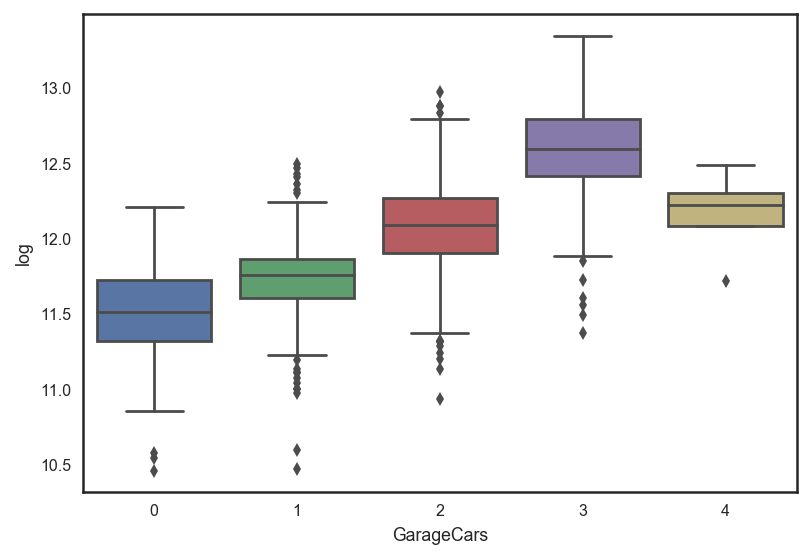

In [20]:
sns.boxplot('GarageCars', 'log', data=train)

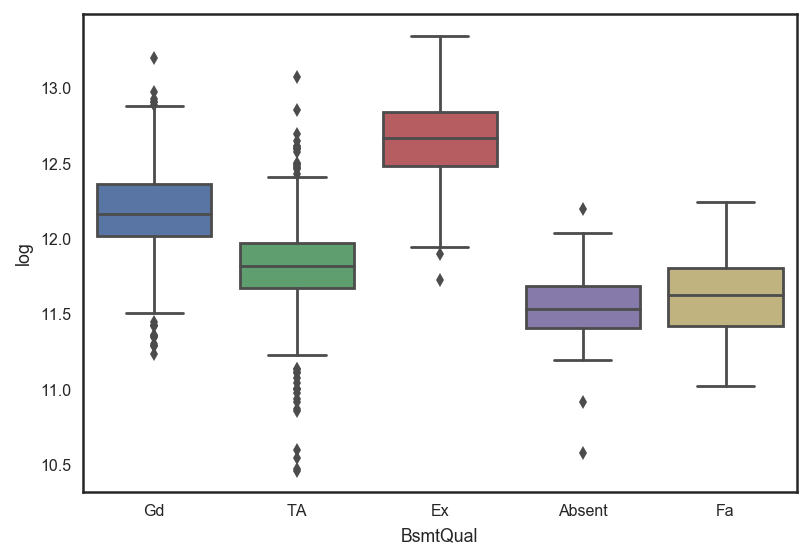

In [21]:
sns.boxplot('BsmtQual', 'log', data=train)

TA        1303
Gd          65
Fa          45
Absent      37
Po           2
Name: BsmtCond, dtype: int64

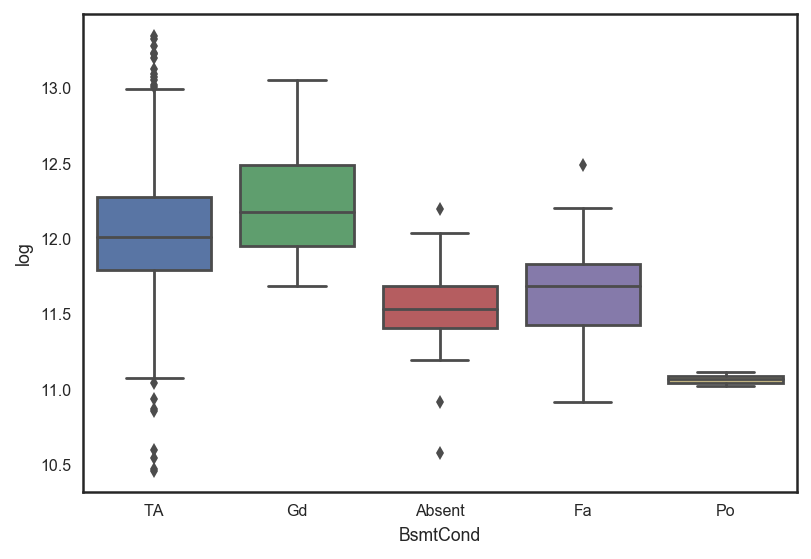

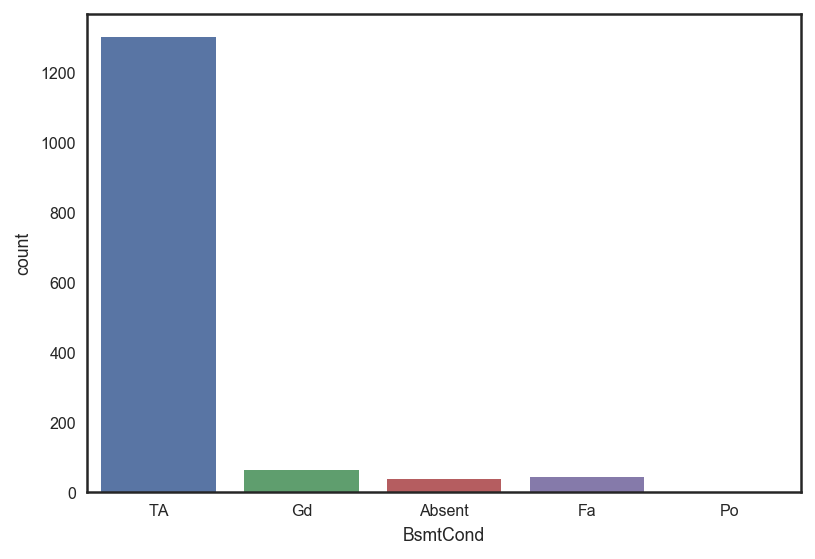

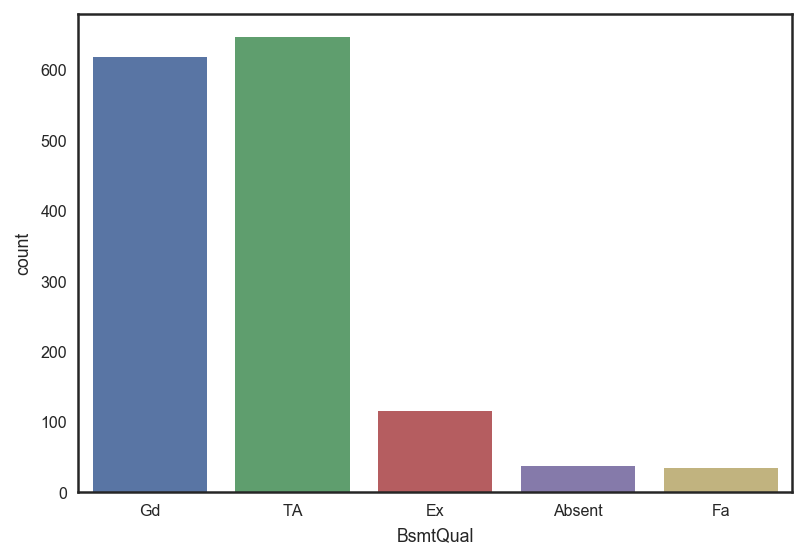

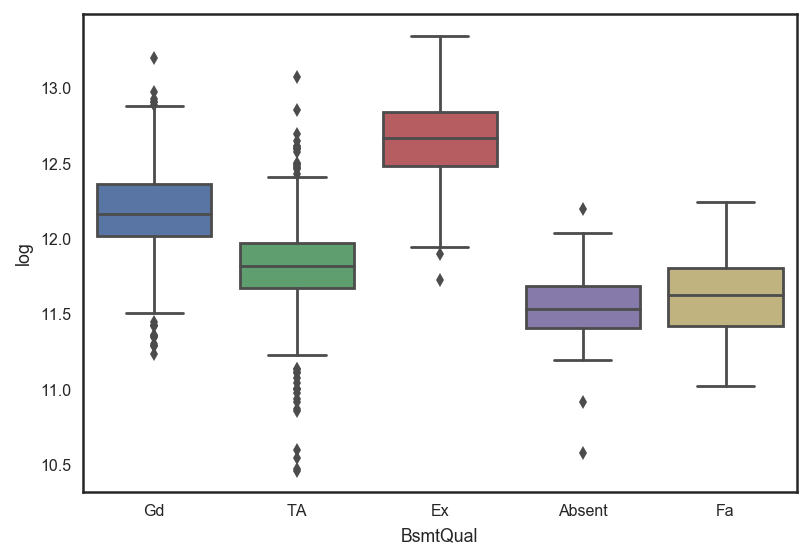

In [22]:
sns.boxplot('BsmtCond', 'log', data=train)
plt.figure()
sns.countplot('BsmtCond', data=train)
plt.figure()
sns.countplot('BsmtQual', data=train)
plt.figure()
sns.boxplot('BsmtQual', 'log', data=train)
train.BsmtCond.value_counts()

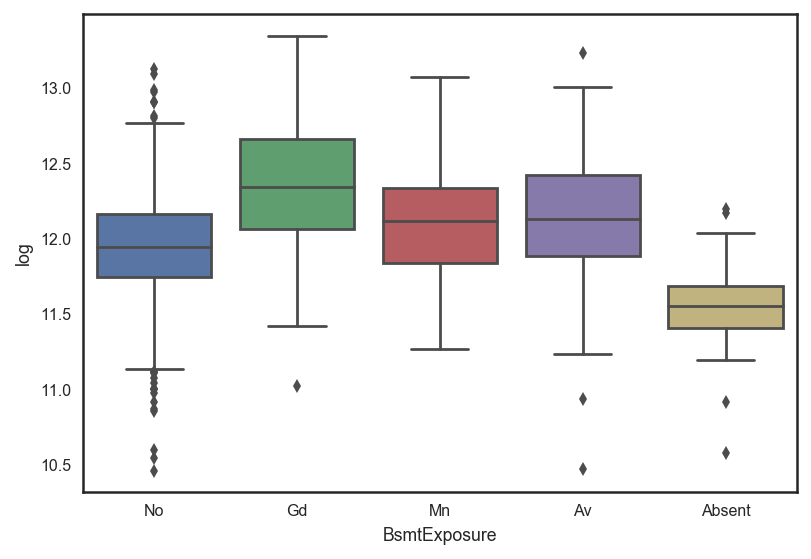

In [23]:
sns.boxplot(x='BsmtExposure', y='log', data=train)

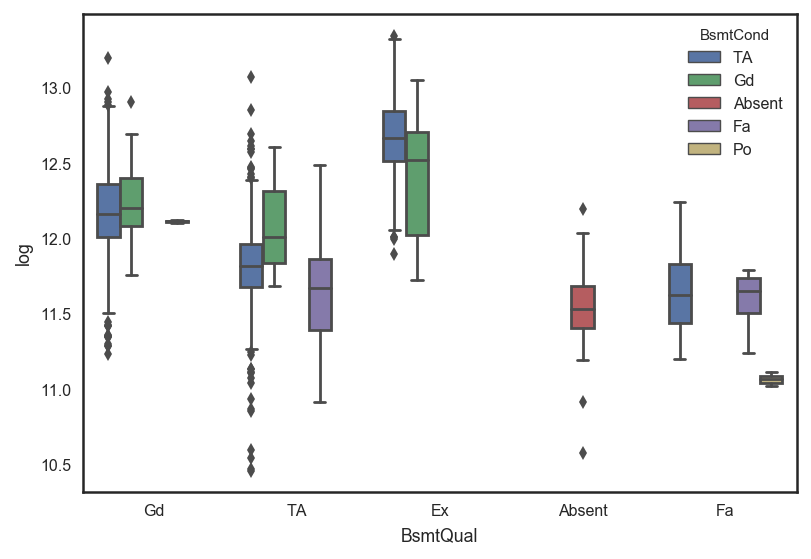

In [24]:
sns.boxplot(x='BsmtQual', y='log', hue='BsmtCond', data=train)

In [25]:
(train.BsmtCond == 'Po').sum()

2

Unf       428
GLQ       413
ALQ       220
BLQ       147
Rec       133
LwQ        74
Absent     37
Name: BsmtFinType1, dtype: int64

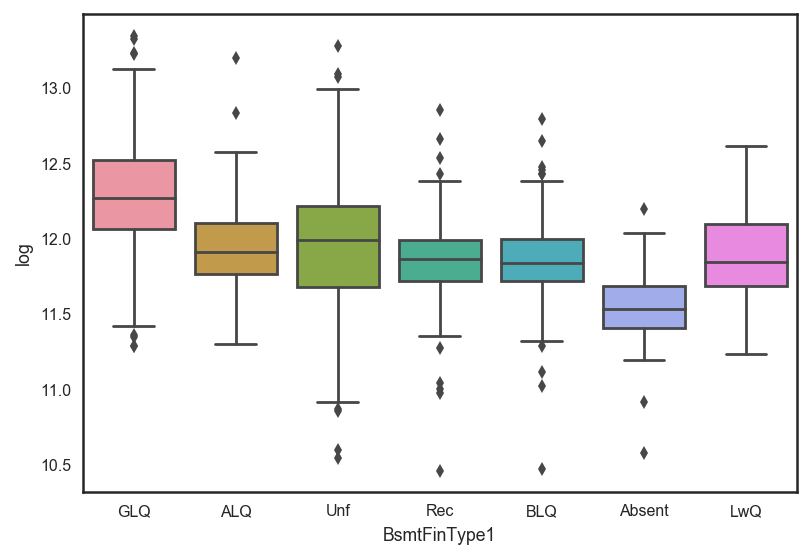

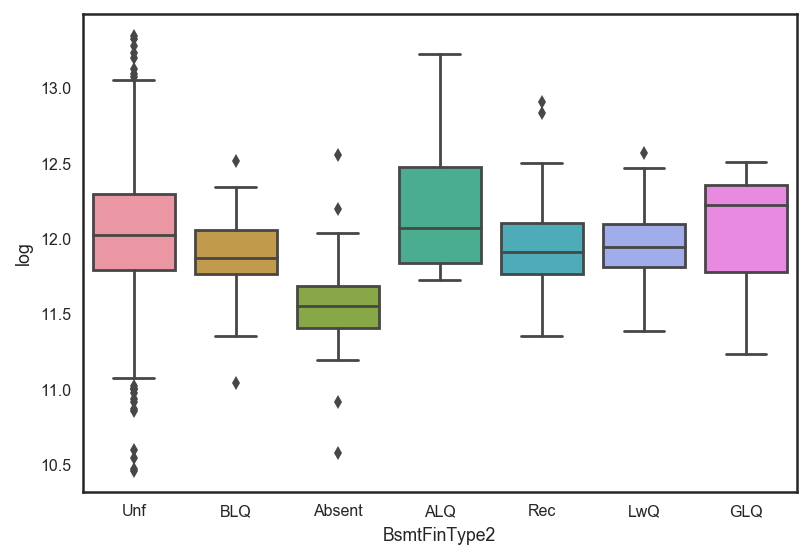

In [26]:
sns.boxplot('BsmtFinType1', 'log', data=train)
plt.figure()
sns.boxplot('BsmtFinType2', 'log', data=train)
train.BsmtFinType1.value_counts()

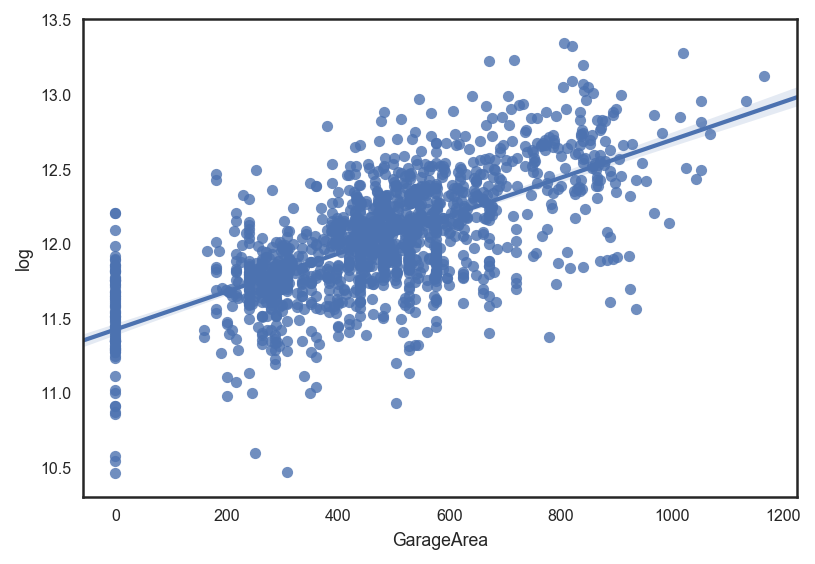

In [27]:
sns.regplot('GarageArea', 'log', data=train)

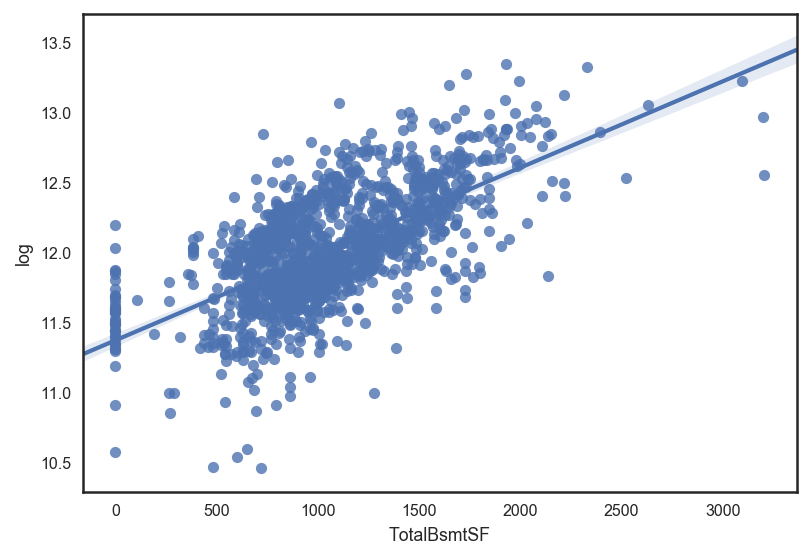

In [28]:
sns.regplot('TotalBsmtSF', 'log', train)

In [29]:
train['log_1stFlrSF'] = np.log(train['1stFlrSF'])
train['log_GrLivArea'] = np.log(train['GrLivArea'])
train['log_GarageArea'] = np.log(train['GarageArea']+100)
train['log_TotalBsmtSF'] = np.log(train.TotalBsmtSF + 100)

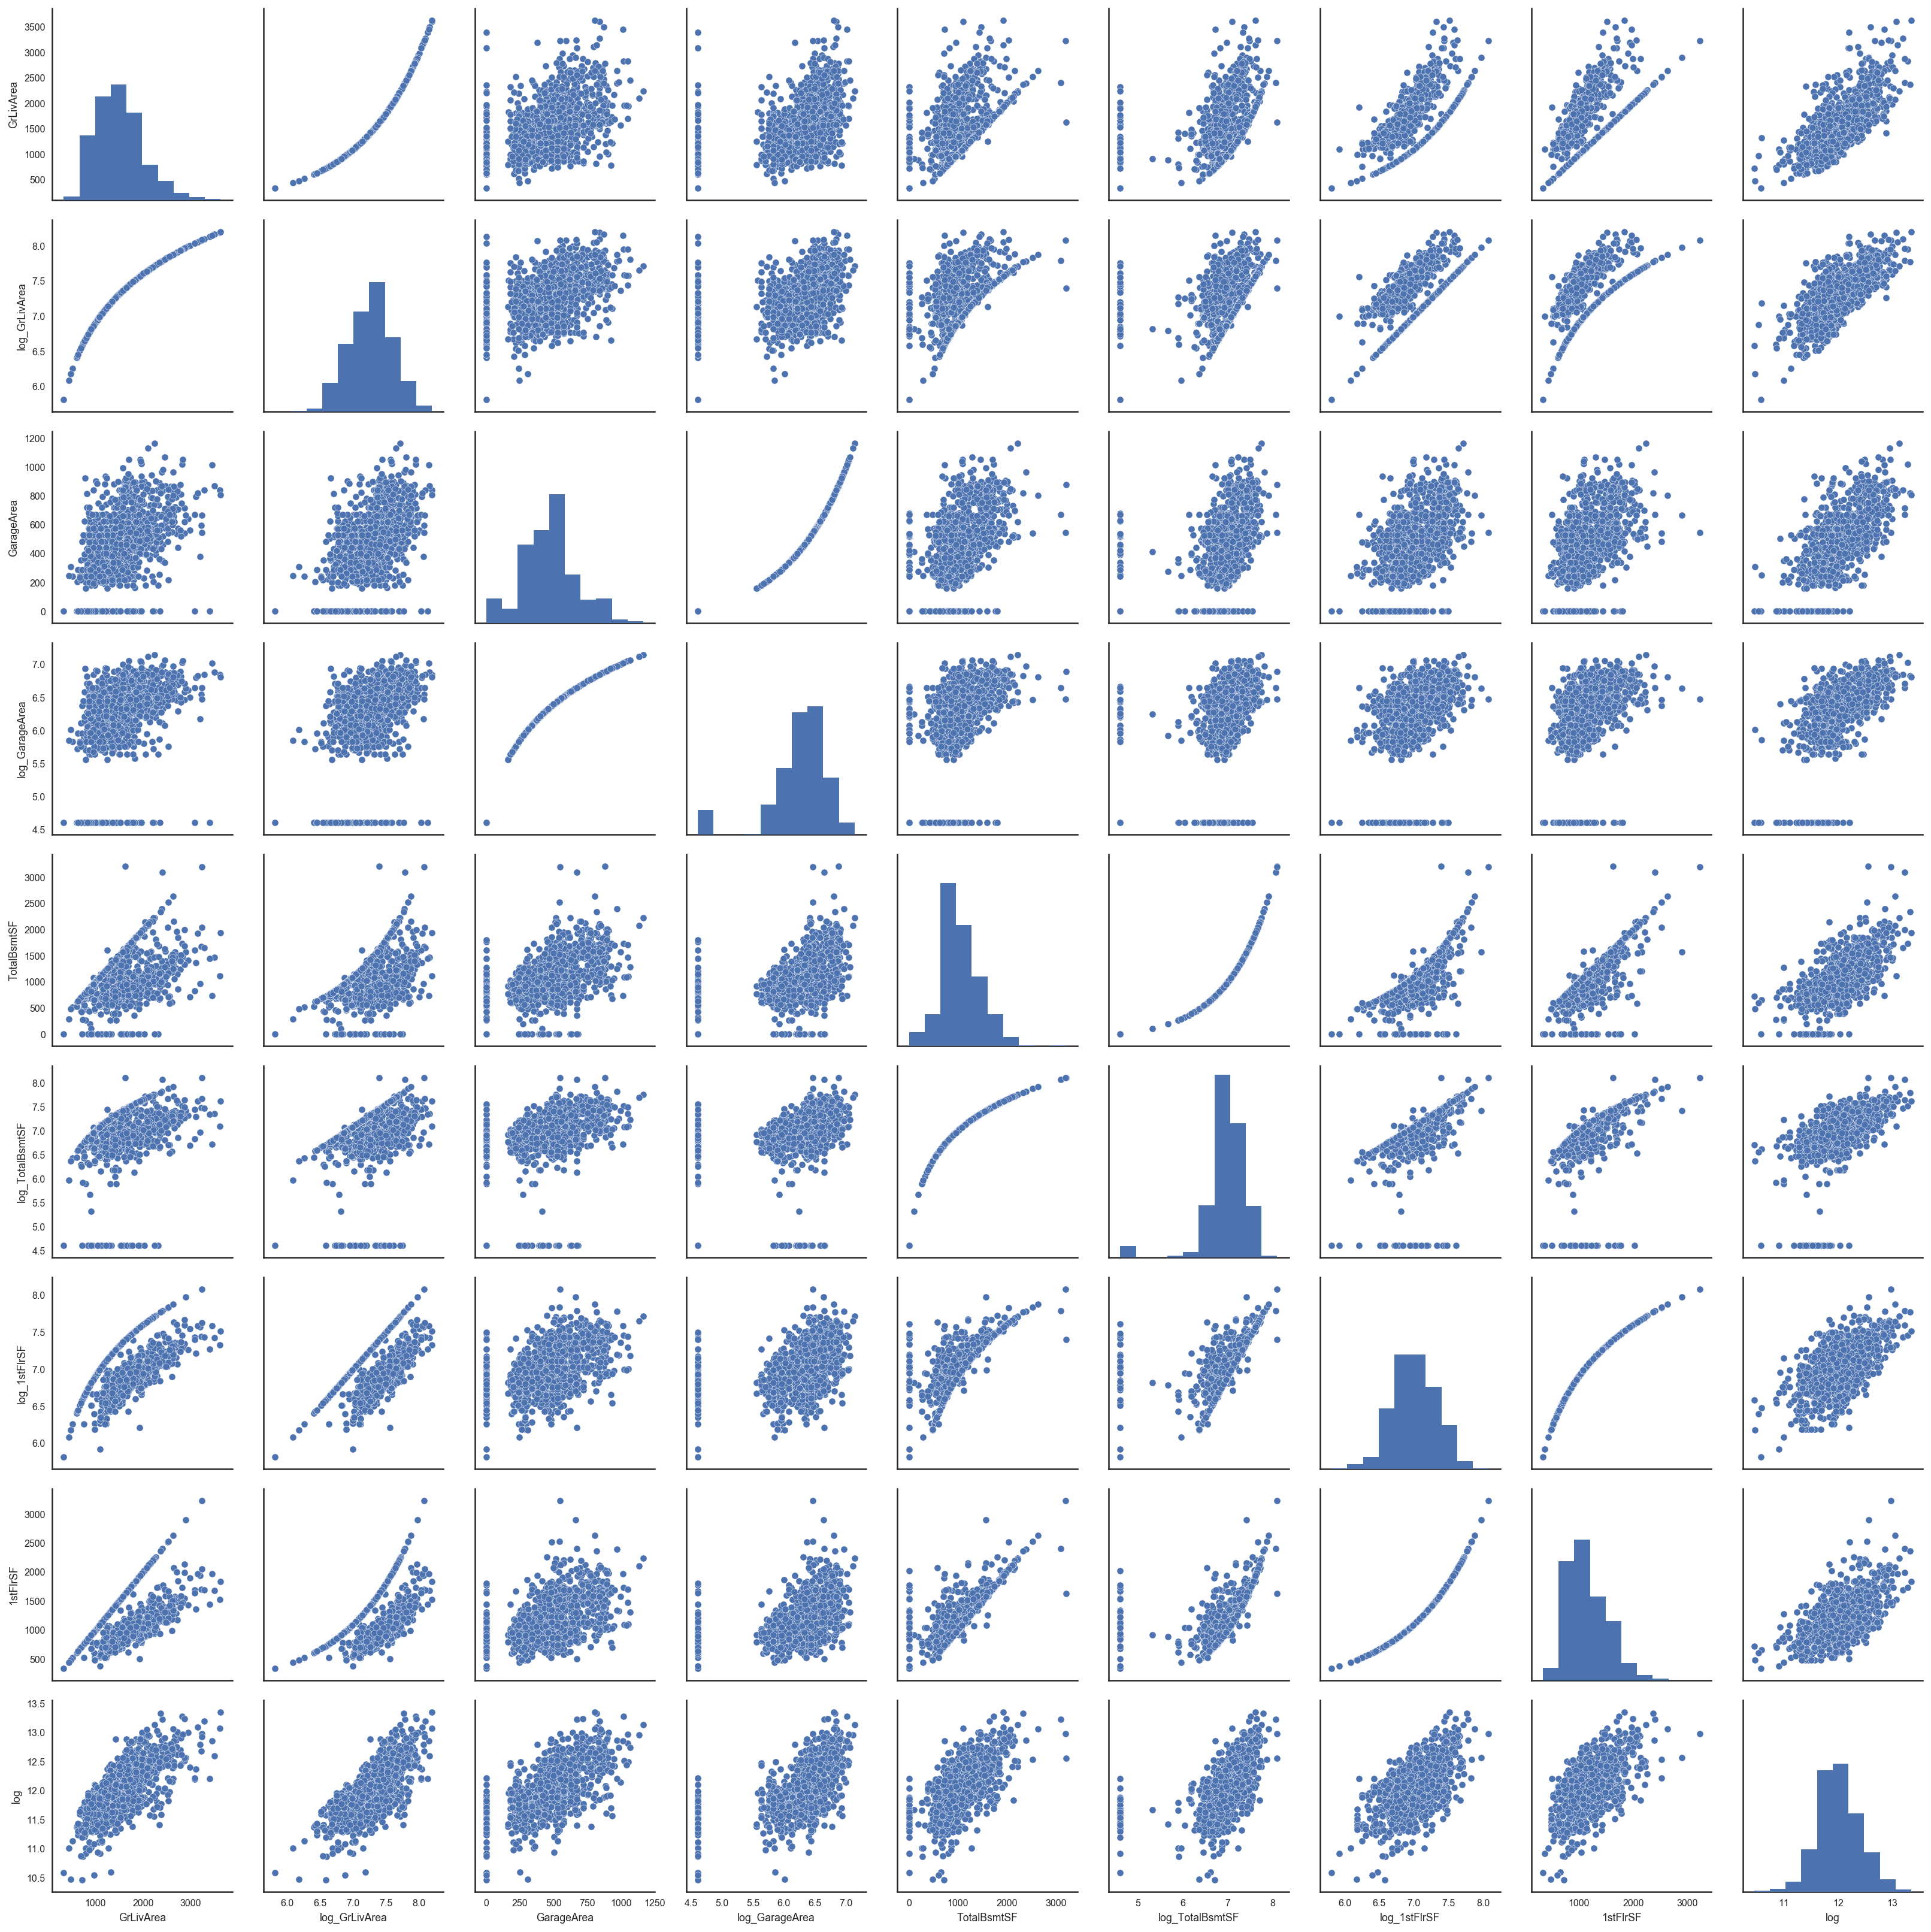

In [30]:
# sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'log_GrLivArea', 'GarageArea', 'log_GarageArea', 'TotalBsmtSF', 'log_TotalBsmtSF', 'log_1stFlrSF', '1stFlrSF','log']
sns.pairplot(train[cols])

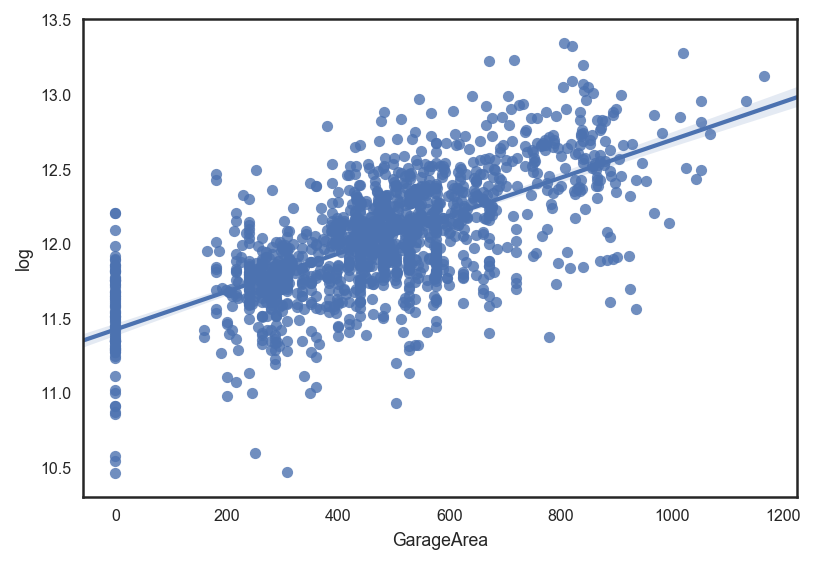

In [31]:
sns.regplot('GarageArea', 'log', train)

In [32]:
train.Alley.value_counts()

Absent    1361
Grvl        50
Pave        41
Name: Alley, dtype: int64

### Data exploration

* Categorical features

GasA     1420
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

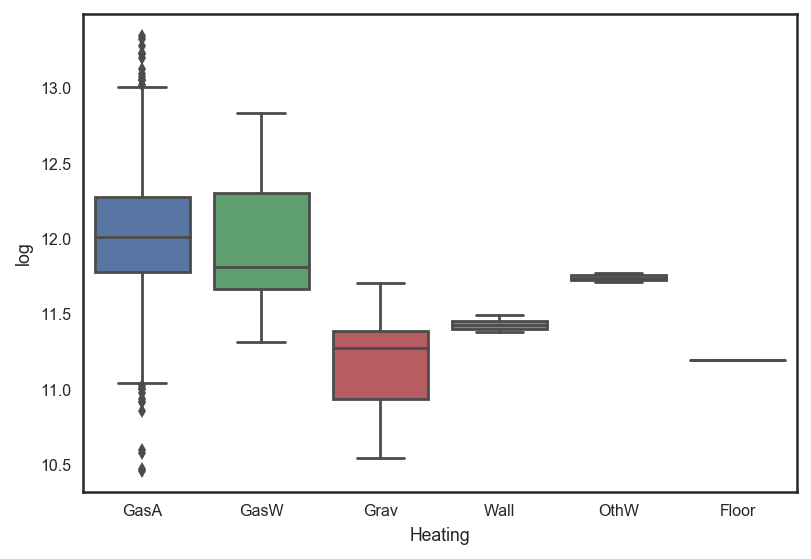

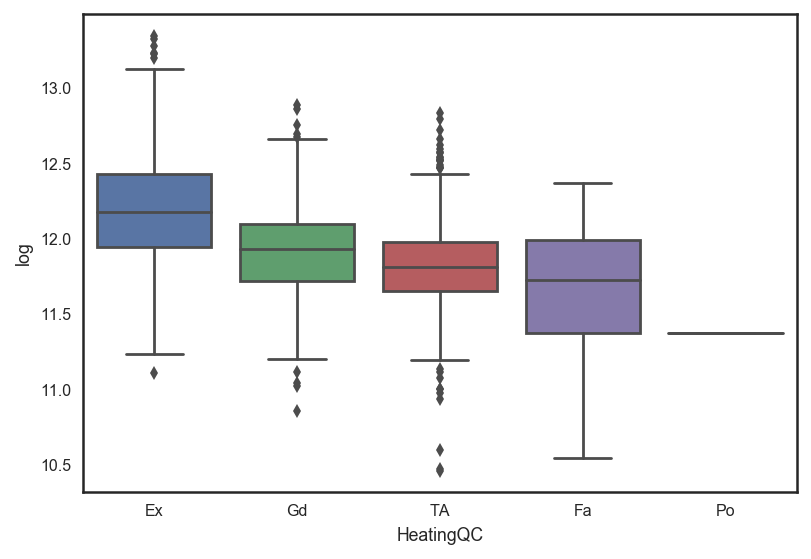

In [33]:

sns.boxplot('Heating', 'log', data=train)
plt.figure()
sns.boxplot('HeatingQC', 'log', data=train)
train.Heating.value_counts()

In [34]:
train.Heating.value_counts()

GasA     1420
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [35]:
train.HeatingQC.value_counts()

Ex    734
TA    427
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

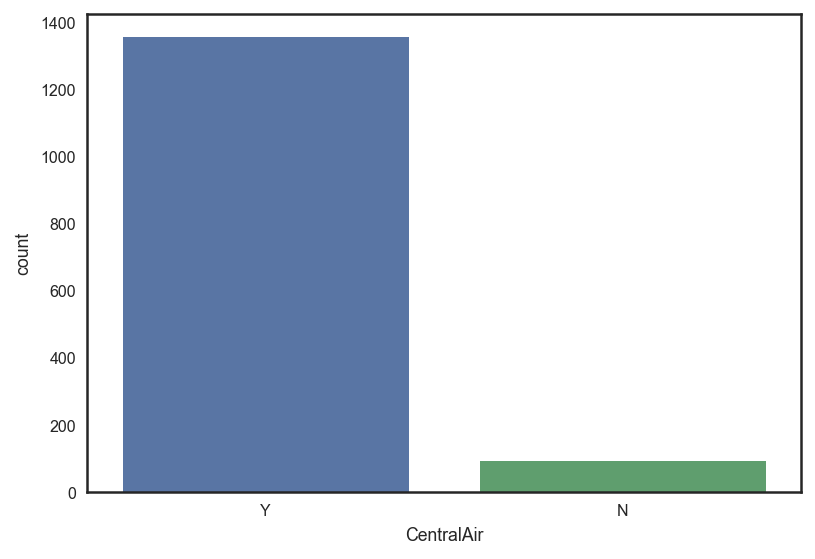

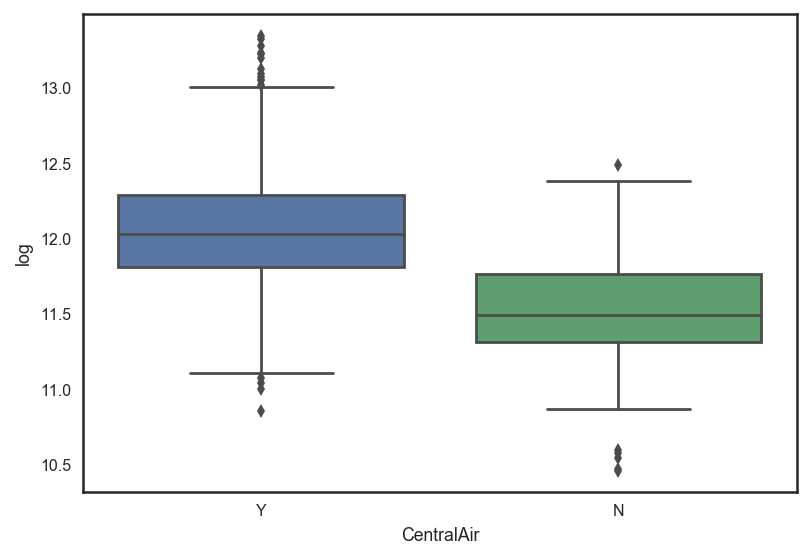

In [36]:
sns.countplot('CentralAir', data=train)
plt.figure()
sns.boxplot('CentralAir', 'log', data=train)

SBrkr    1327
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

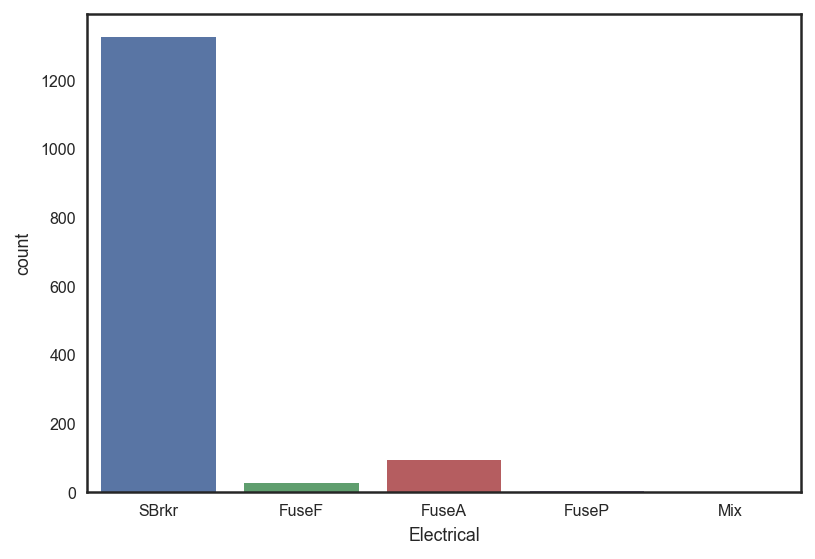

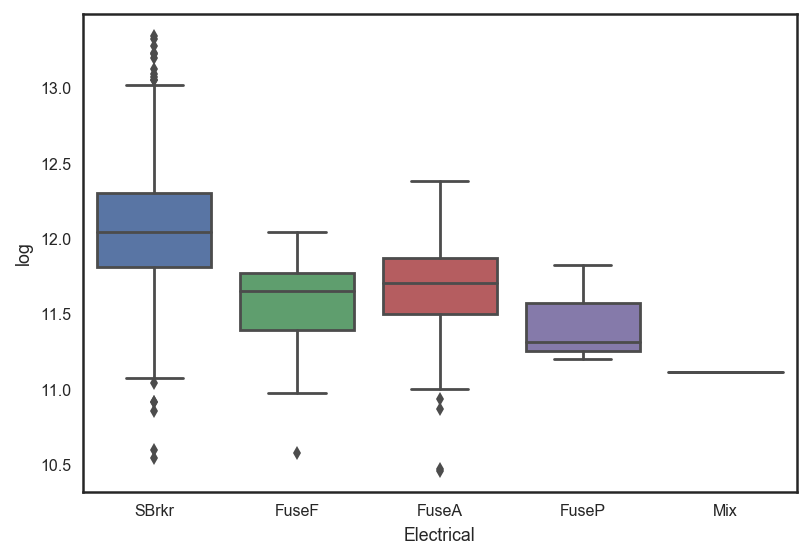

In [37]:
sns.countplot('Electrical', data=train)
plt.figure()
sns.boxplot('Electrical', 'log', data=train)
train.Electrical.value_counts()

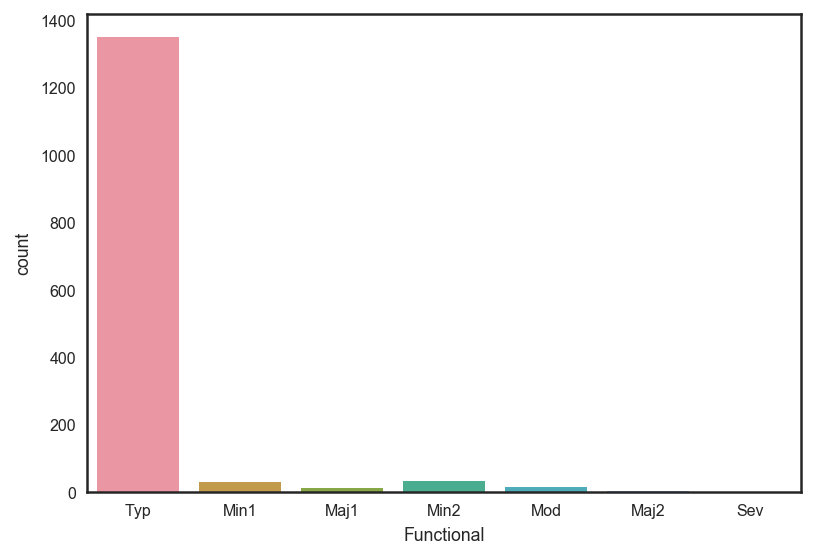

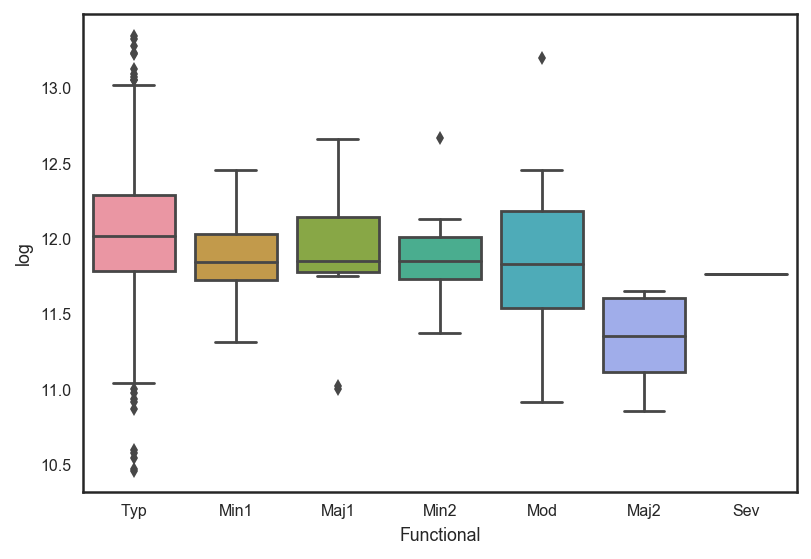

In [38]:
sns.countplot('Functional', data=train)
plt.figure()
sns.boxplot('Functional', 'log', data=train)

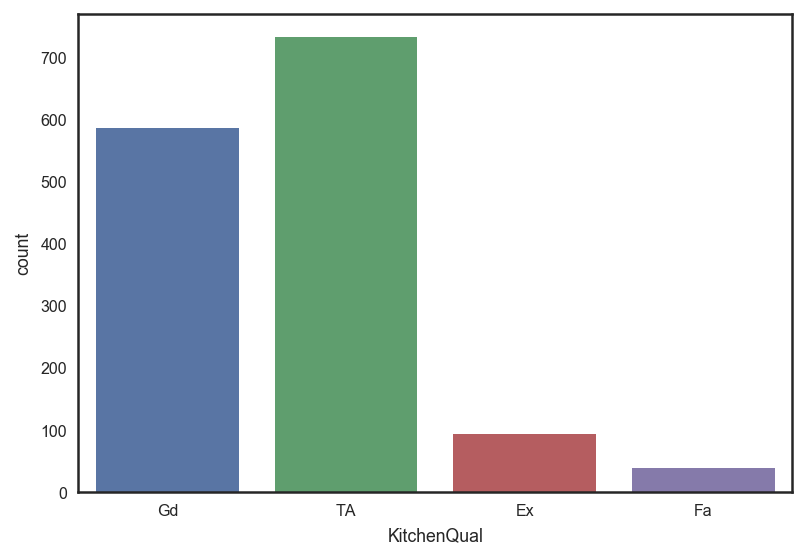

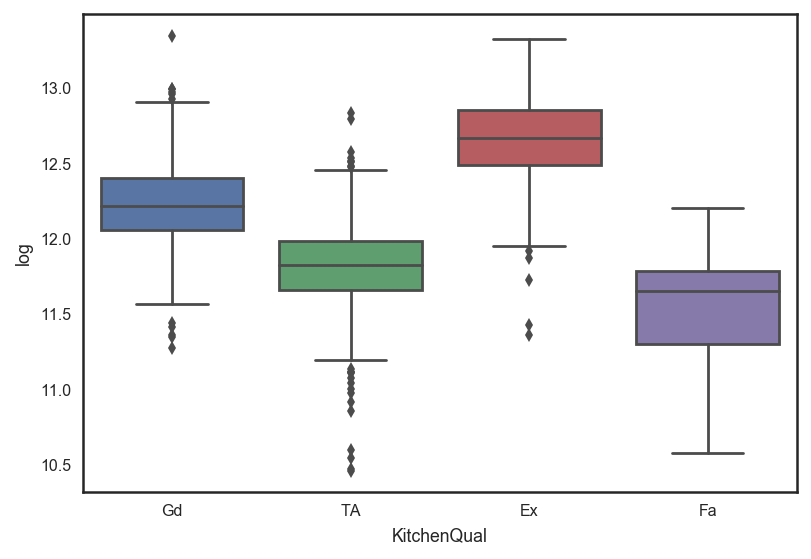

In [39]:
sns.countplot('KitchenQual', data=train)
plt.figure()
sns.boxplot('KitchenQual', 'log', data=train)

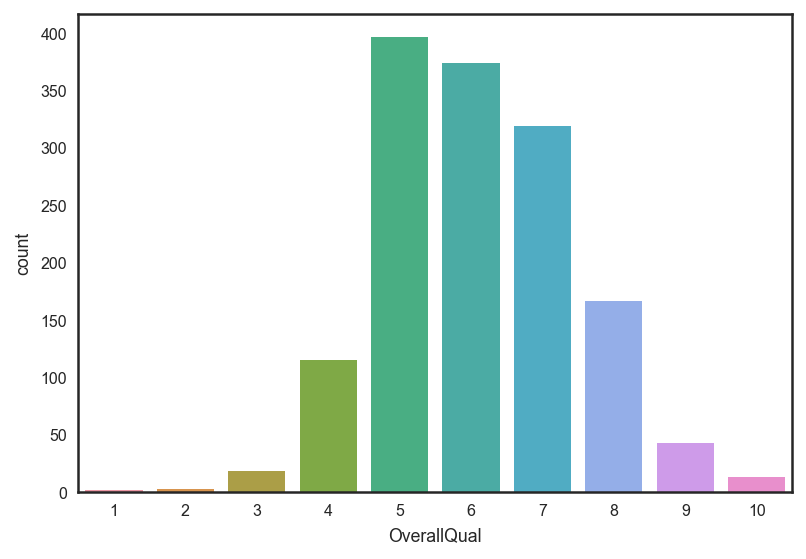

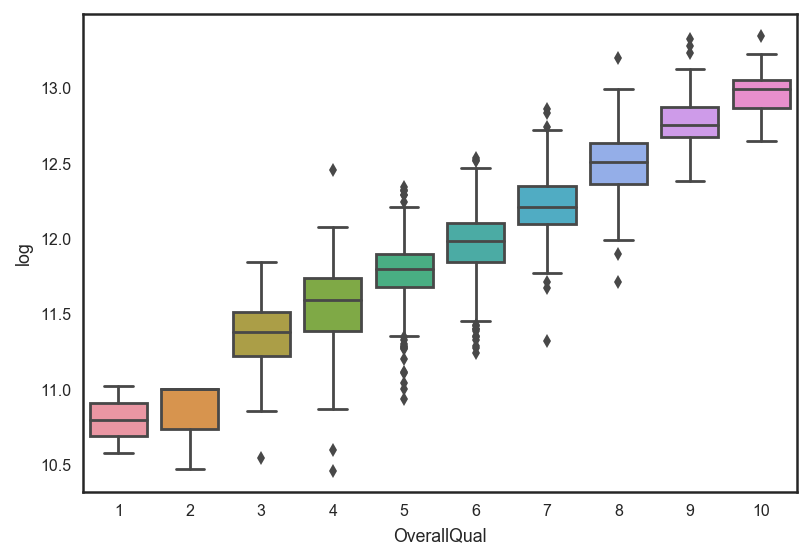

In [40]:
sns.countplot('OverallQual', data=train)
plt.figure()
sns.boxplot('OverallQual', 'log', data=train)

5    816
6    251
7    205
8     72
4     55
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

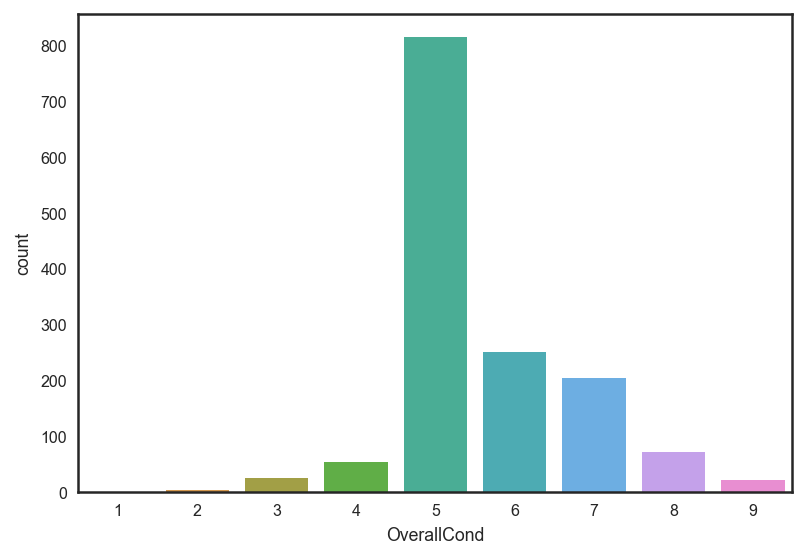

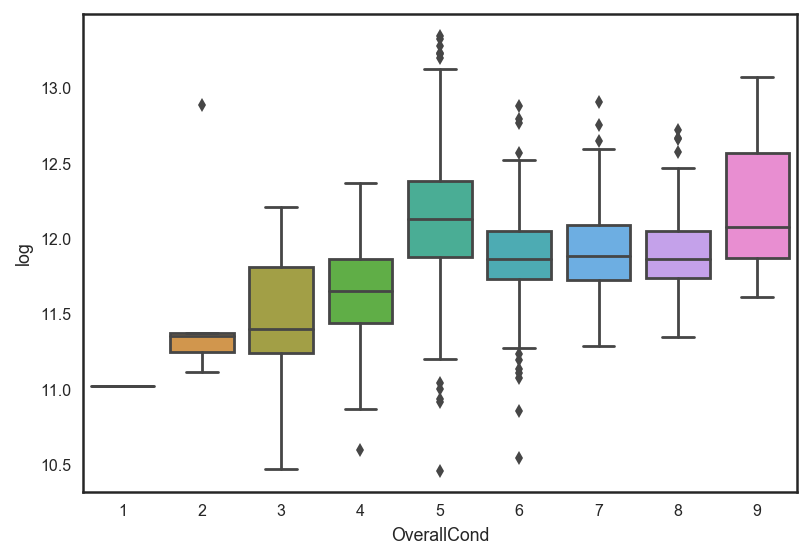

In [41]:
sns.countplot('OverallCond', data=train)
plt.figure()
sns.boxplot('OverallCond', 'log', data=train)
train.OverallCond.value_counts()

Absent    689
Gd        376
TA        311
Fa         33
Ex         23
Po         20
Name: FireplaceQu, dtype: int64

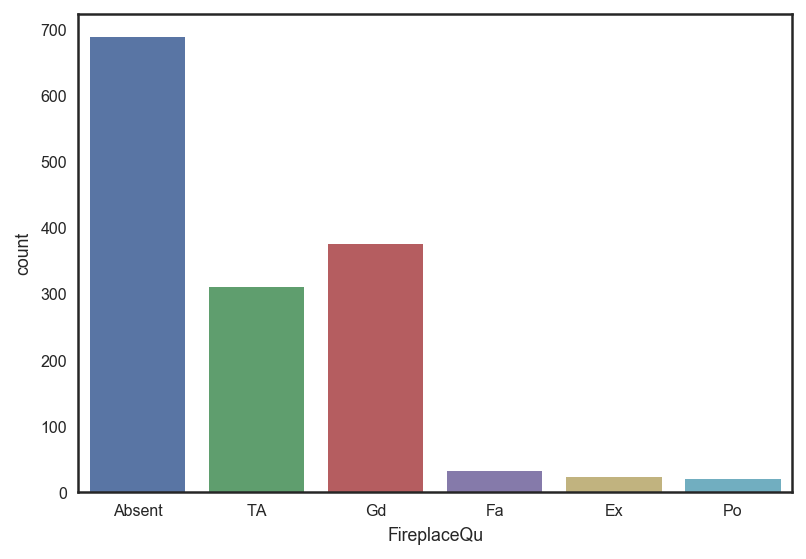

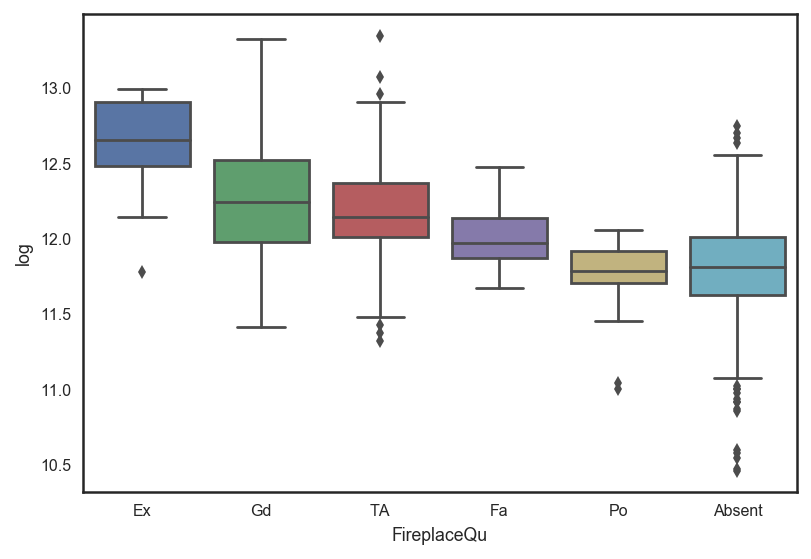

In [42]:
sns.countplot('FireplaceQu', data=train)
plt.figure()
sns.boxplot('FireplaceQu', 'log', data=train, order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Absent'])
train['FireplaceQu'].value_counts()

Attchd     865
Detchd     386
BuiltIn     87
Absent      81
Basment     19
CarPort      9
2Types       5
Name: GarageType, dtype: int64

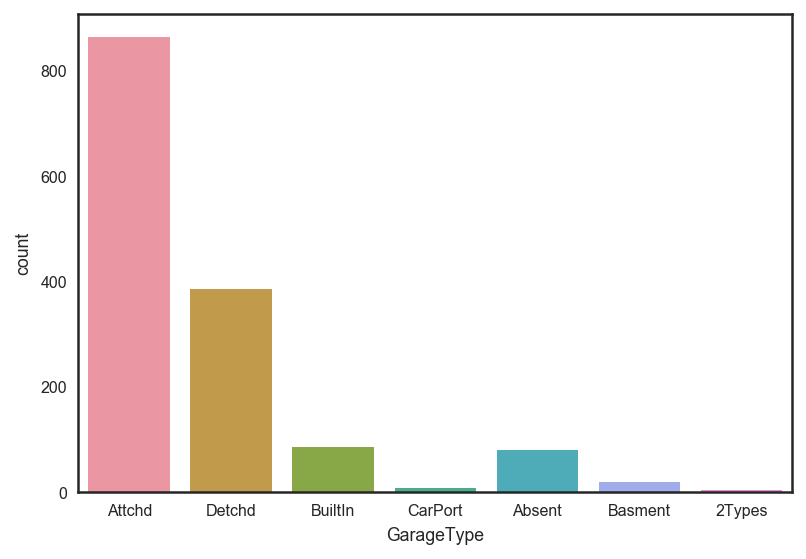

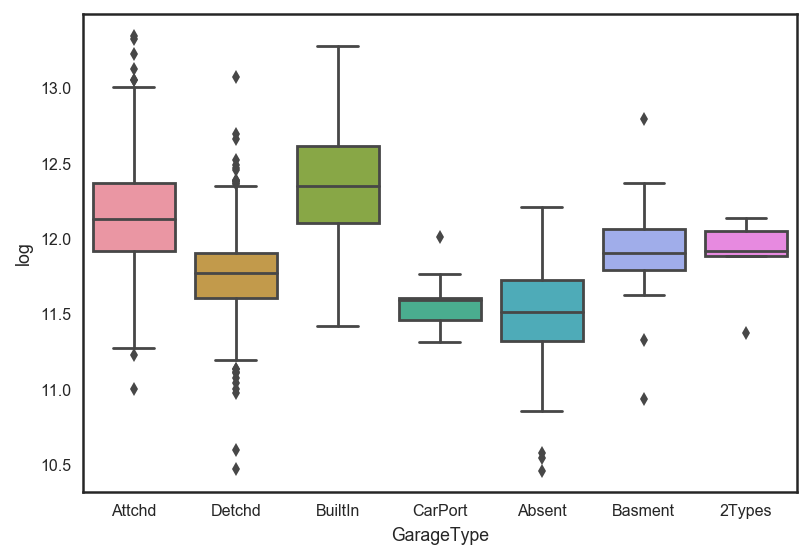

In [43]:
sns.countplot('GarageType', data=train)
plt.figure()
sns.boxplot('GarageType', 'log', data=train)
train['GarageType'].value_counts()

Unf       605
RFn       420
Fin       346
Absent     81
Name: GarageFinish, dtype: int64

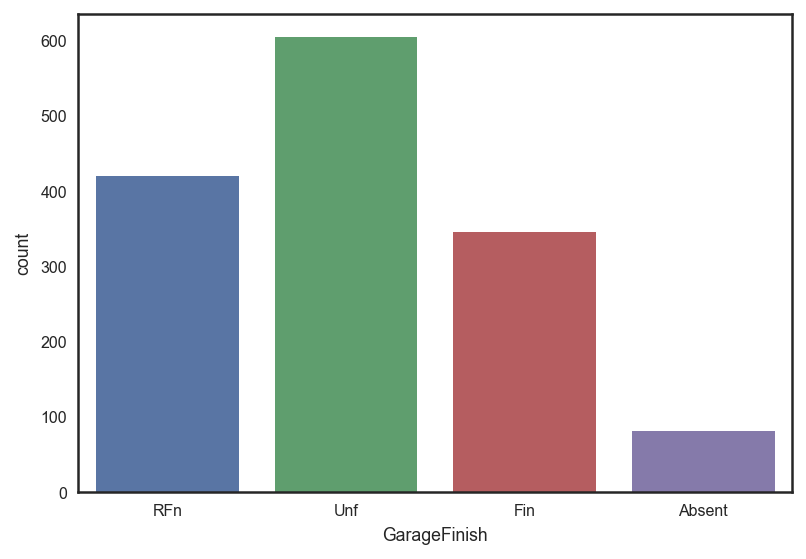

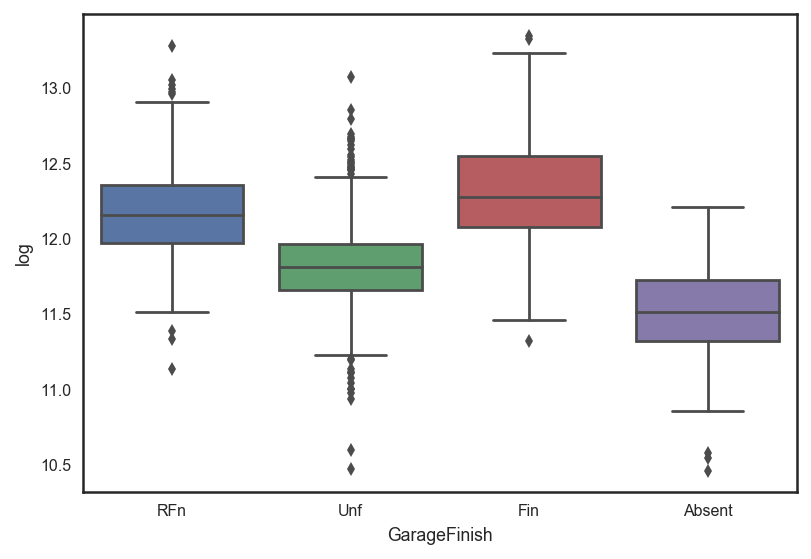

In [44]:
sns.countplot('GarageFinish', data=train)
plt.figure()
sns.boxplot('GarageFinish', 'log', data=train)
train['GarageFinish'].value_counts()

TA        1318
Absent      81
Fa          35
Gd           9
Po           7
Ex           2
Name: GarageCond, dtype: int64

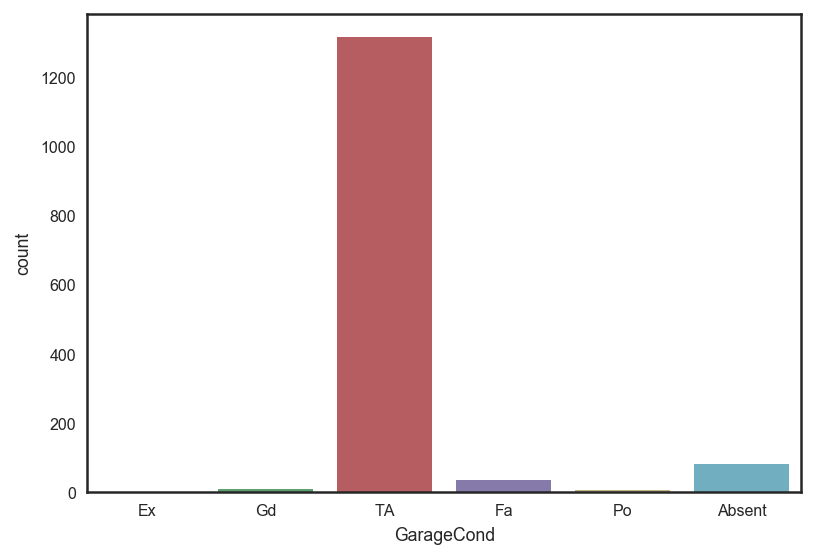

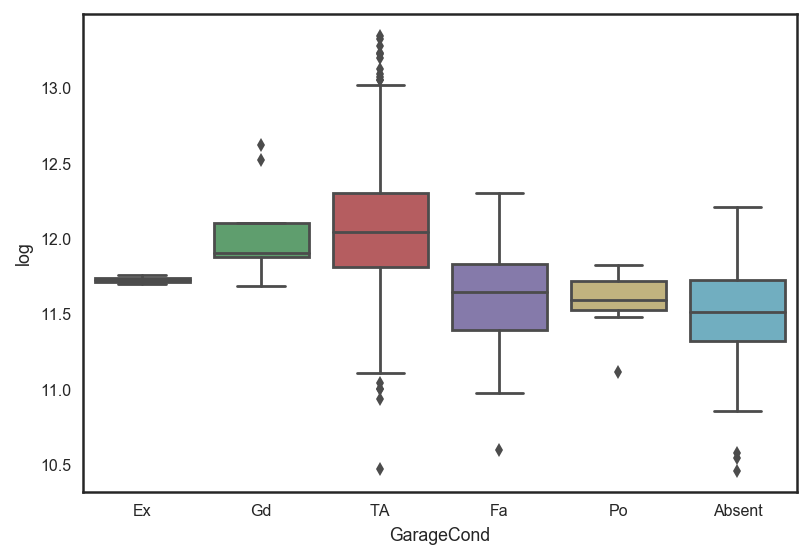

In [45]:
sns.countplot('GarageCond', data=train, order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Absent'])
plt.figure()
sns.boxplot('GarageCond', 'log', data=train, order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Absent'])
train['GarageCond'].value_counts()

Y    1332
N      90
P      30
Name: PavedDrive, dtype: int64

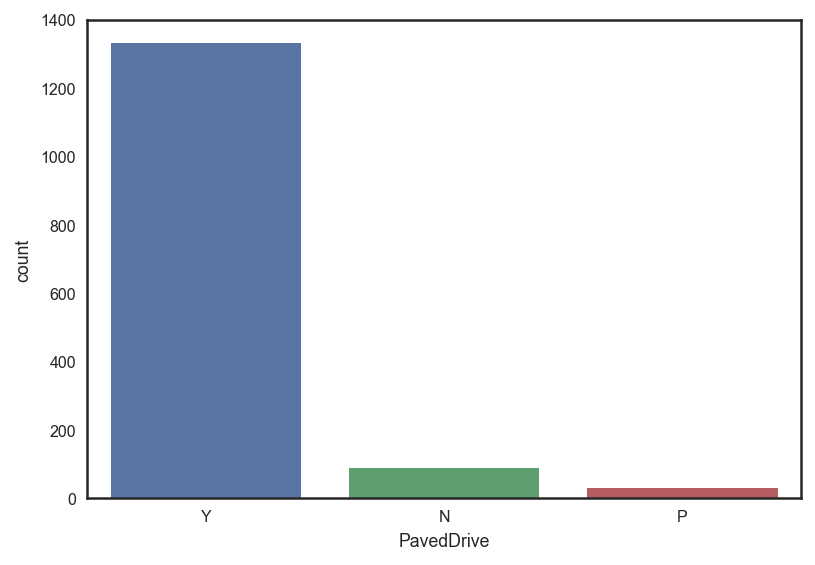

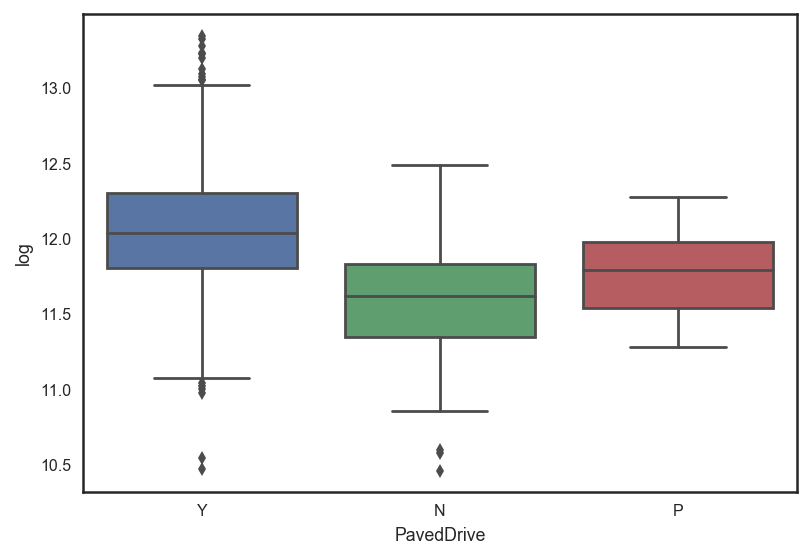

In [46]:
sns.countplot('PavedDrive', data=train)
plt.figure()
sns.boxplot('PavedDrive', 'log', data=train)
train['PavedDrive'].value_counts()

Absent    1447
Fa           2
Gd           2
Ex           1
Name: PoolQC, dtype: int64

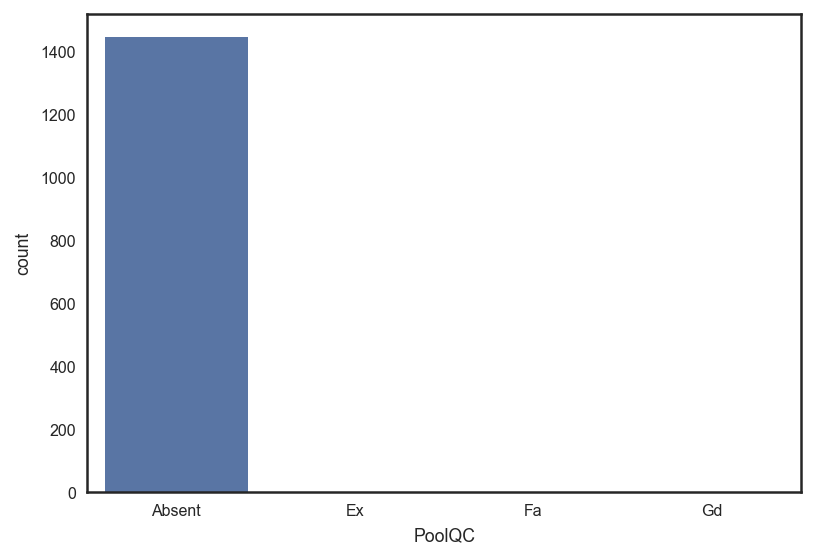

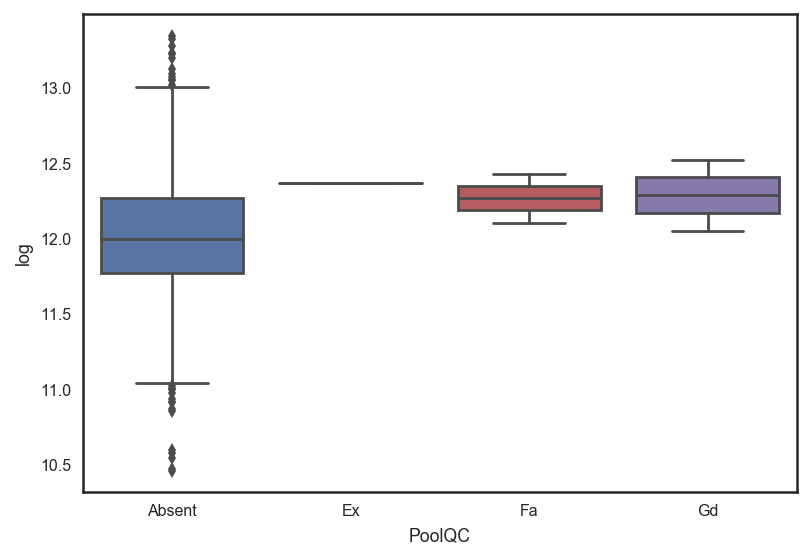

In [47]:
sns.countplot('PoolQC', data=train)
plt.figure()
sns.boxplot('PoolQC', 'log', data=train)
train['PoolQC'].value_counts()

Absent    1399
Shed        48
Othr         2
Gar2         2
TenC         1
Name: MiscFeature, dtype: int64

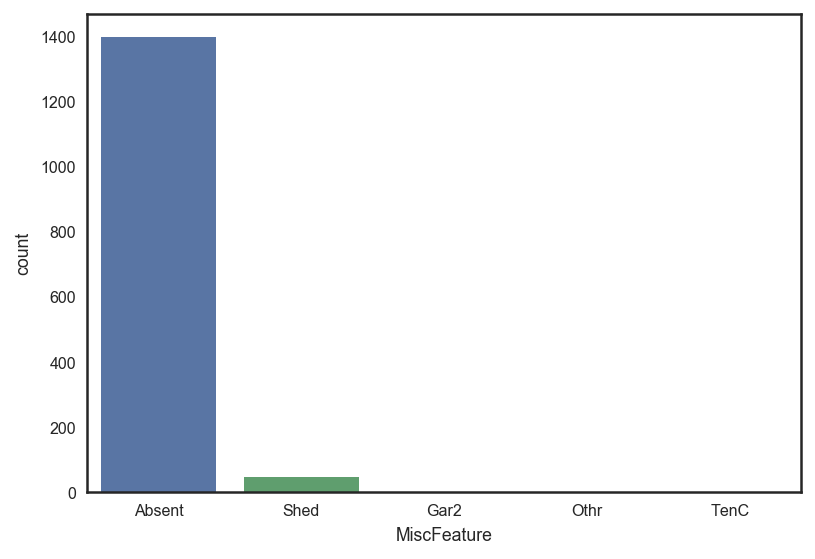

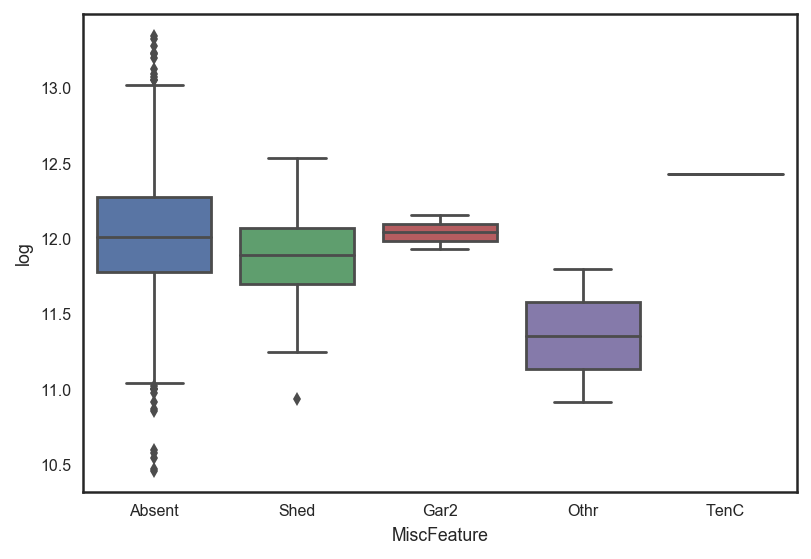

In [48]:
sns.countplot('MiscFeature', data=train)
plt.figure()
sns.boxplot('MiscFeature', 'log', data=train)
train['MiscFeature'].value_counts()

WD       1264
New       118
COD        43
ConLD       8
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

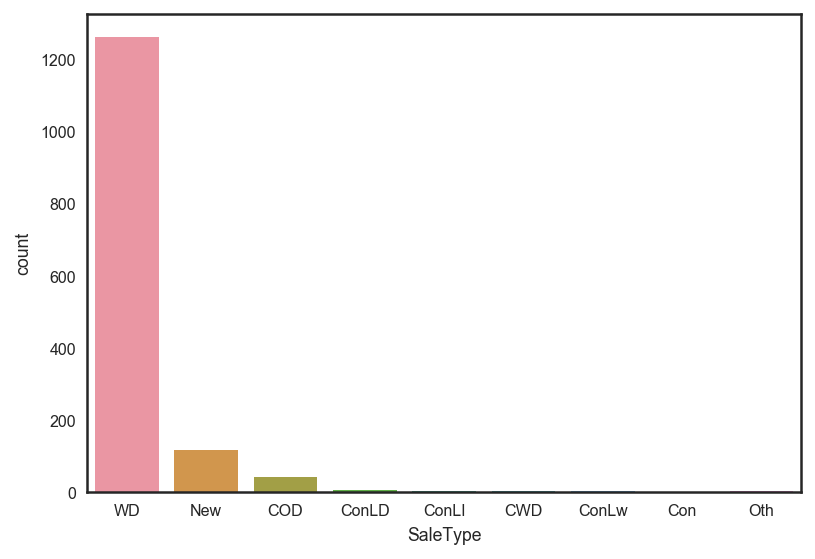

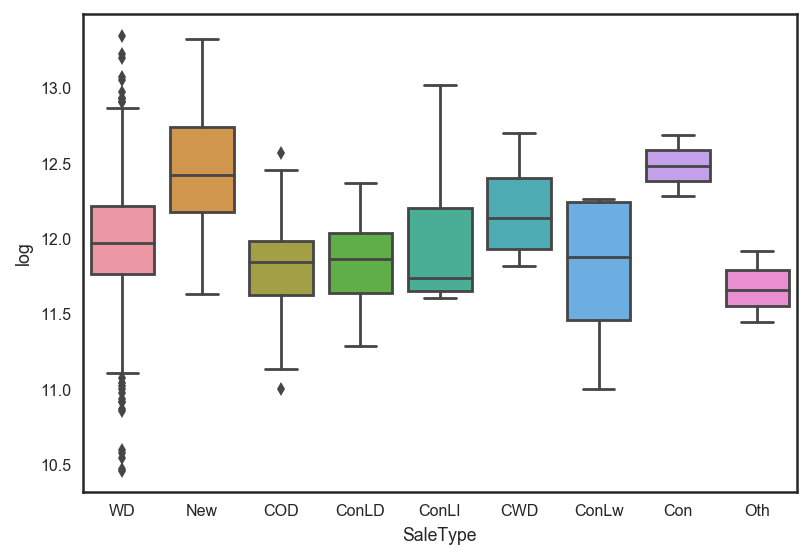

In [49]:
sns.countplot('SaleType', data=train)
plt.figure()
sns.boxplot('SaleType', 'log', data=train)
train['SaleType'].value_counts()

Normal     1195
Partial     121
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

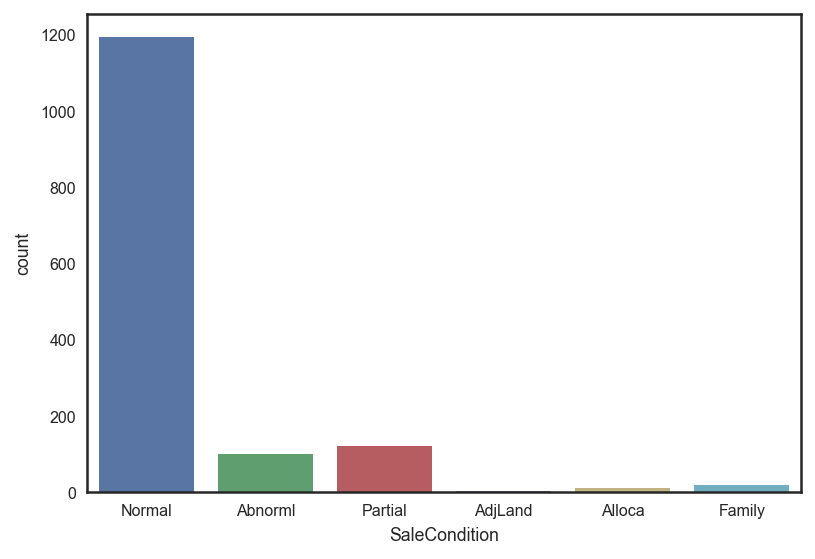

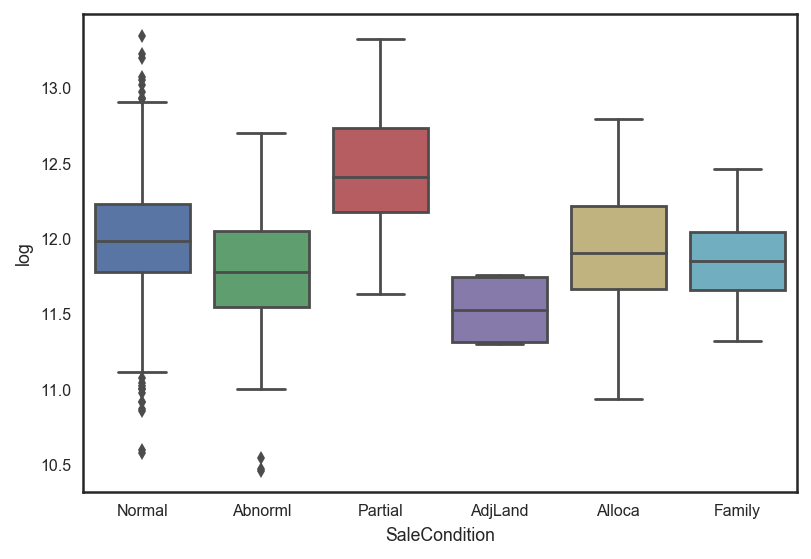

In [50]:
sns.countplot('SaleCondition', data=train)
plt.figure()
sns.boxplot('SaleCondition', 'log', data=train)
train['SaleCondition'].value_counts()

RL         1144
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64

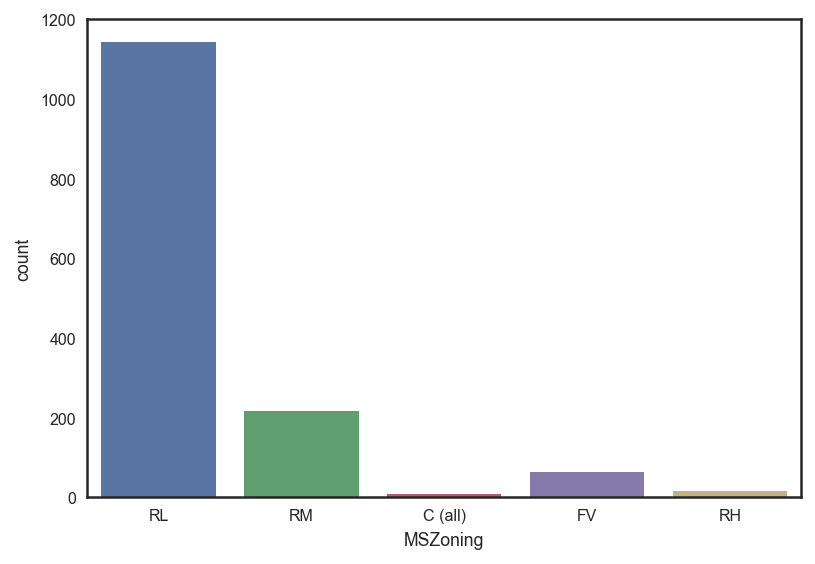

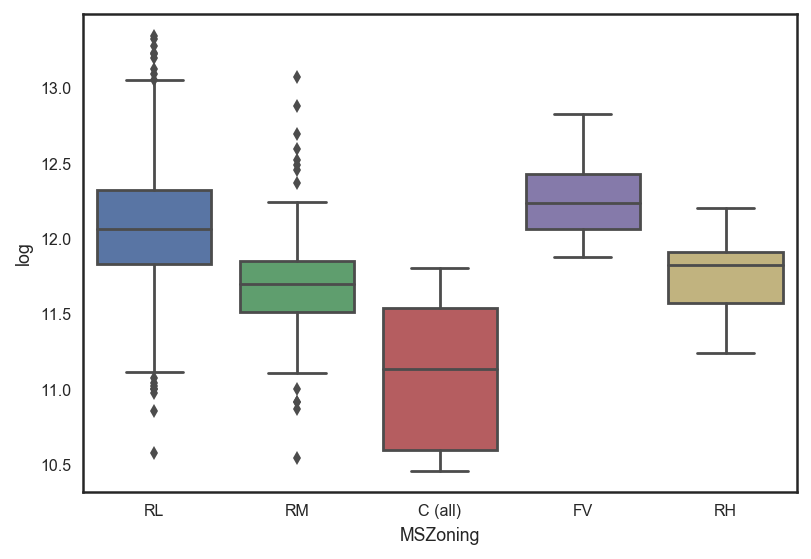

In [51]:
sns.countplot('MSZoning', data=train)
plt.figure()
sns.boxplot('MSZoning', 'log', data=train)
train['MSZoning'].value_counts()

Pave    1447
Grvl       5
Name: Street, dtype: int64

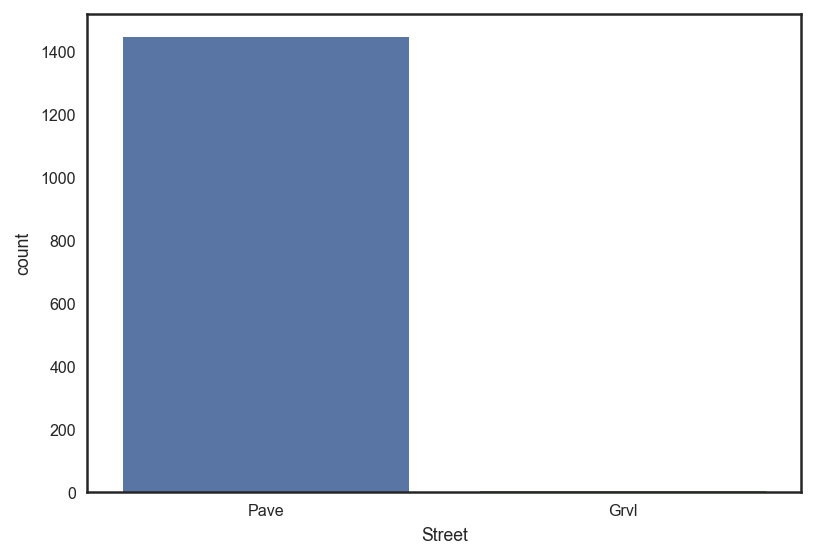

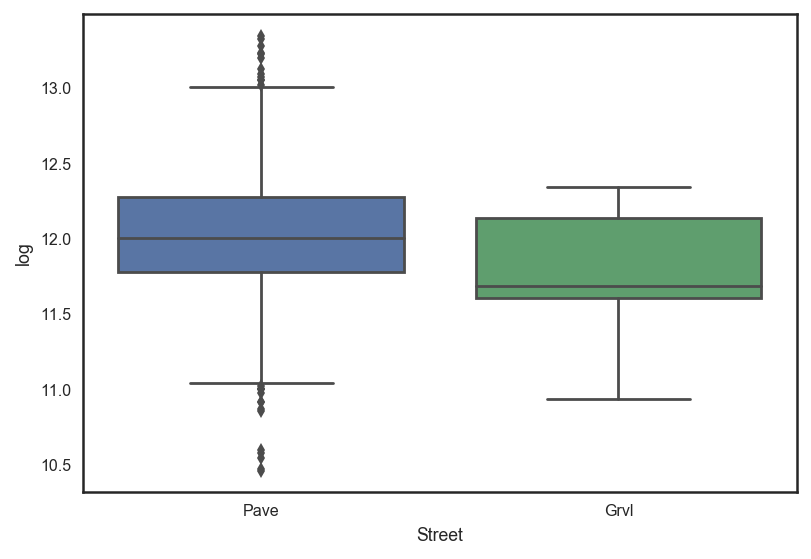

In [52]:
sns.countplot('Street', data=train)
plt.figure()
sns.boxplot('Street', 'log', data=train)
train['Street'].value_counts()

20     534
60     295
50     144
120     87
30      68
160     63
70      60
80      58
90      52
190     29
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

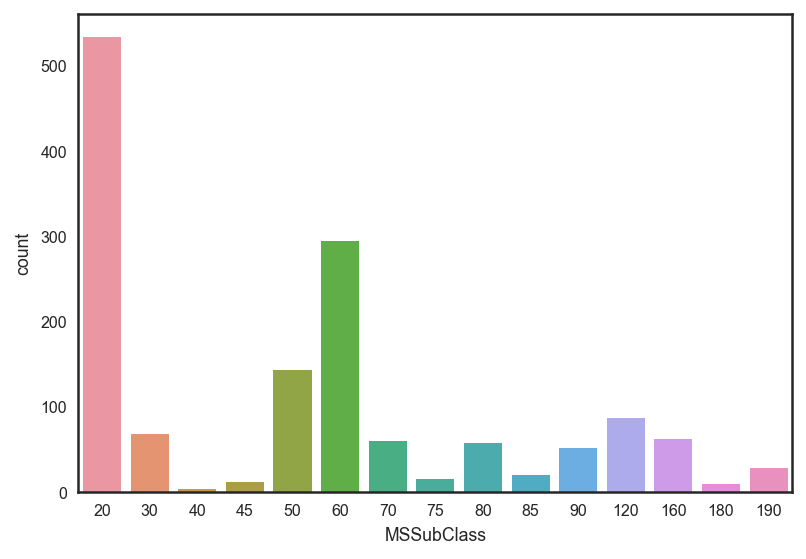

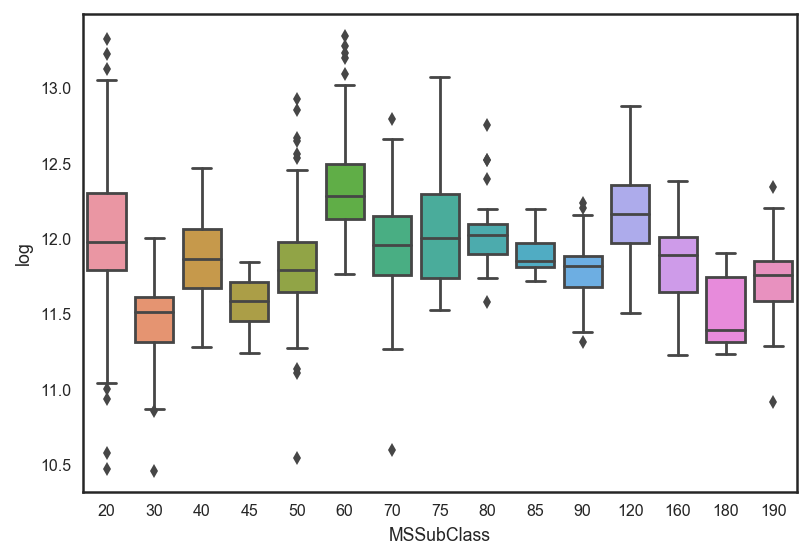

In [53]:
sns.countplot('MSSubClass', data=train)
plt.figure()
sns.boxplot('MSSubClass', 'log', data=train)
train['MSSubClass'].value_counts()

Gtl    1375
Mod      64
Sev      13
Name: LandSlope, dtype: int64

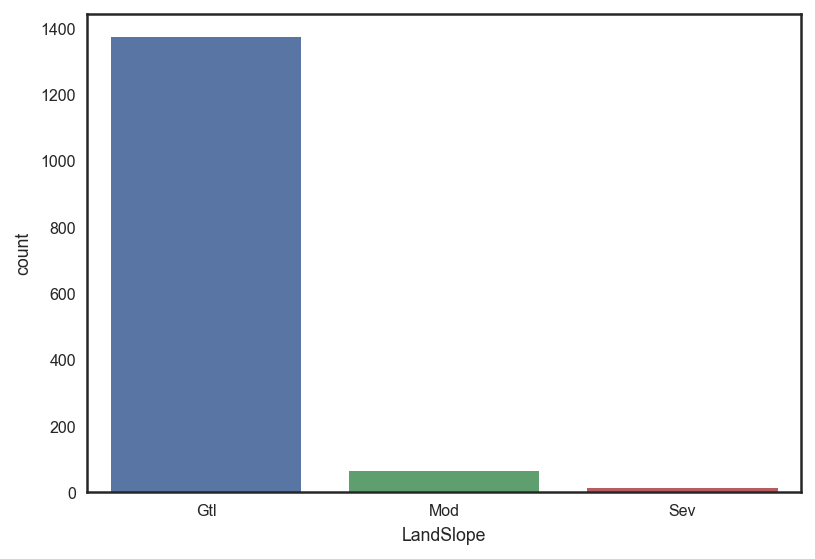

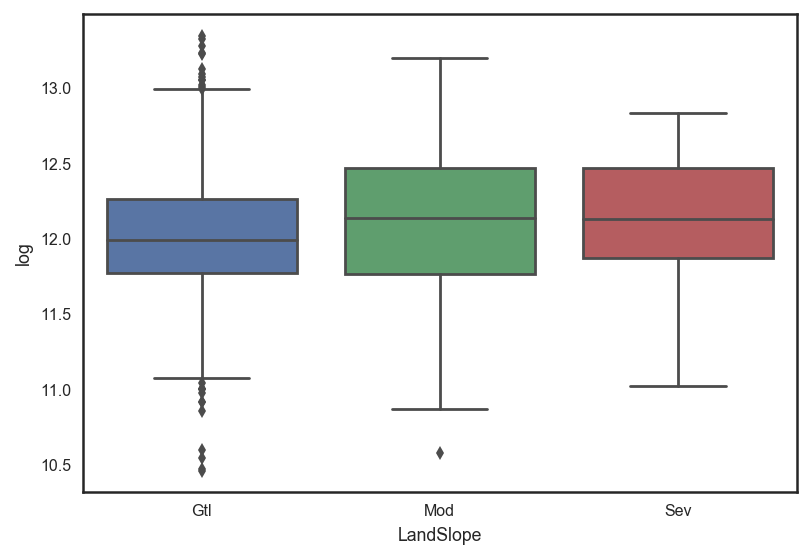

In [54]:
sns.countplot('LandSlope', data=train)
plt.figure()
sns.boxplot('LandSlope', 'log', data=train)
train['LandSlope'].value_counts()

AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64

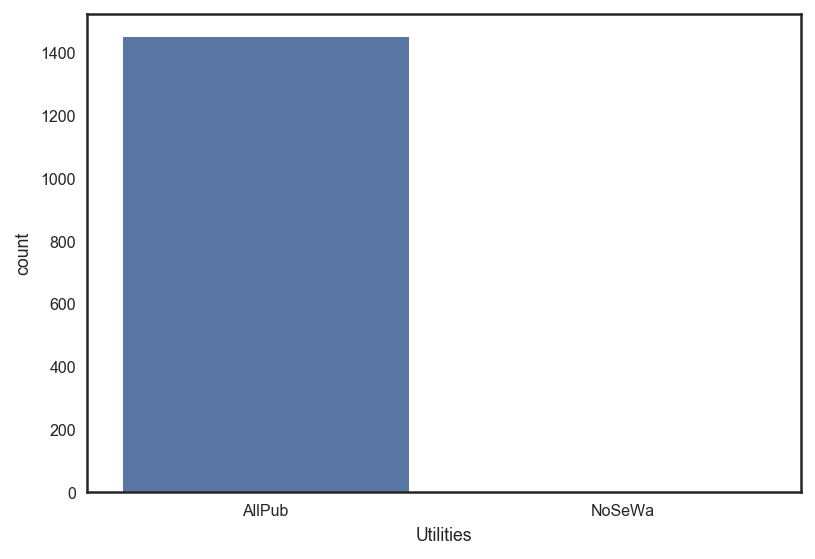

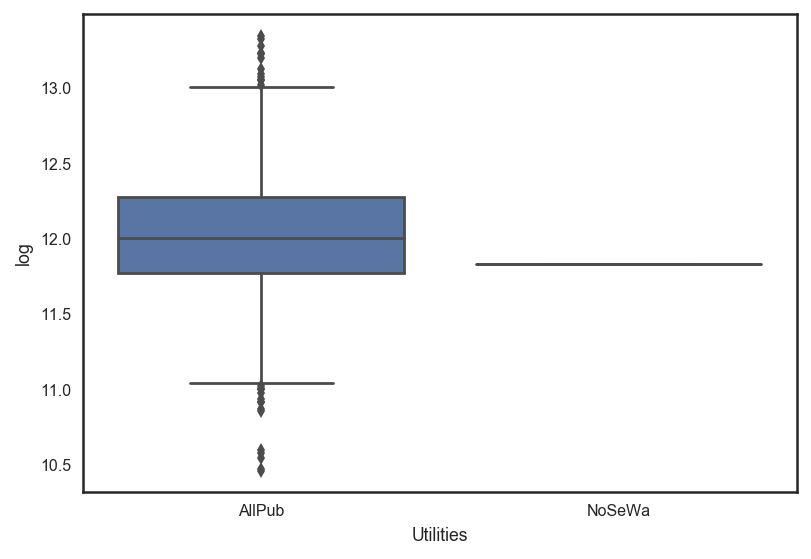

In [55]:
sns.countplot('Utilities', data=train)
plt.figure()
sns.boxplot('Utilities', 'log', data=train)
train['Utilities'].value_counts()

Reg    921
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64

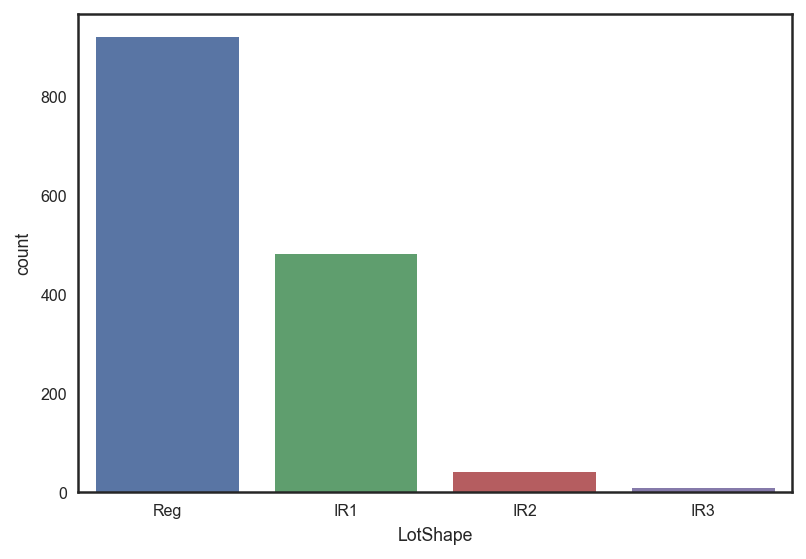

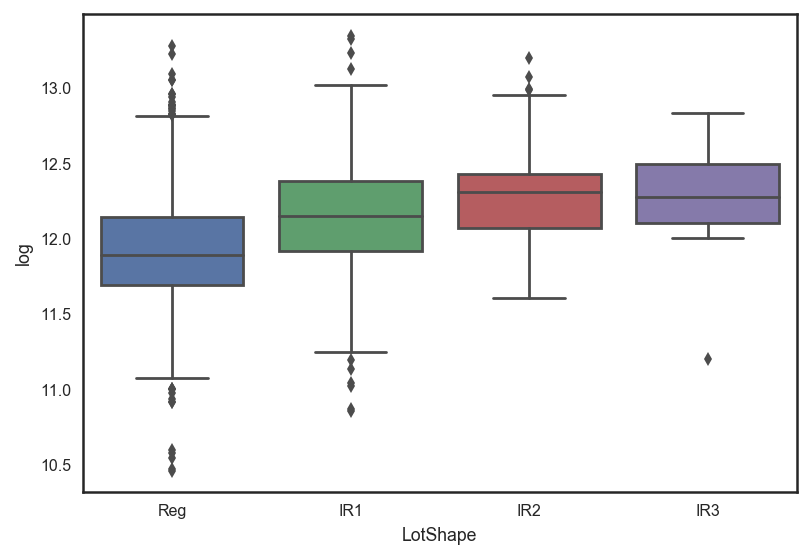

In [56]:
sns.countplot('LotShape', data=train)
plt.figure()
sns.boxplot('LotShape', 'log', data=train)
train['LotShape'].value_counts()

Lvl    1307
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64

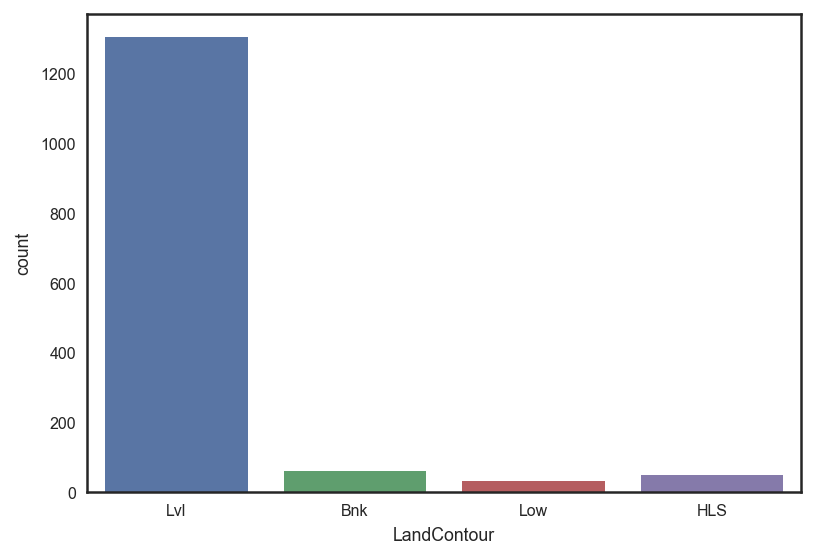

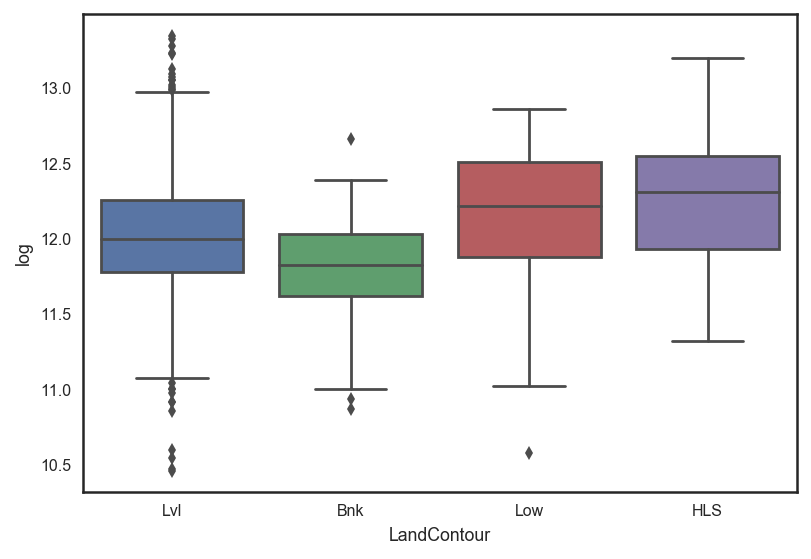

In [57]:
sns.countplot('LandContour', data=train)
plt.figure()
sns.boxplot('LandContour', 'log', data=train)
train['LandContour'].value_counts()

Inside     1047
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

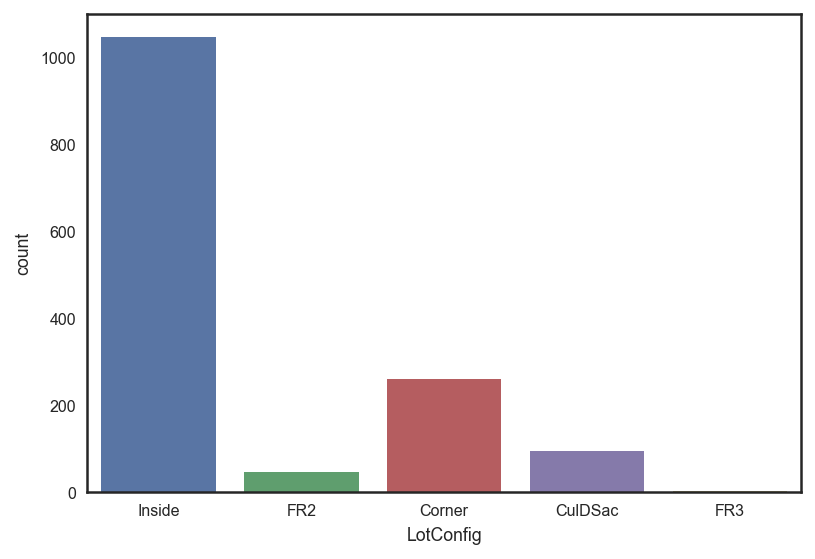

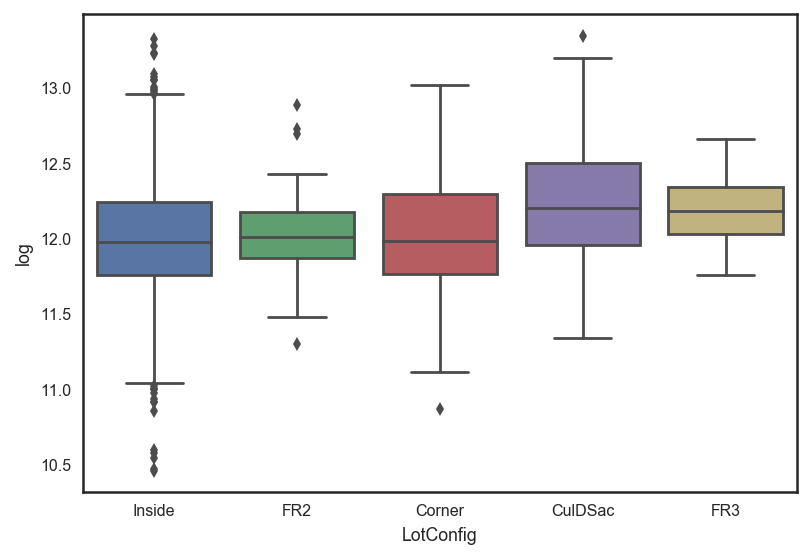

In [58]:
sns.countplot('LotConfig', data=train)
plt.figure()
sns.boxplot('LotConfig', 'log', data=train)
train['LotConfig'].value_counts()

Gtl    1375
Mod      64
Sev      13
Name: LandSlope, dtype: int64

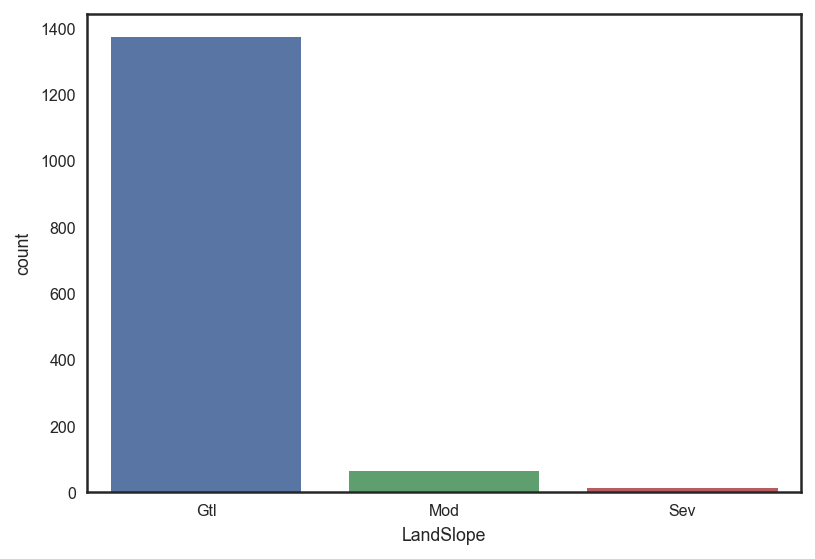

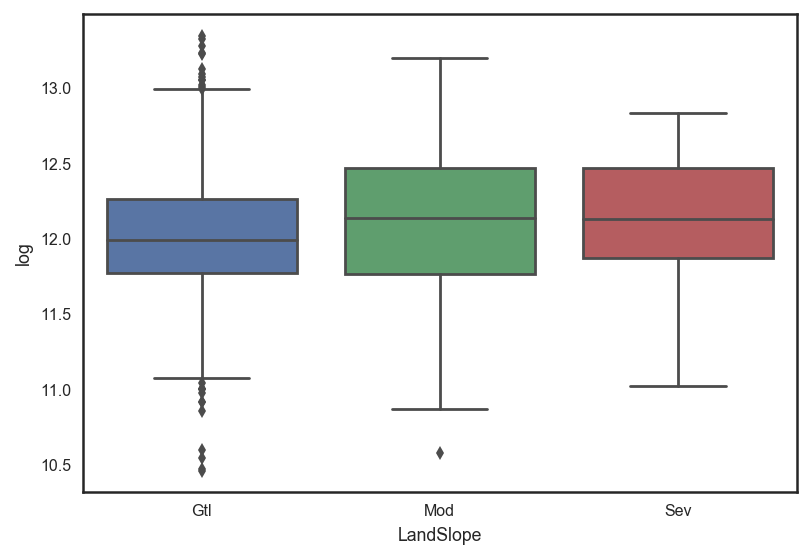

In [59]:
sns.countplot('LandSlope', data=train)
plt.figure()
sns.boxplot('LandSlope', 'log', data=train)
train['LandSlope'].value_counts()

1Fam      1213
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

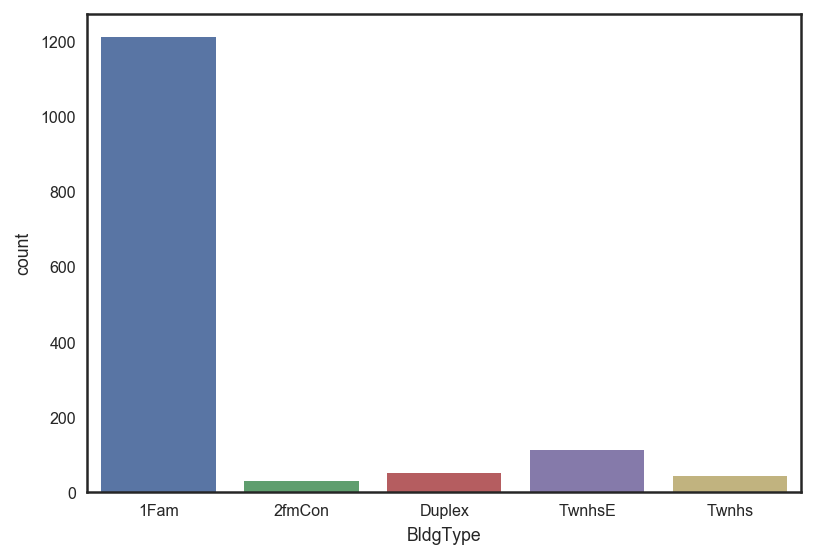

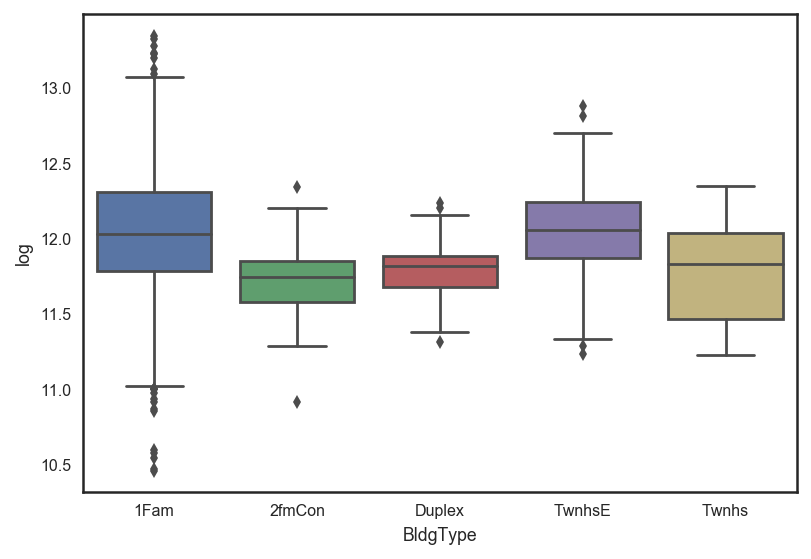

In [60]:
sns.countplot('BldgType', data=train)
plt.figure()
sns.boxplot('BldgType', 'log', data=train)
train['BldgType'].value_counts()

1Story    722
2Story    441
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

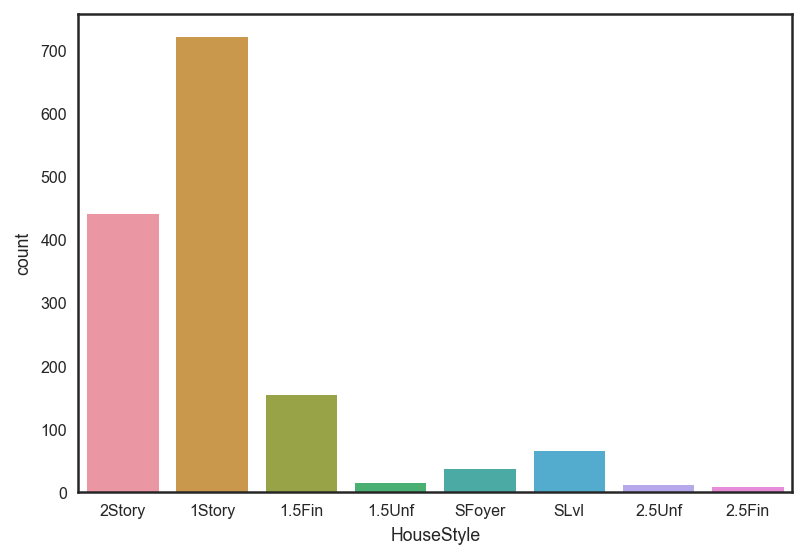

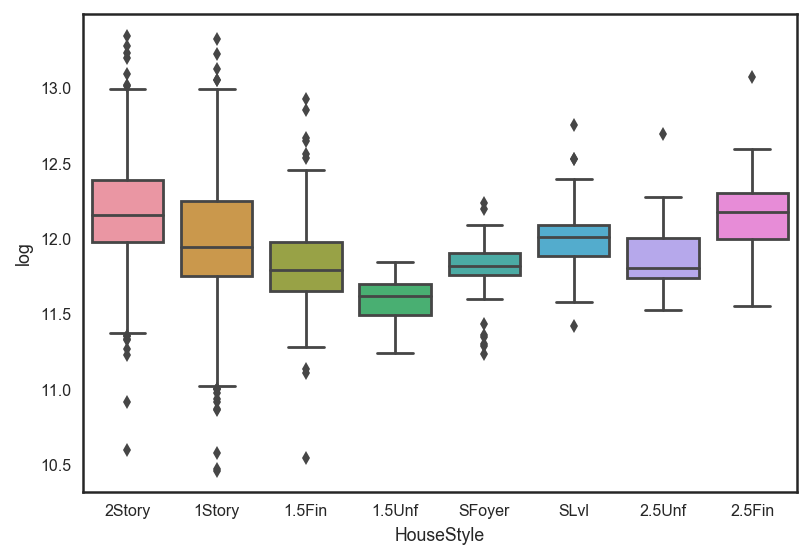

In [61]:
sns.countplot('HouseStyle', data=train)
plt.figure()
sns.boxplot('HouseStyle', 'log', data=train)
train['HouseStyle'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     39
Timber      38
IDOTRR      36
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

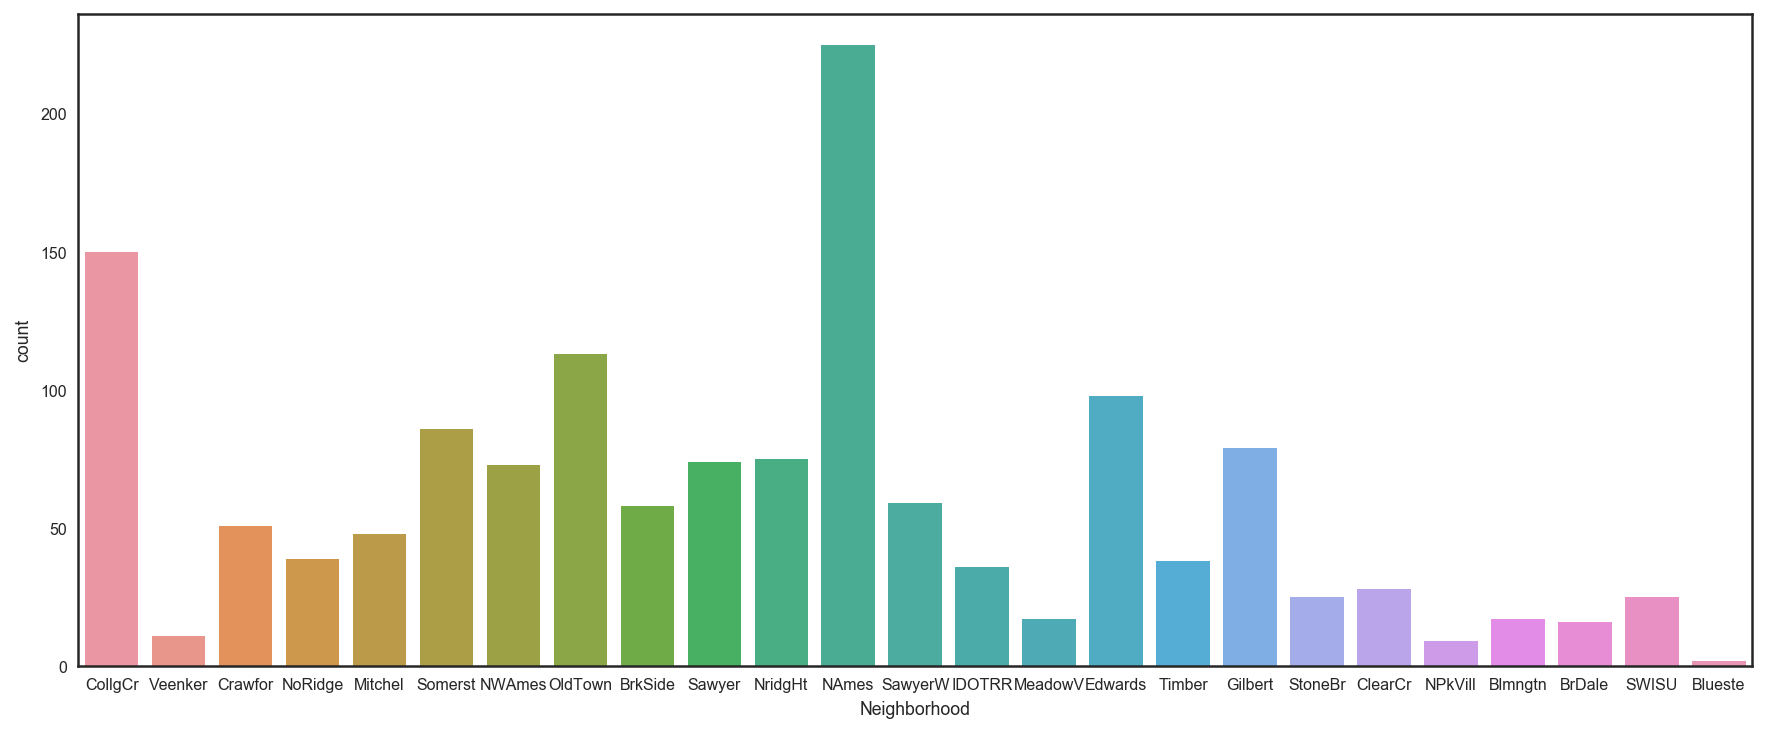

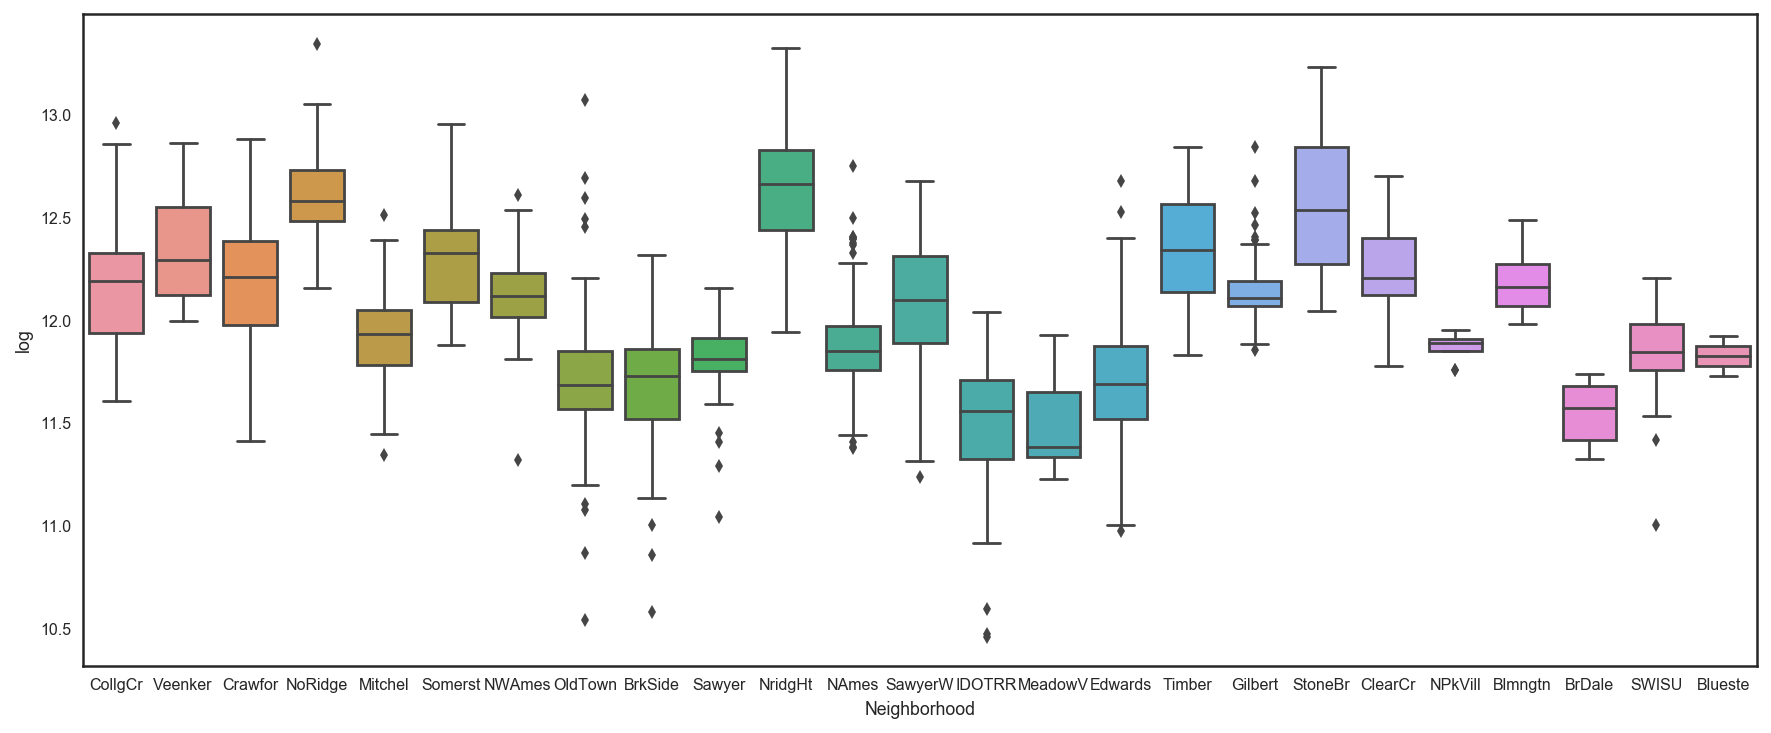

In [62]:
plt.figure(figsize=(15,6))
sns.countplot('Neighborhood', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Neighborhood', 'log', data=train)
train['Neighborhood'].value_counts()

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

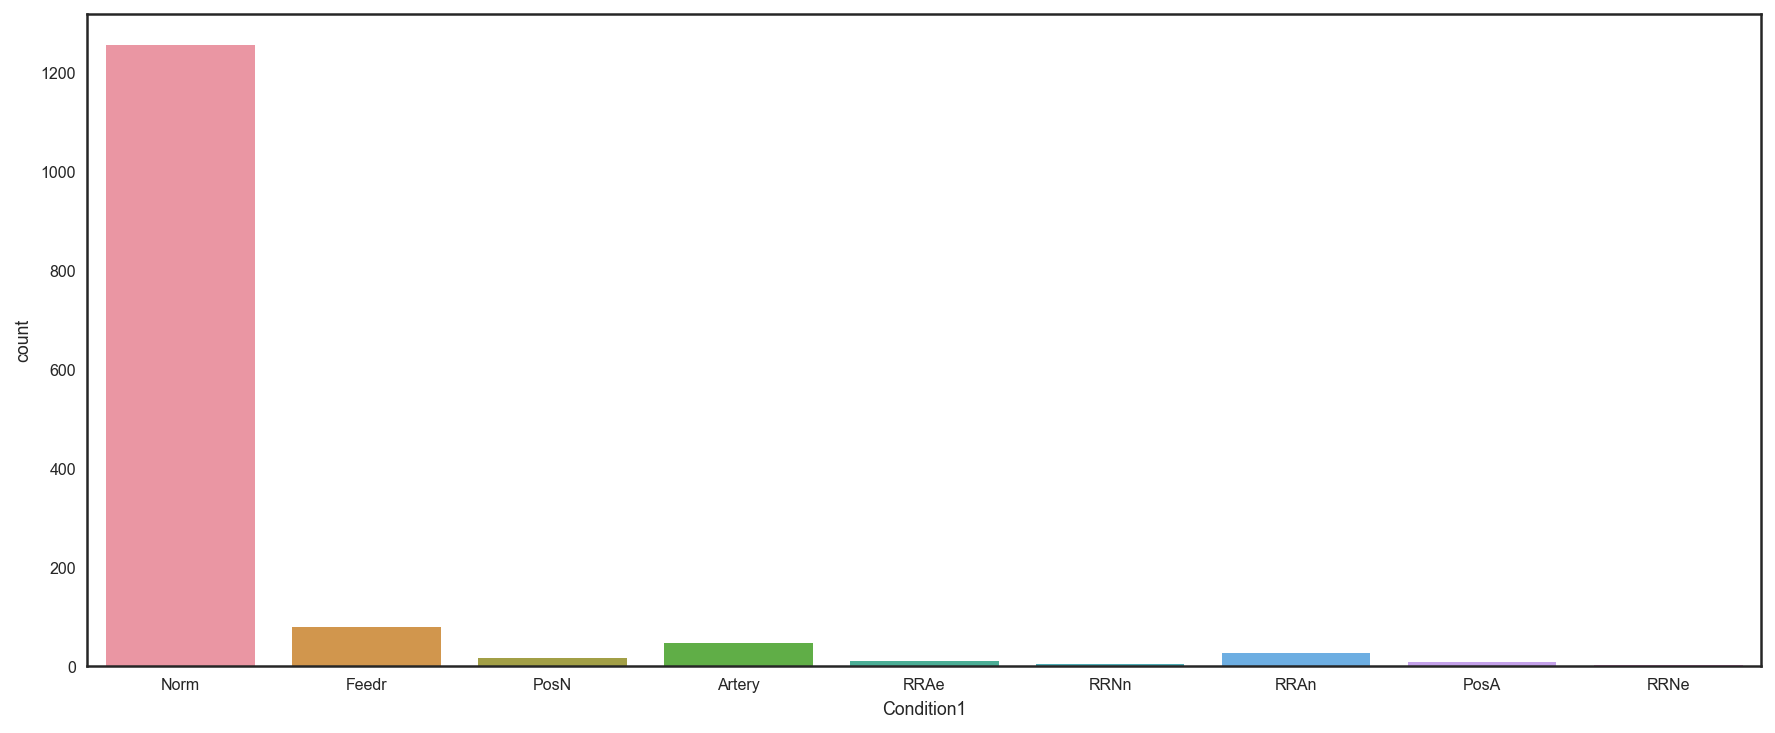

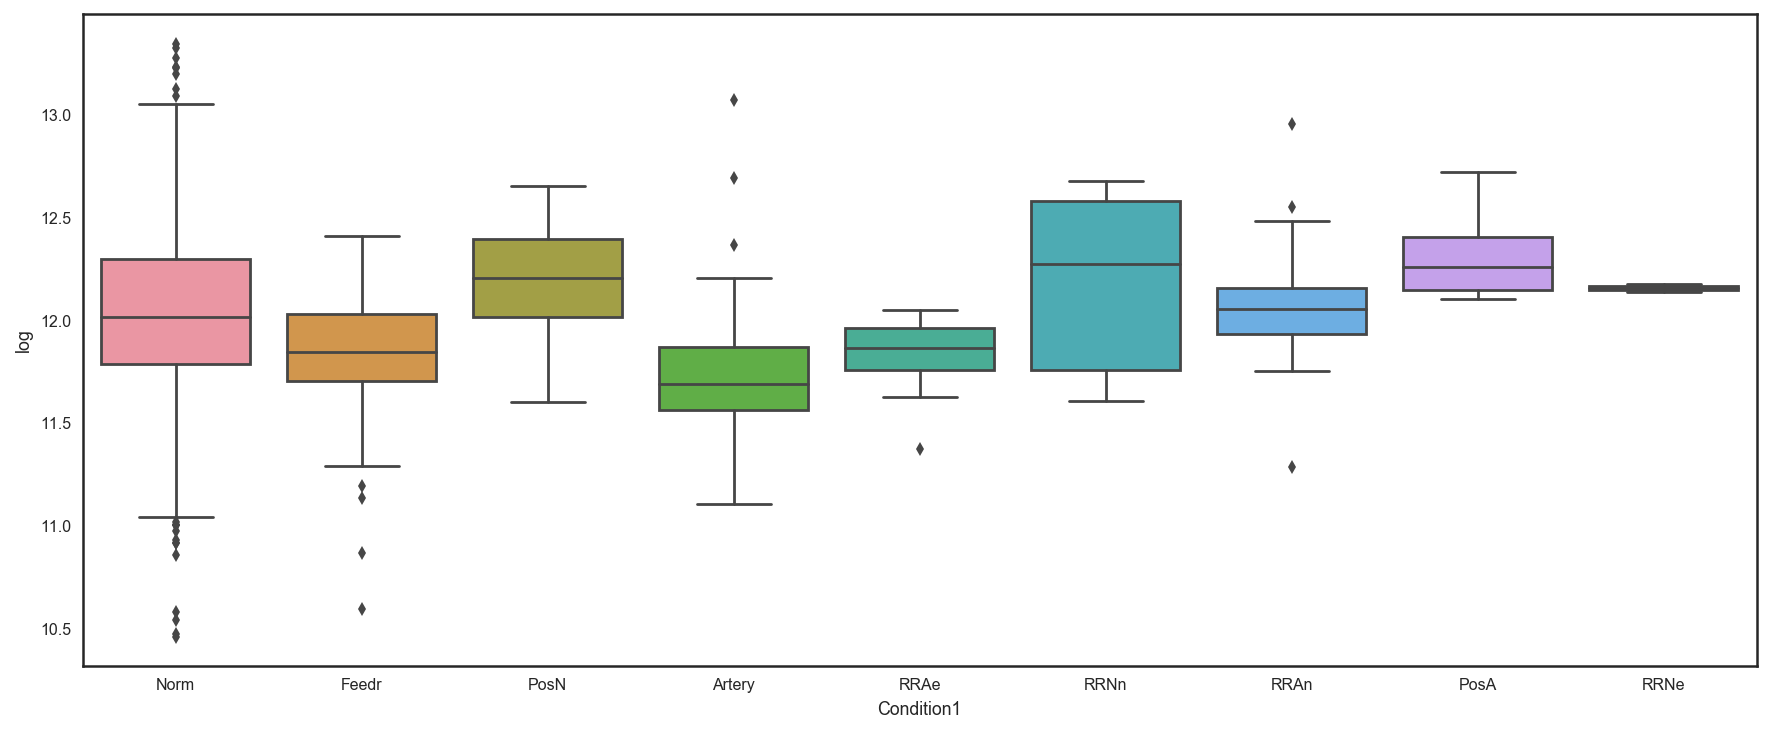

In [63]:
plt.figure(figsize=(15,6))
sns.countplot('Condition1', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Condition1', 'log', data=train)
train['Condition1'].value_counts()

Norm      1439
Feedr        6
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

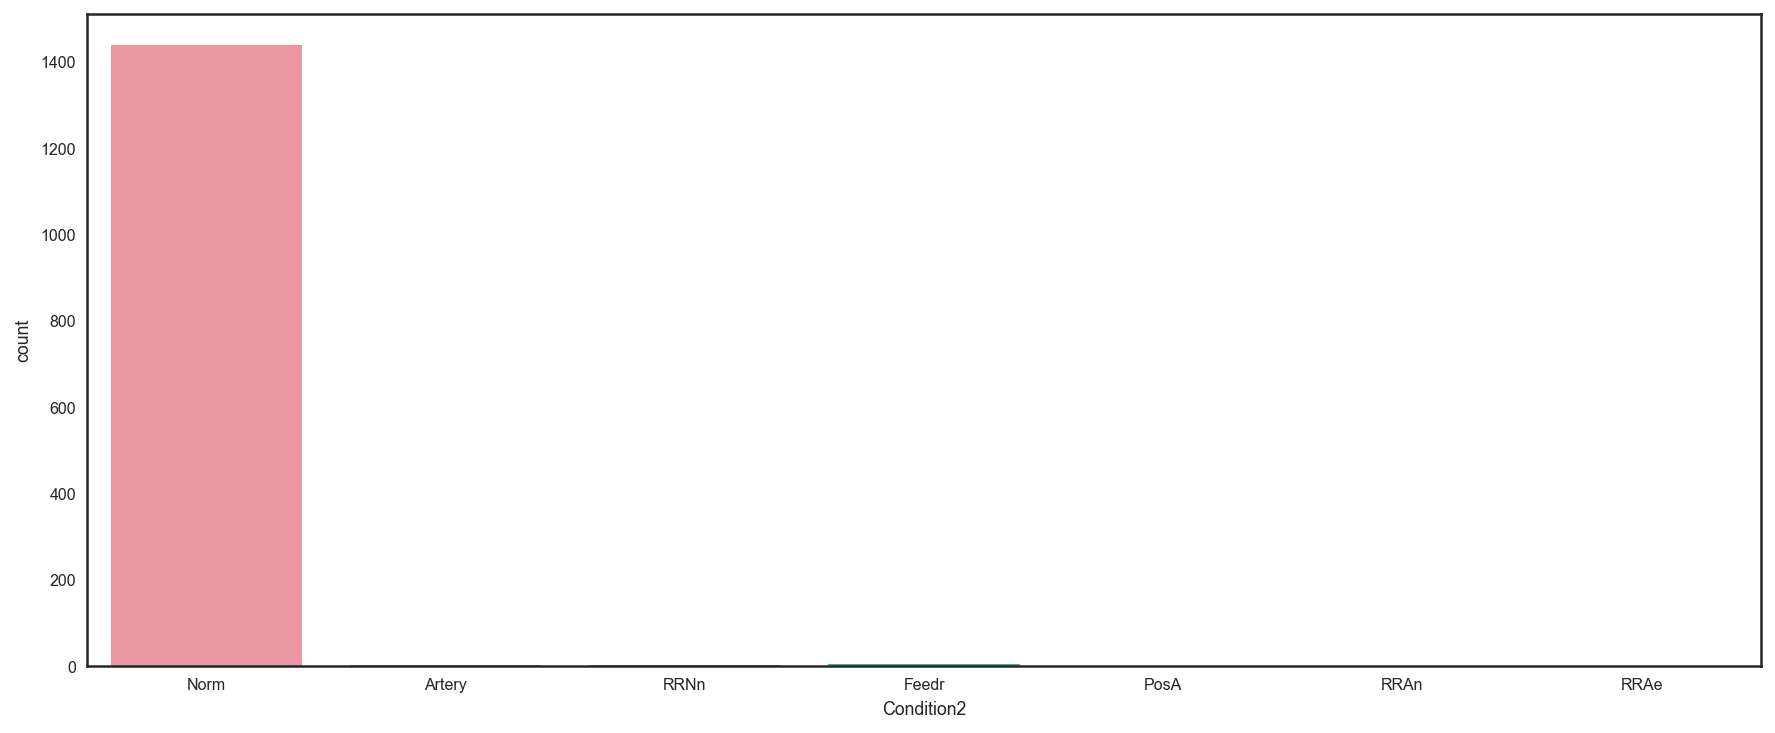

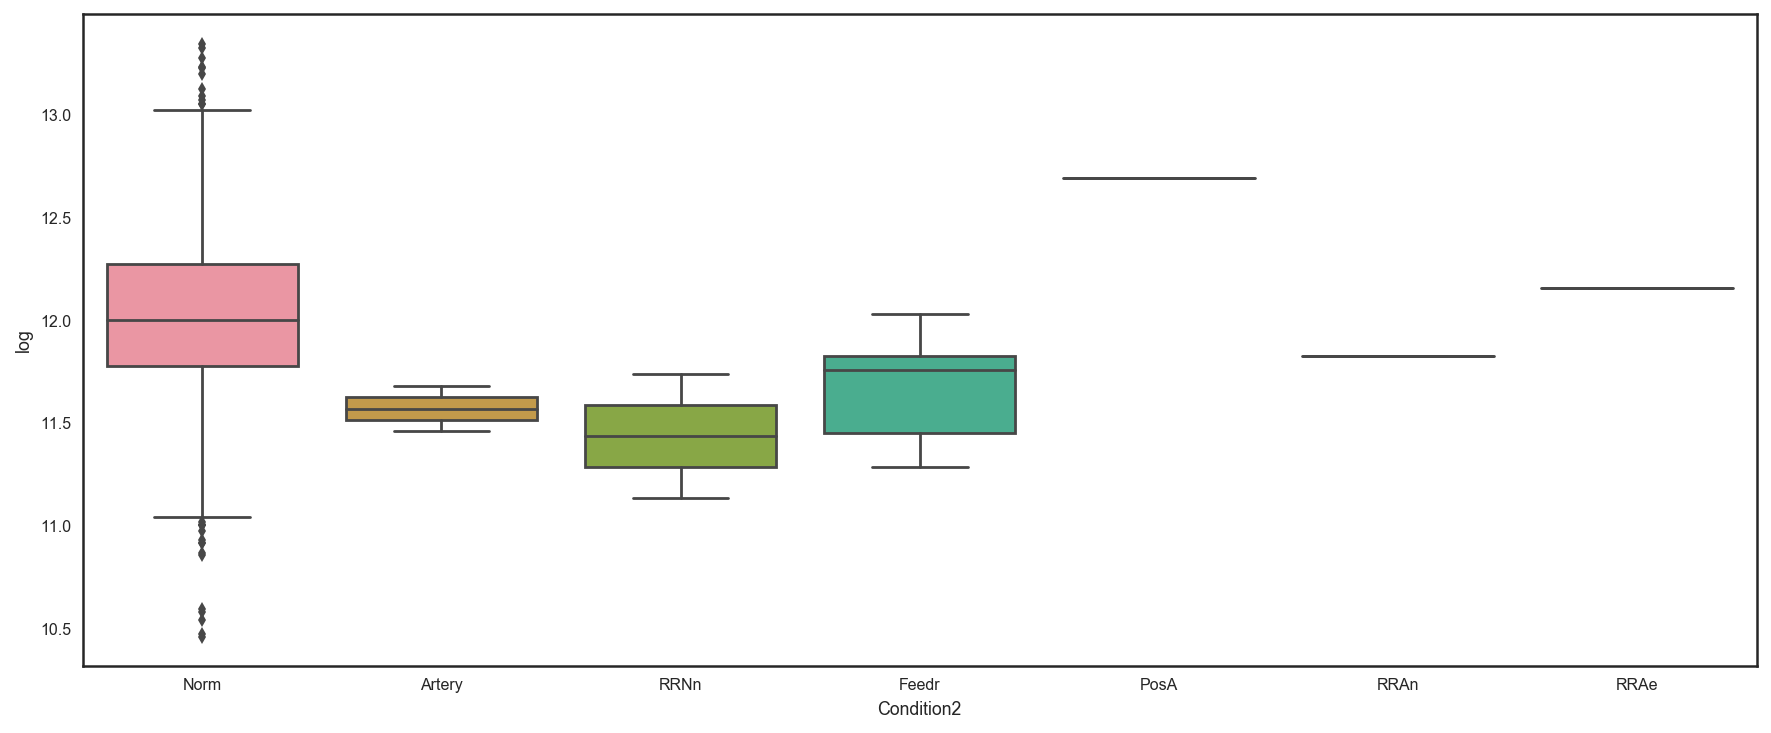

In [64]:
plt.figure(figsize=(15,6))
sns.countplot('Condition2', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Condition2', 'log', data=train)
train['Condition2'].value_counts()

VinylSd    514
HdBoard    221
MetalSd    218
Wd Sdng    205
Plywood    108
CemntBd     59
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

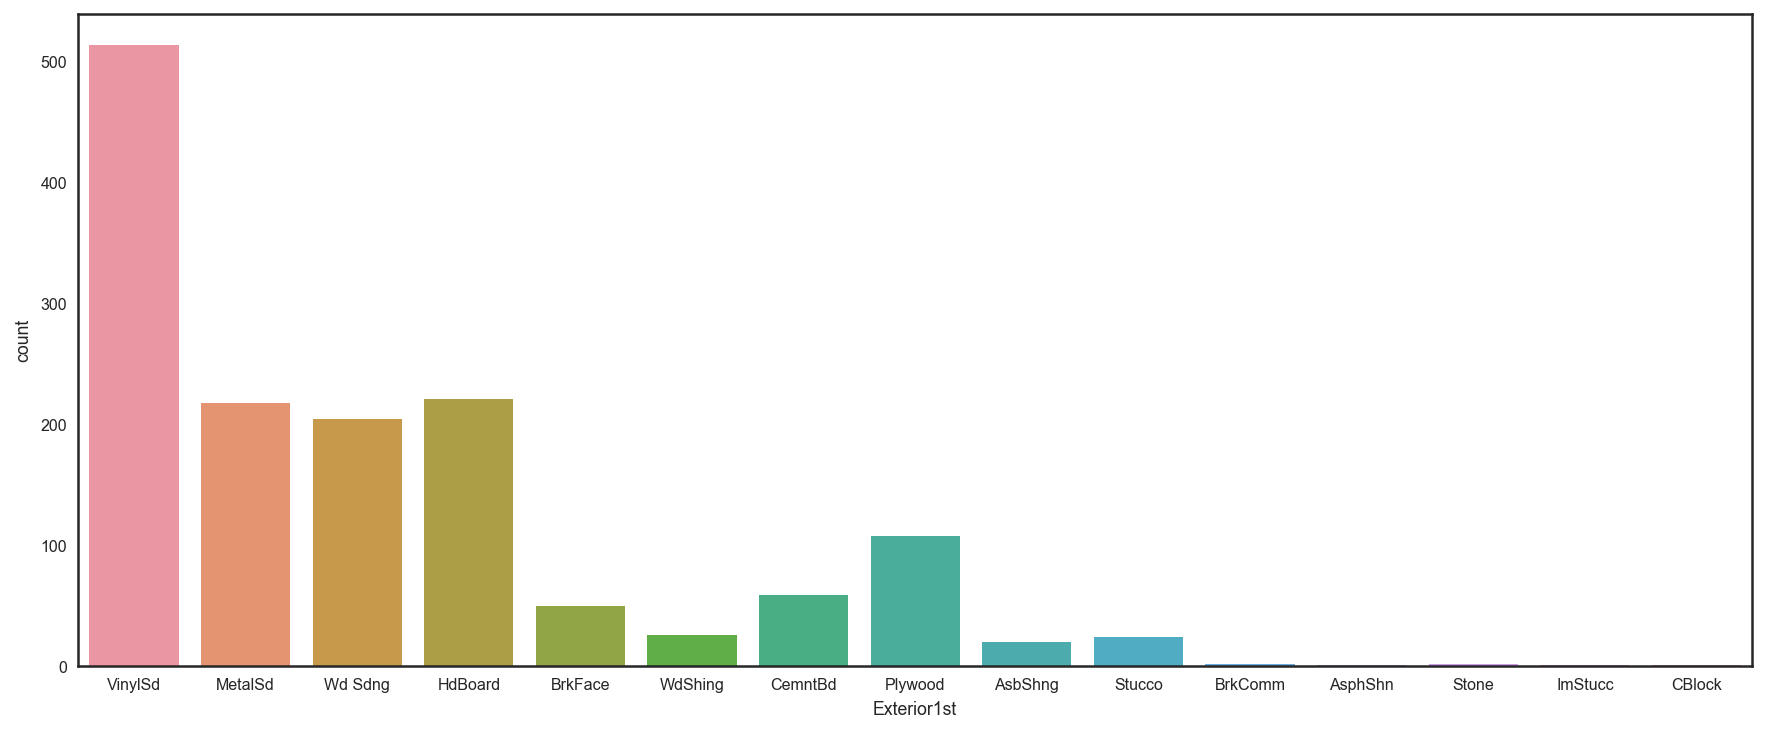

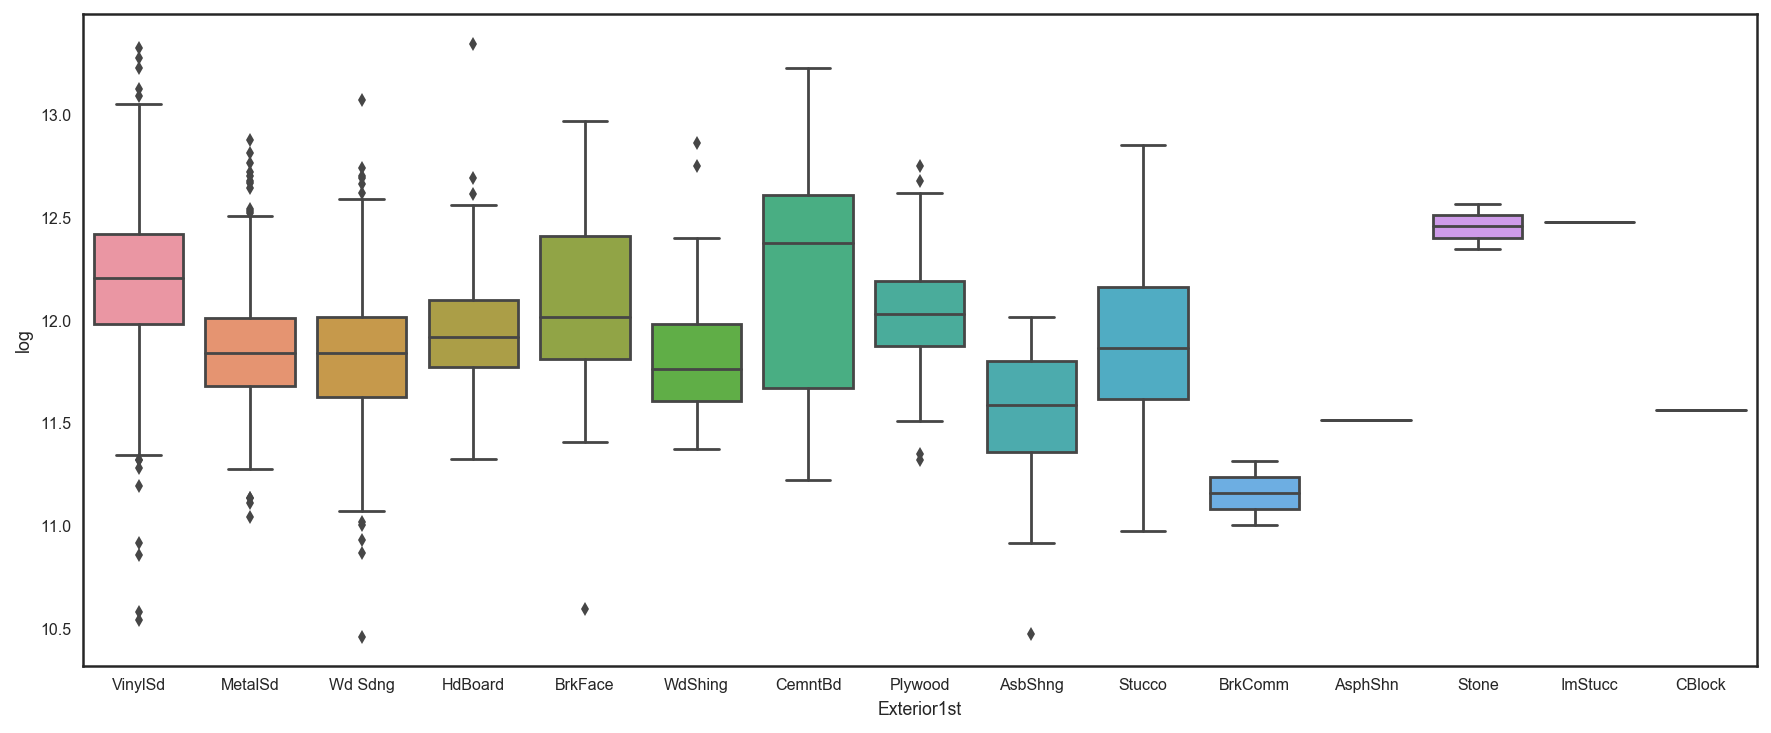

In [65]:
plt.figure(figsize=(15,6))
sns.countplot('Exterior1st', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Exterior1st', 'log', data=train)
train['Exterior1st'].value_counts()

VinylSd    503
MetalSd    212
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     58
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

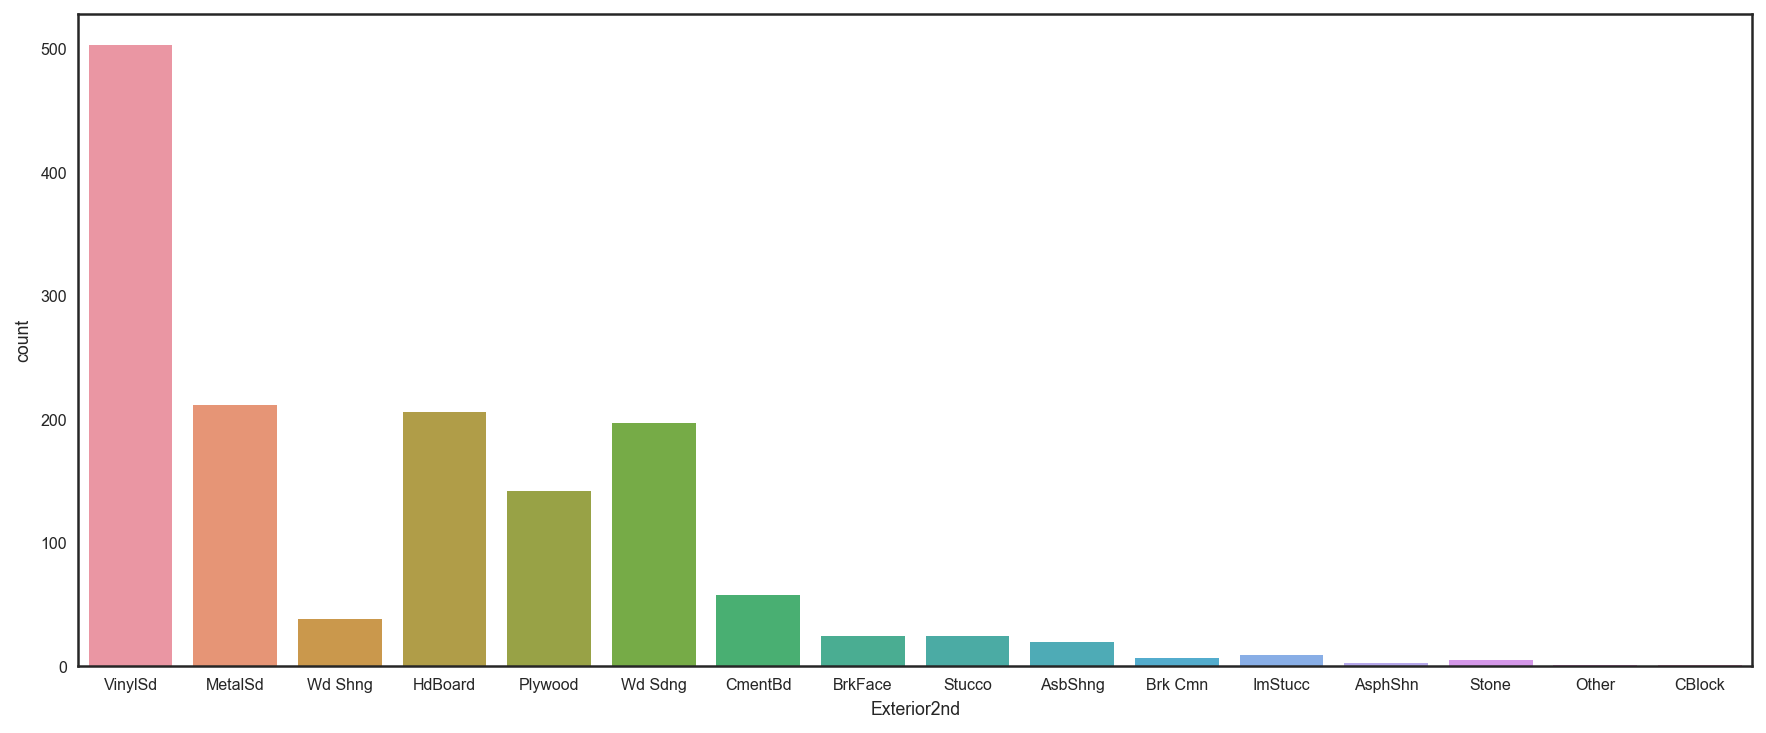

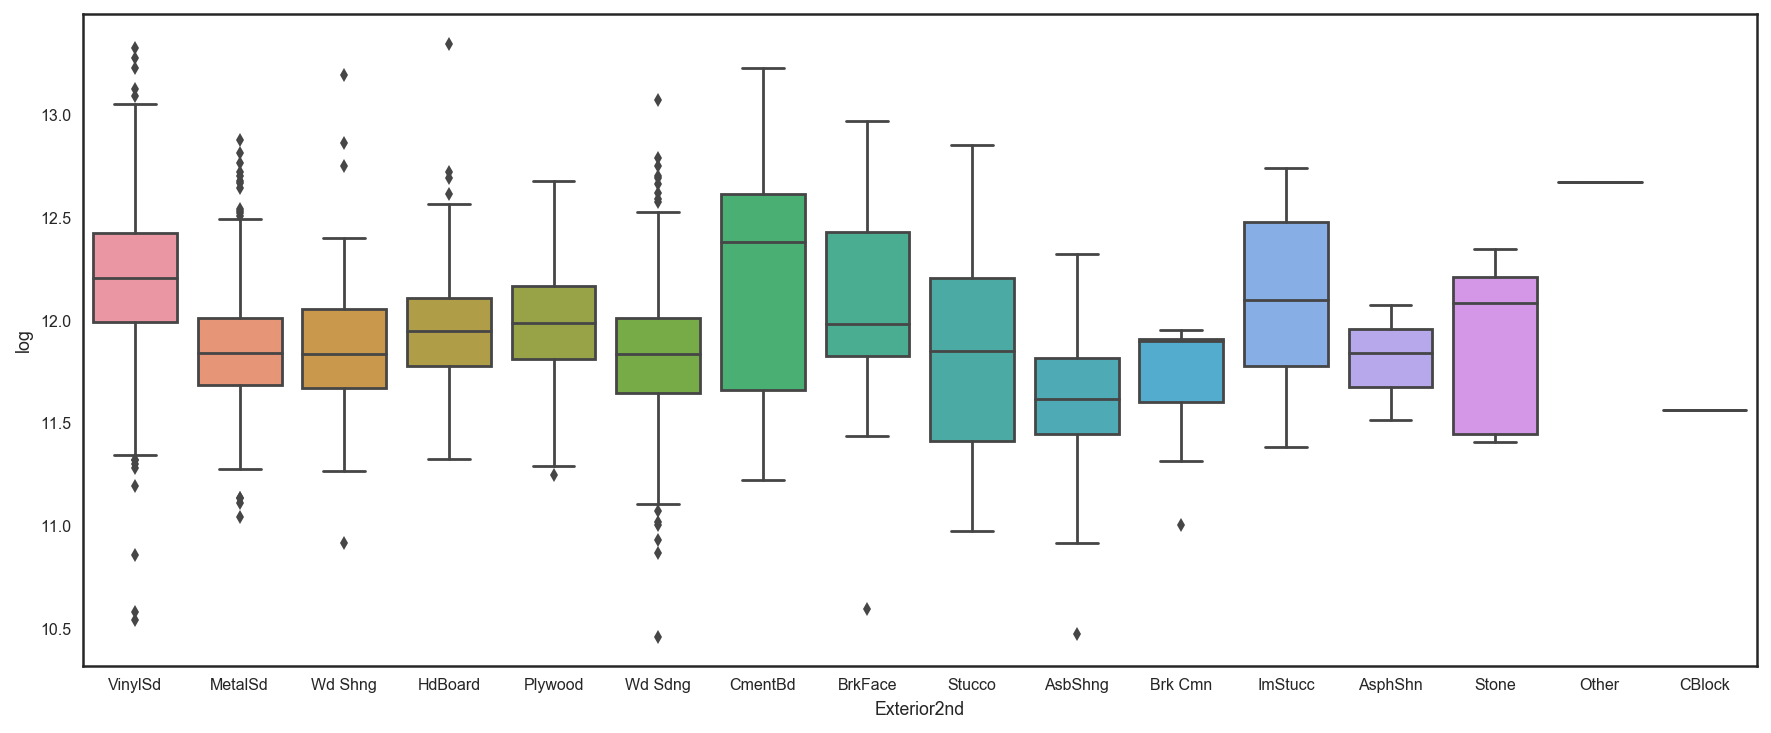

In [66]:
plt.figure(figsize=(15,6))
sns.countplot('Exterior2nd', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Exterior2nd', 'log', data=train)
train['Exterior2nd'].value_counts()

Gable      1138
Hip         281
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

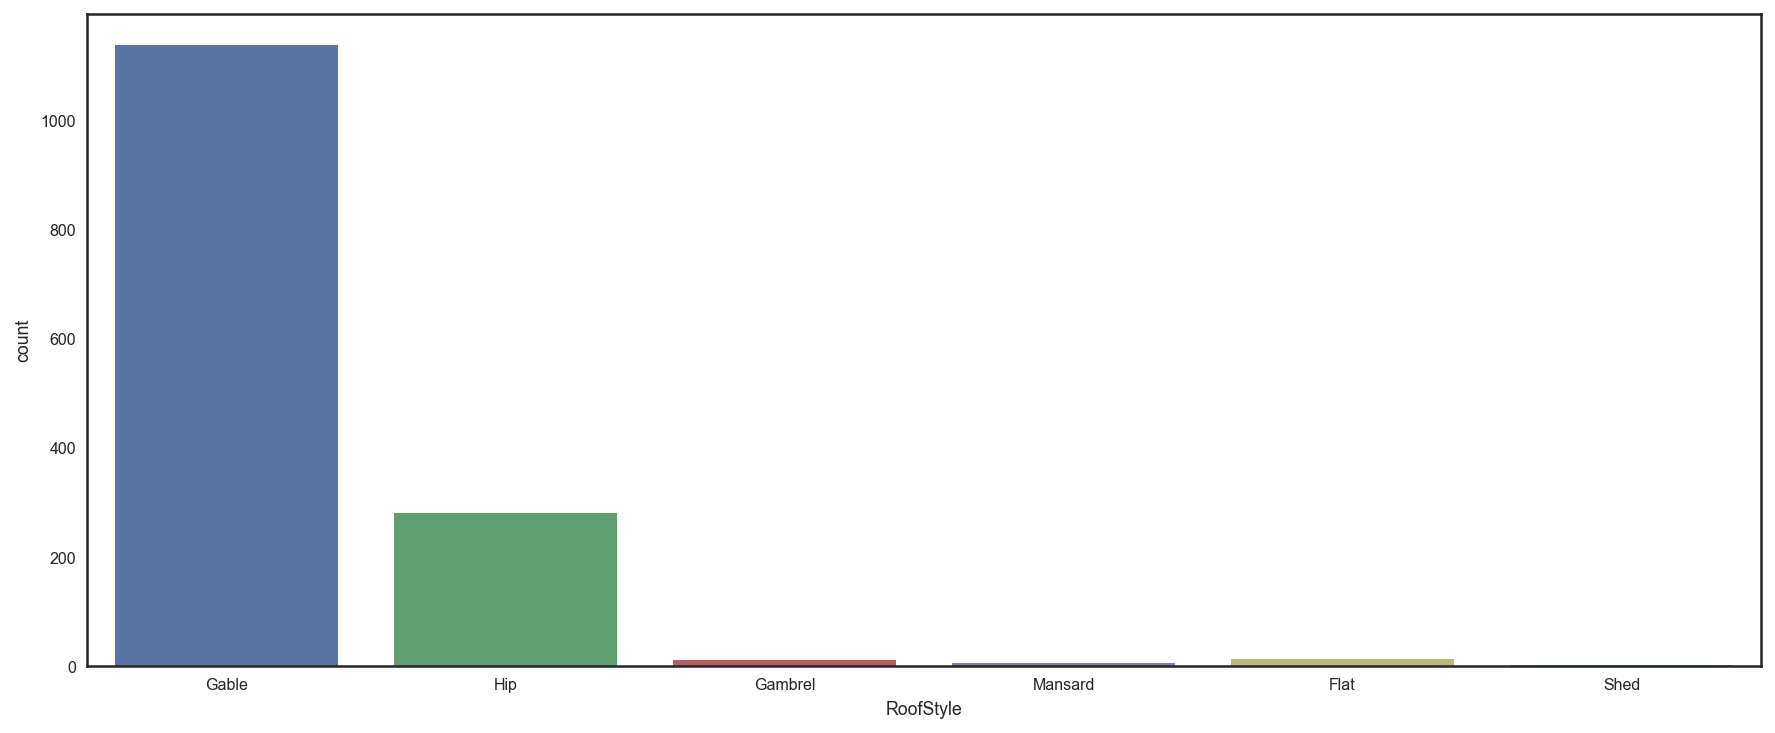

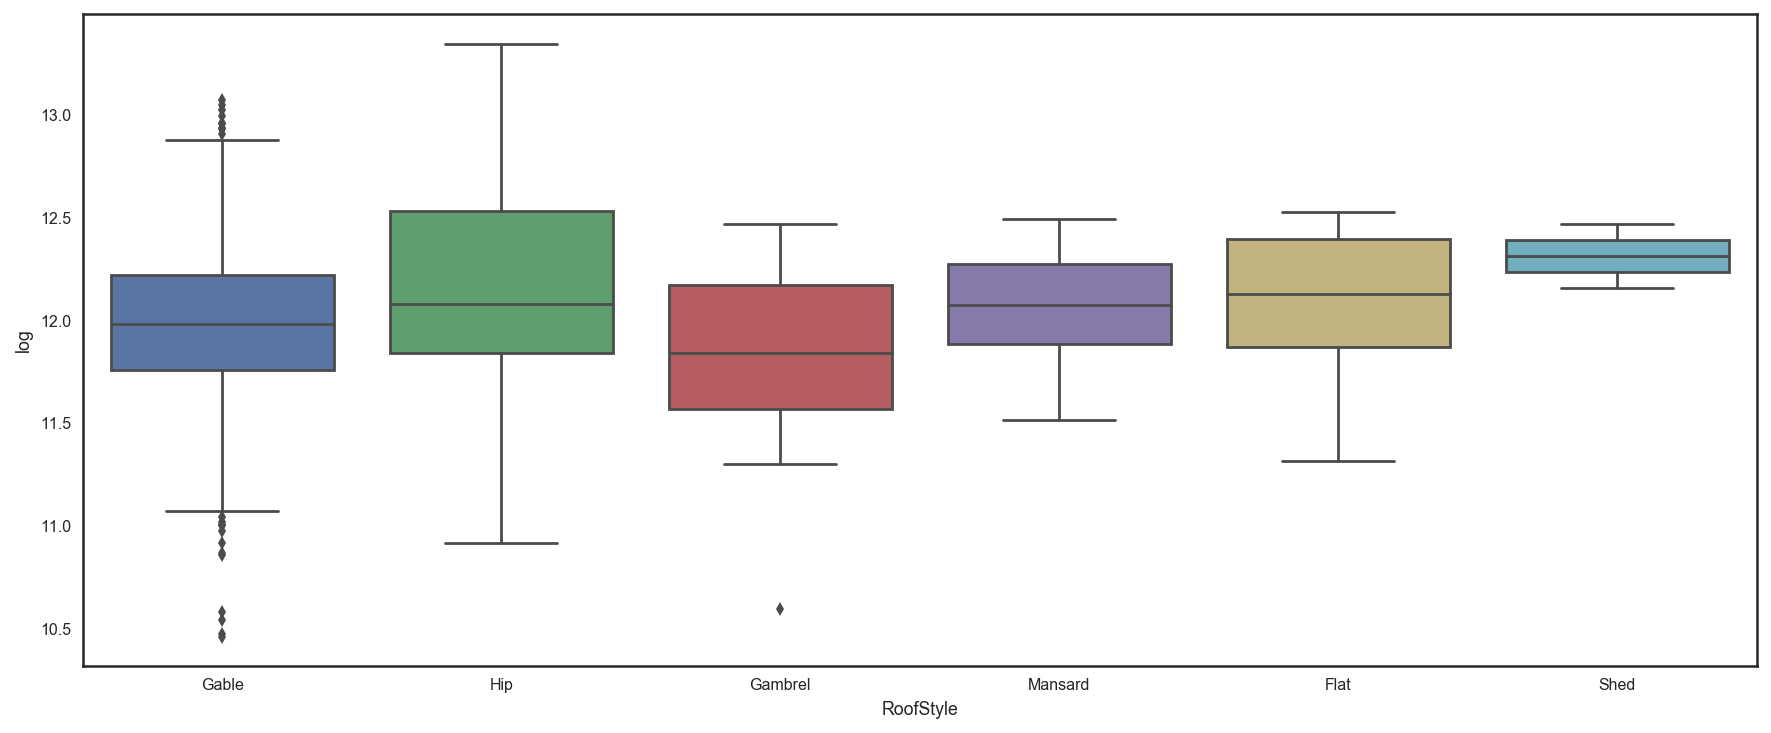

In [67]:
plt.figure(figsize=(15,6))
sns.countplot('RoofStyle', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('RoofStyle', 'log', data=train)
train['RoofStyle'].value_counts()

CompShg    1428
Tar&Grv      11
WdShngl       5
WdShake       5
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

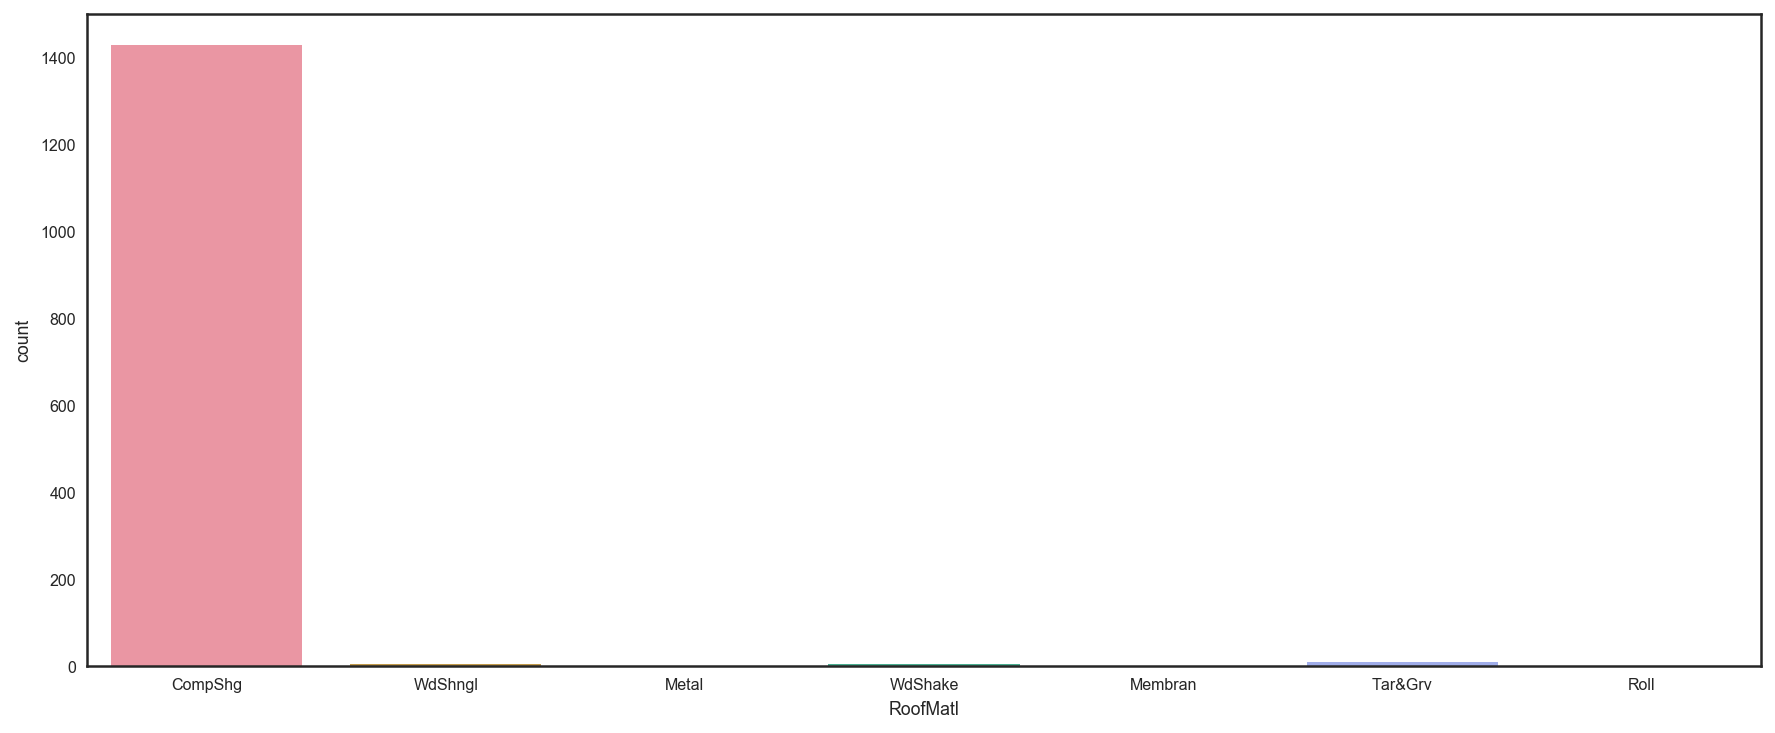

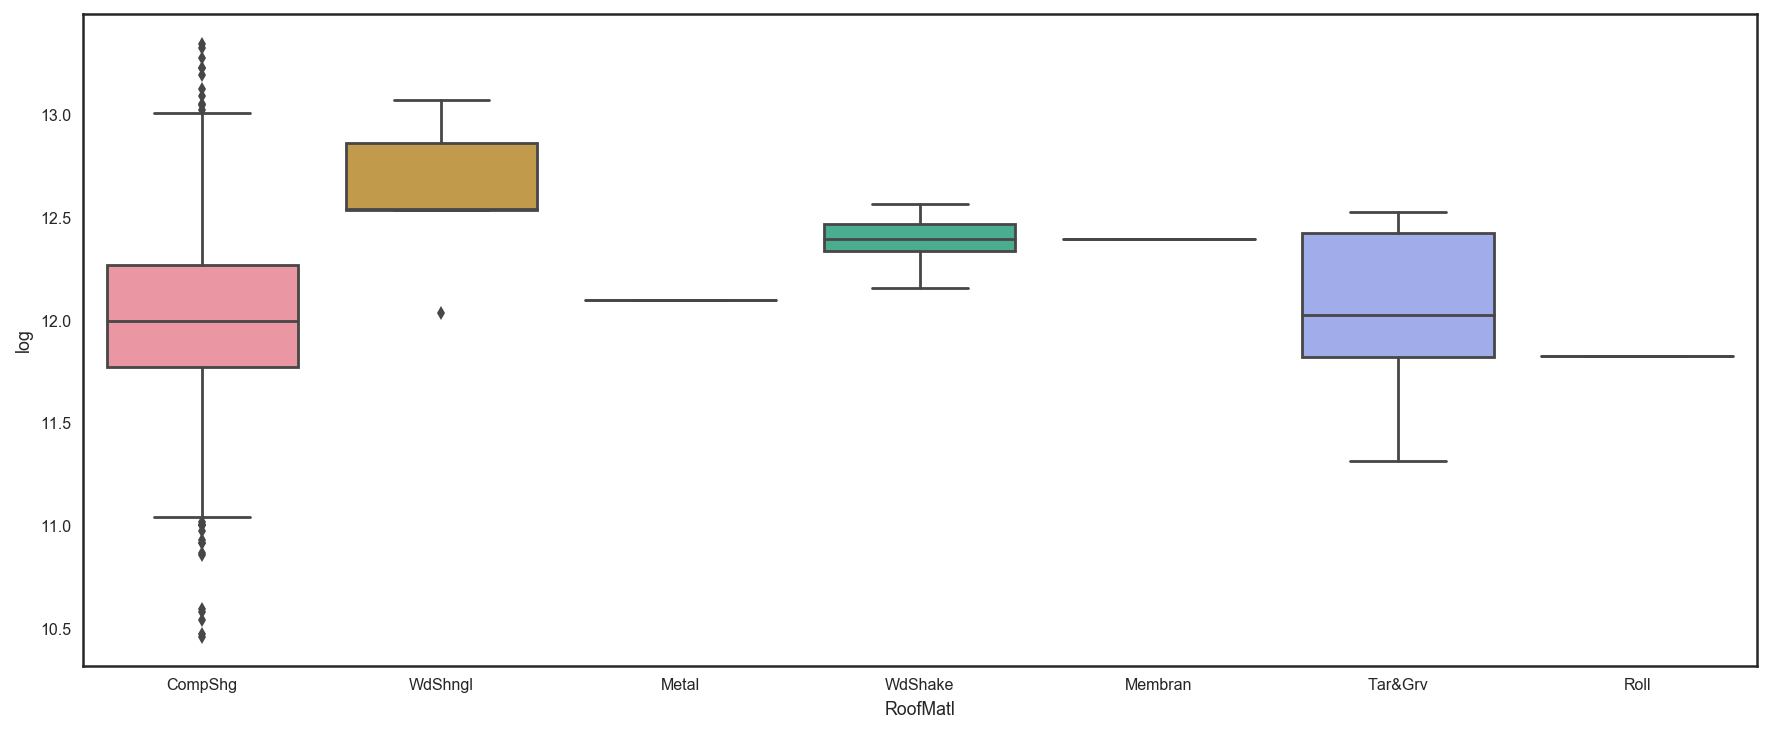

In [68]:
plt.figure(figsize=(15,6))
sns.countplot('RoofMatl', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('RoofMatl', 'log', data=train)
train['RoofMatl'].value_counts()

None       870
BrkFace    442
Stone      125
BrkCmn      15
Name: MasVnrType, dtype: int64

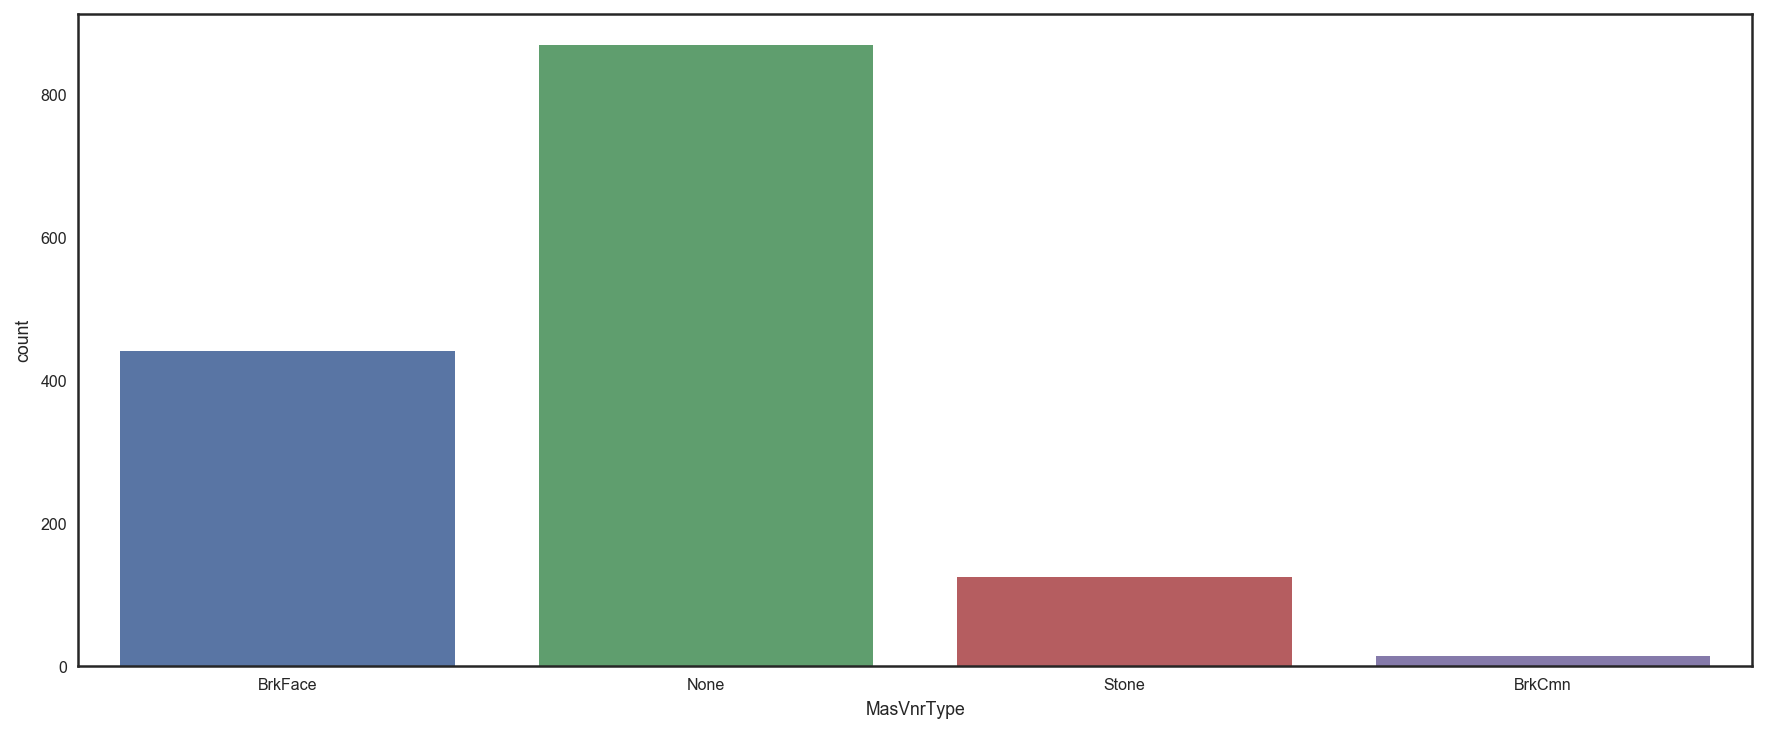

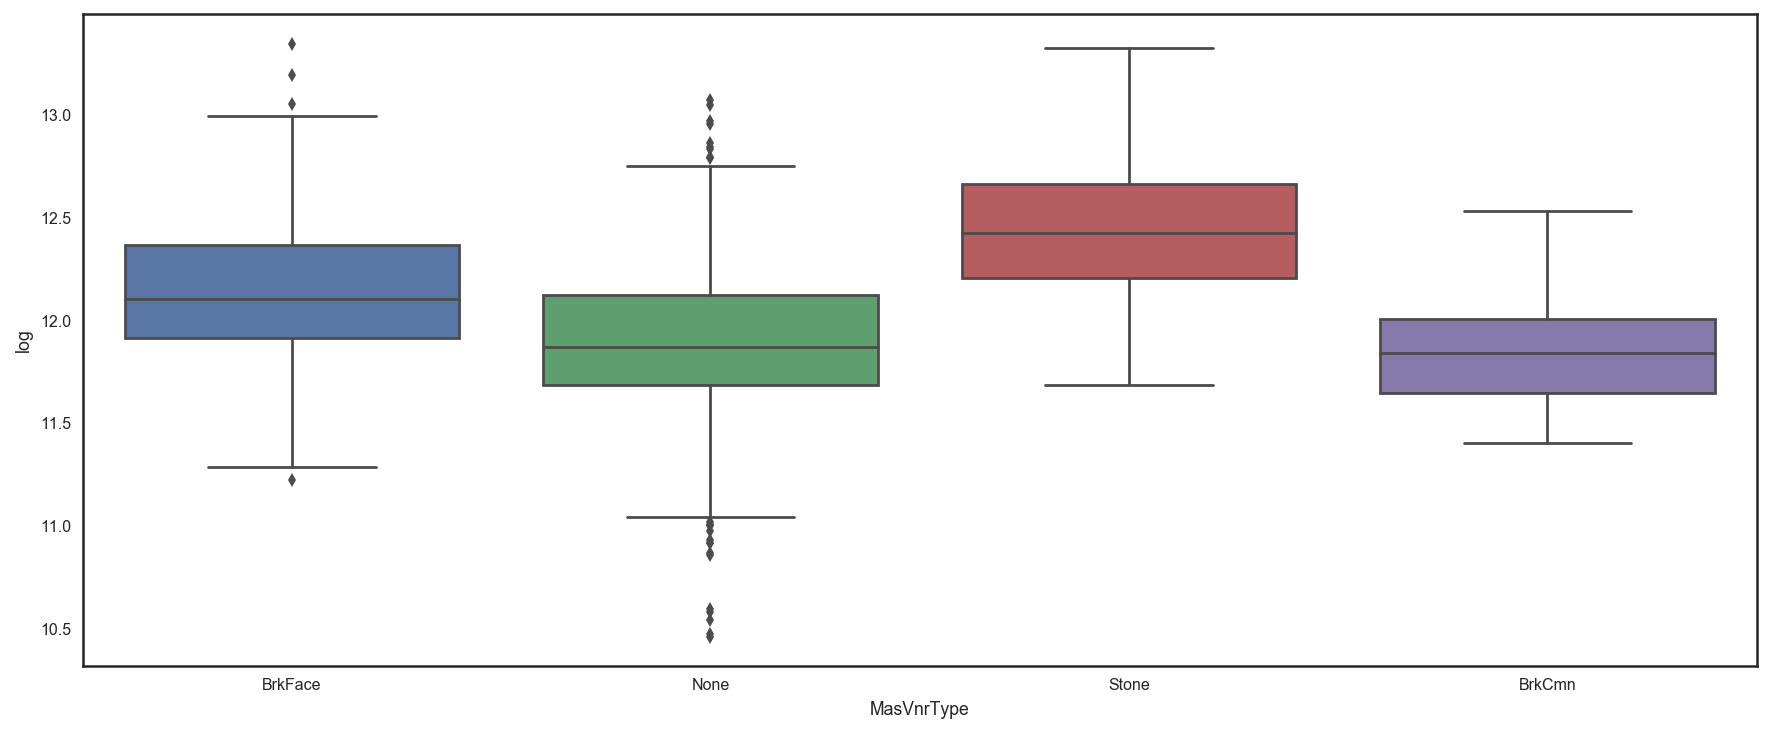

In [69]:
plt.figure(figsize=(15,6))
sns.countplot('MasVnrType', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('MasVnrType', 'log', data=train)
train['MasVnrType'].value_counts()

TA    905
Gd    487
Ex     47
Fa     13
Name: ExterQual, dtype: int64

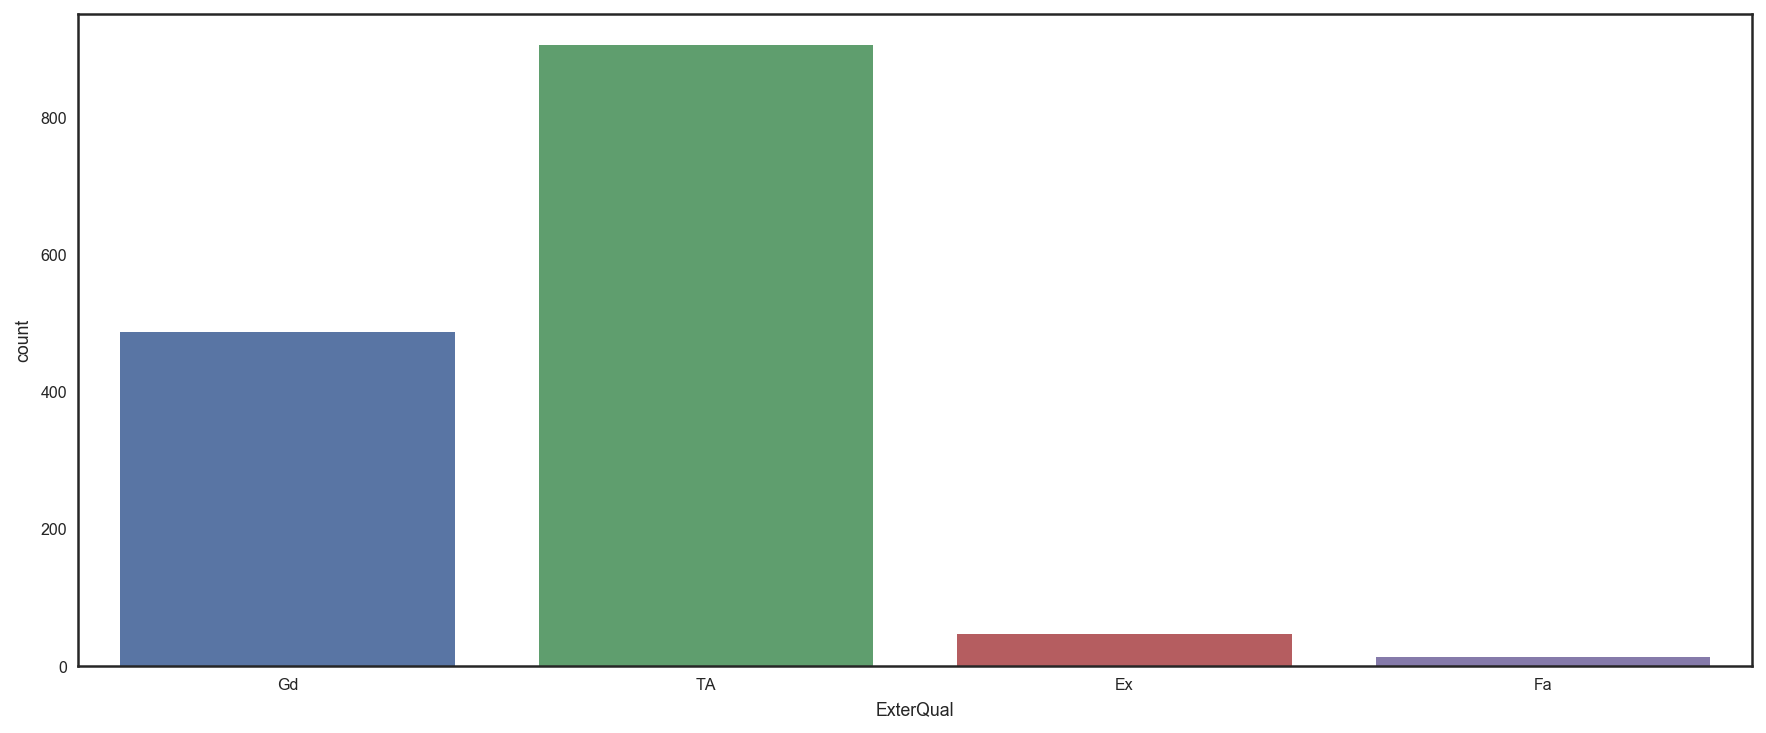

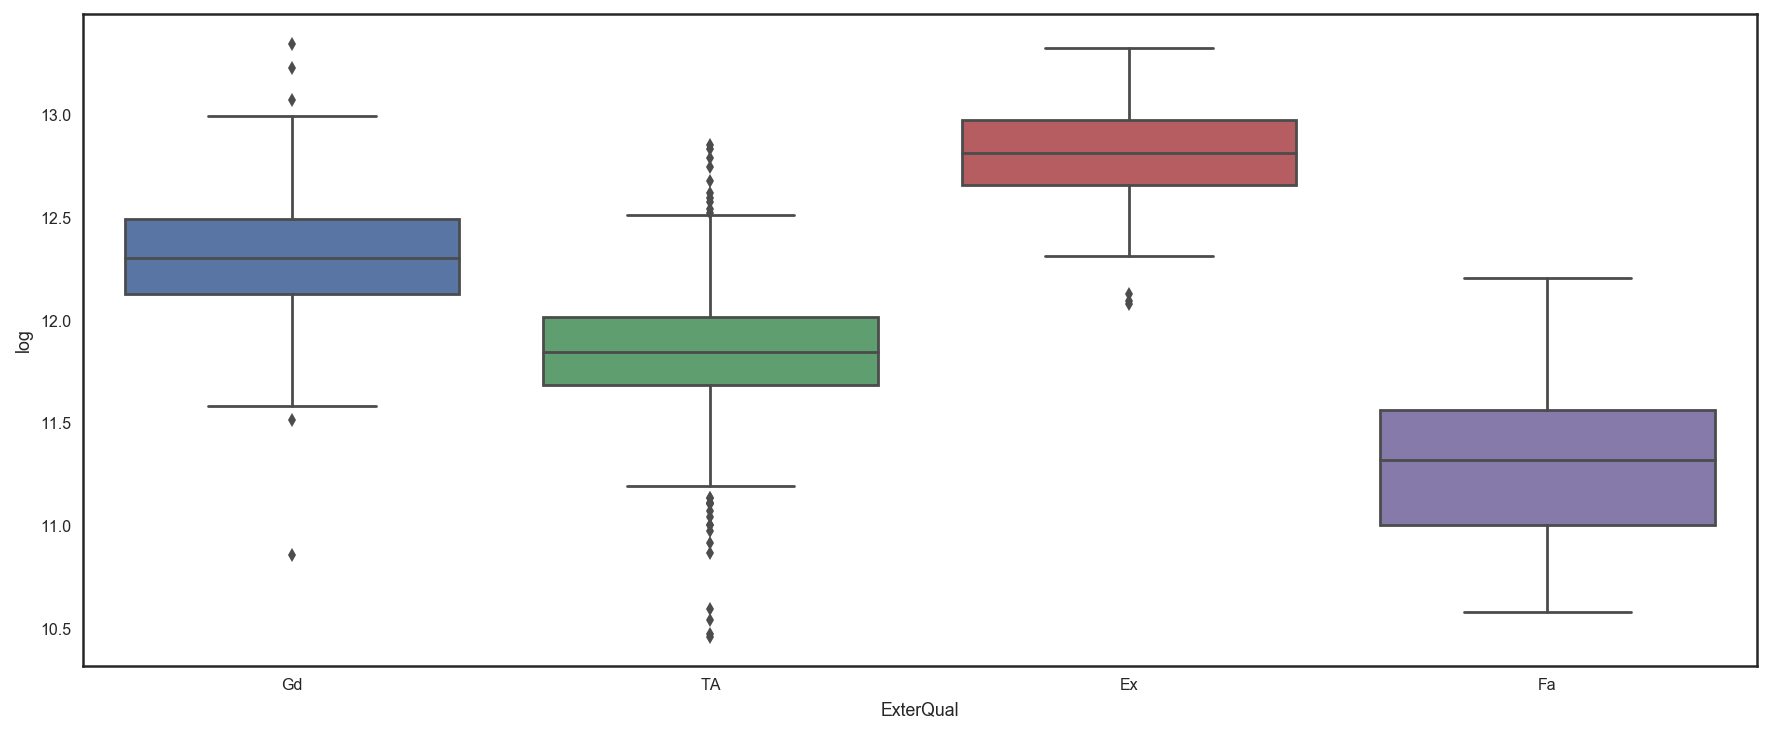

In [70]:
plt.figure(figsize=(15,6))
sns.countplot('ExterQual', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('ExterQual', 'log', data=train)
train['ExterQual'].value_counts()

TA    1275
Gd     145
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

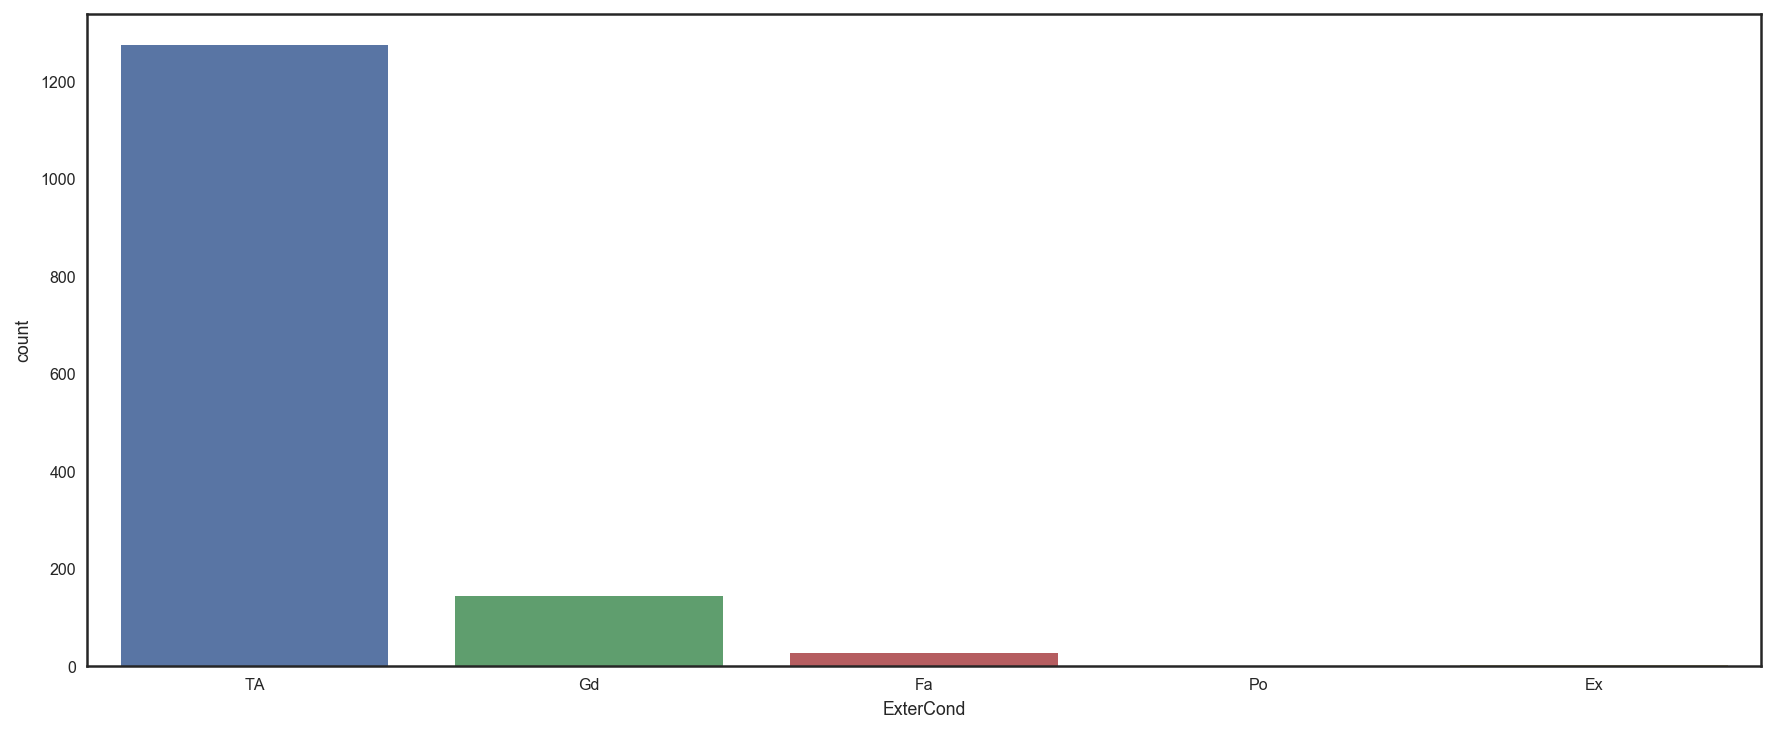

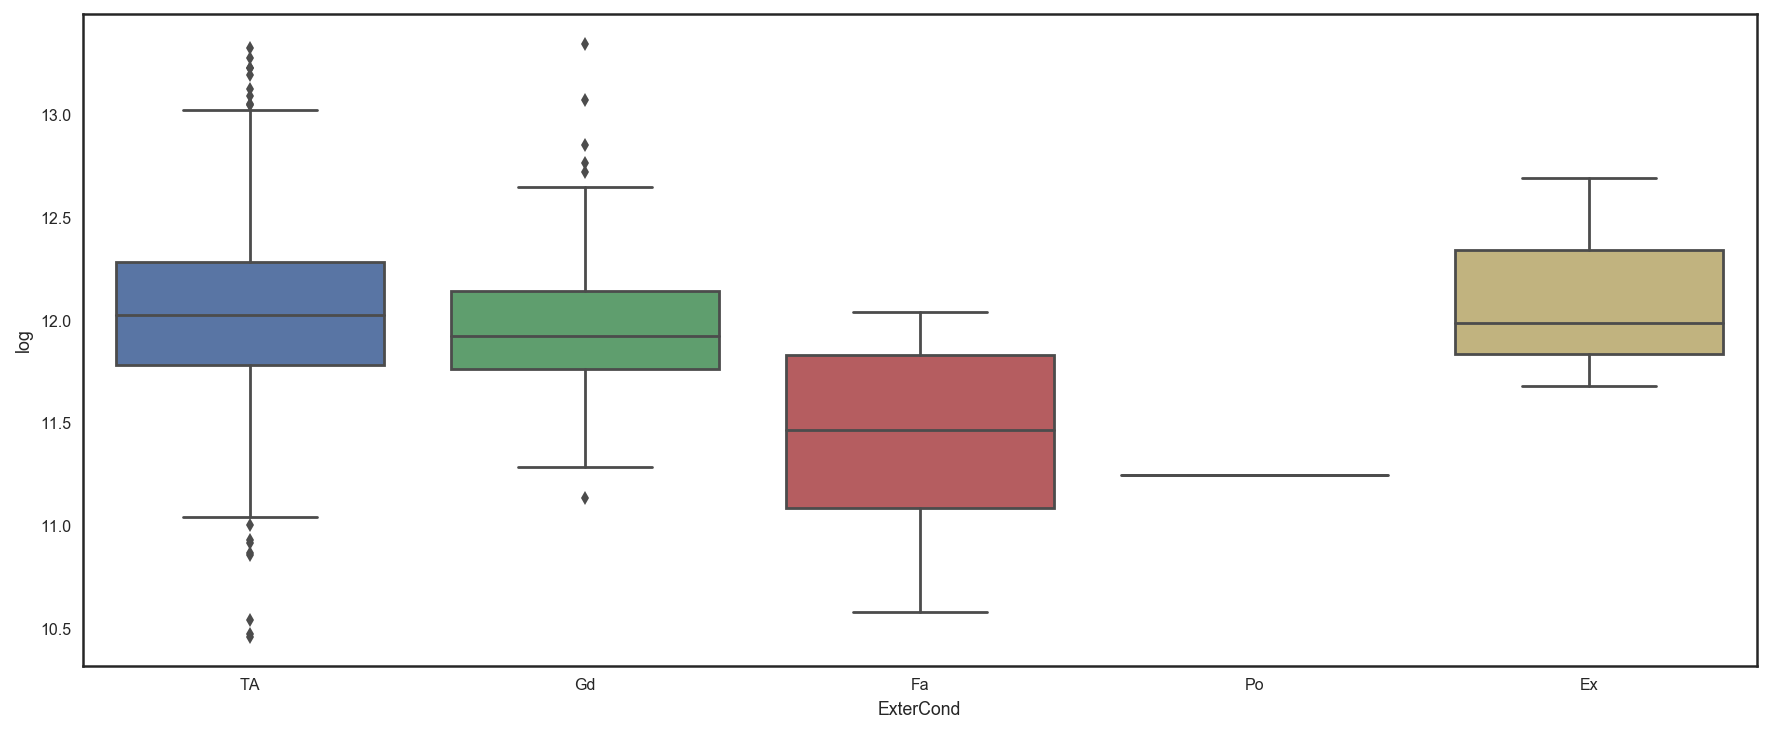

In [71]:
plt.figure(figsize=(15,6))
sns.countplot('ExterCond', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('ExterCond', 'log', data=train)
train['ExterCond'].value_counts()

TA    905
Gd    487
Ex     47
Fa     13
Name: ExterQual, dtype: int64

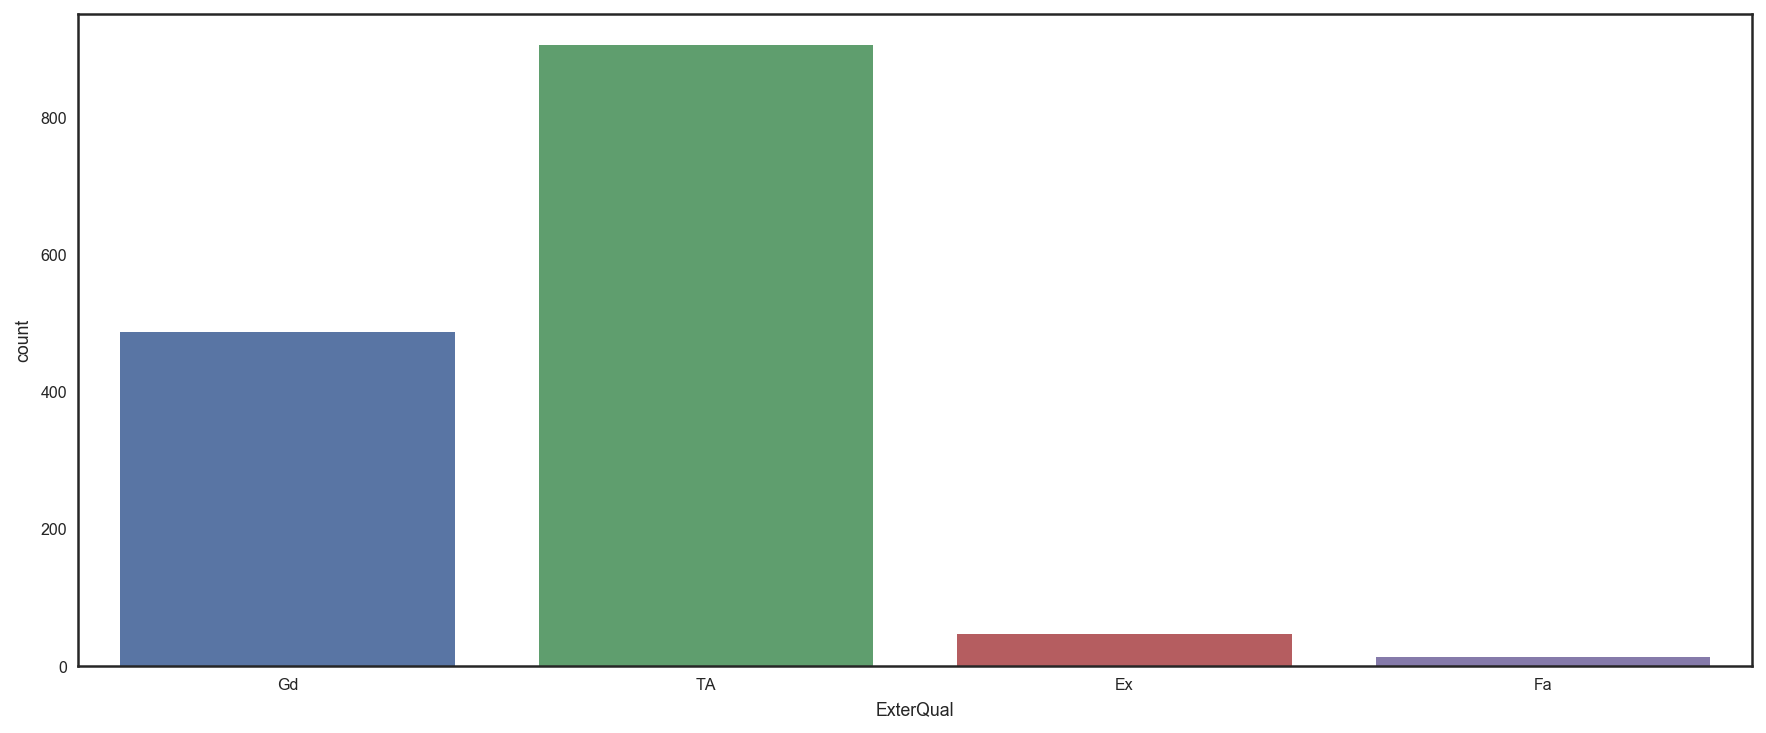

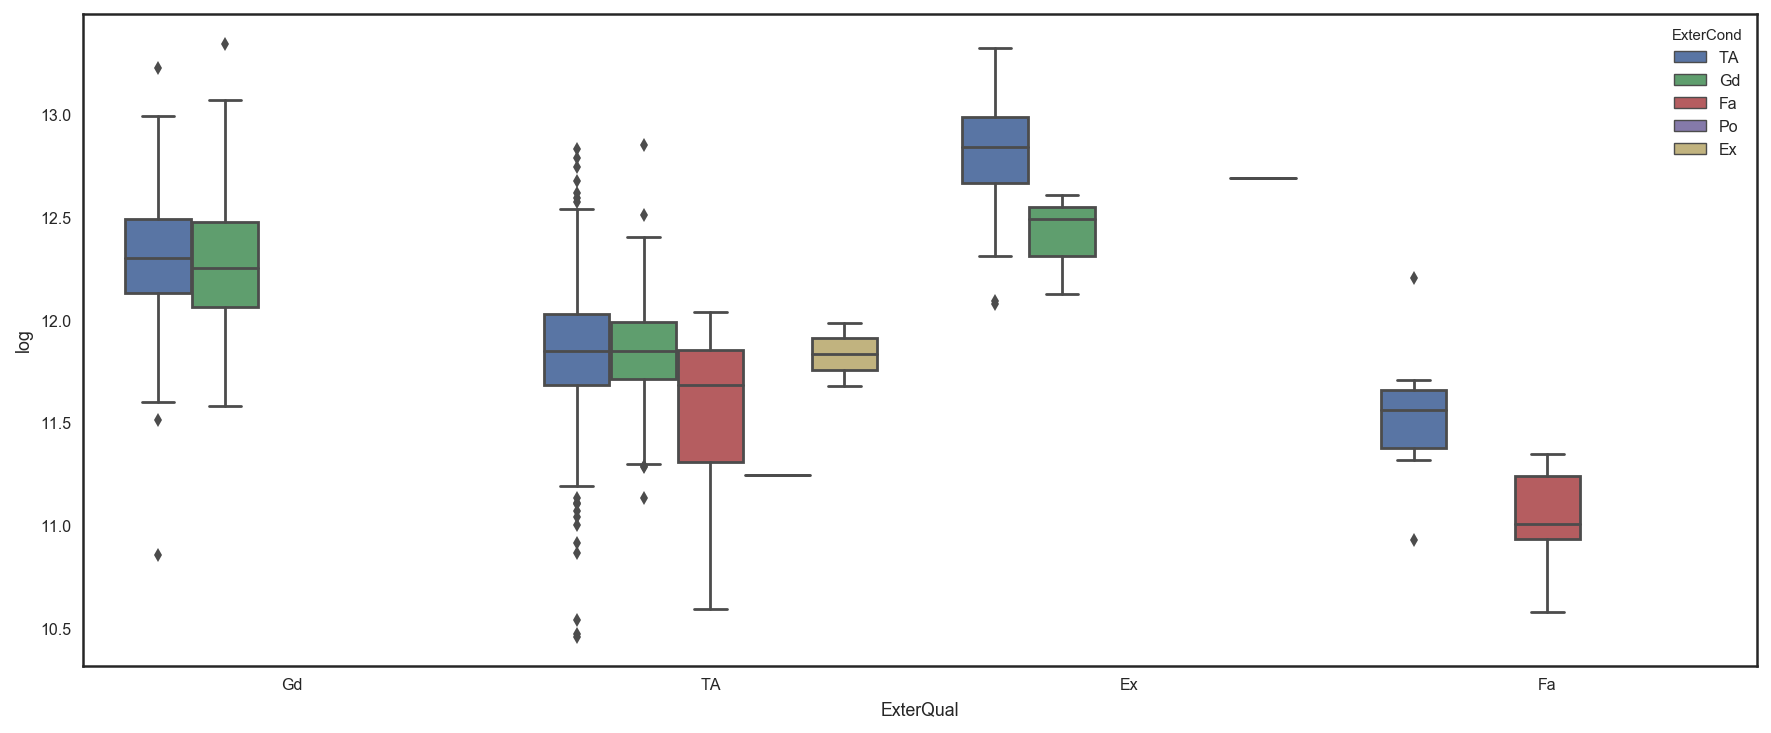

In [72]:
plt.figure(figsize=(15,6))
sns.countplot('ExterQual', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('ExterQual', 'log', hue='ExterCond', data=train)
train['ExterQual'].value_counts()

PConc     641
CBlock    632
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

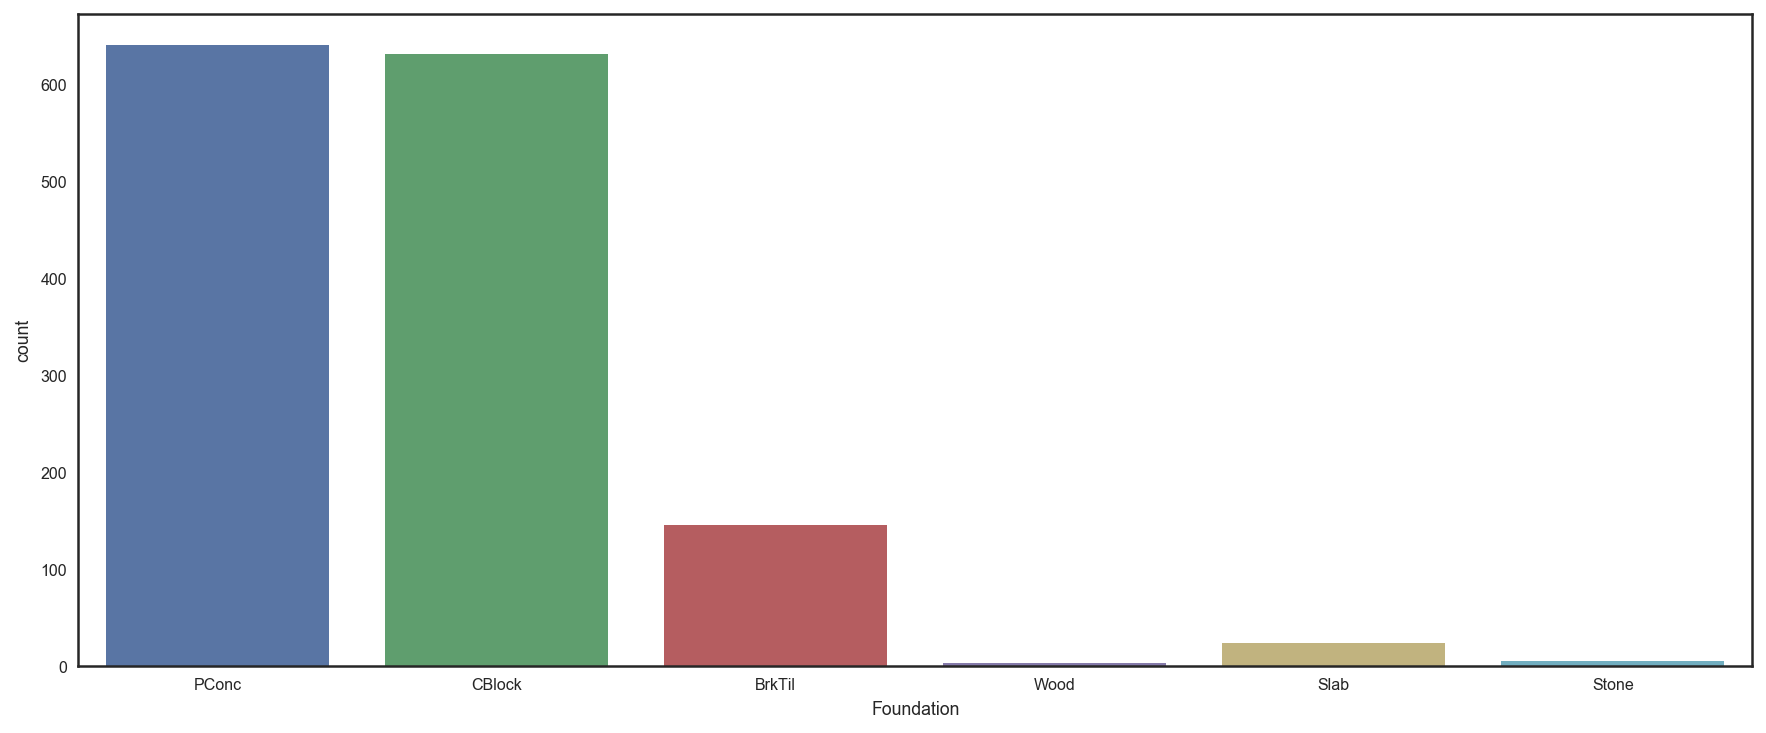

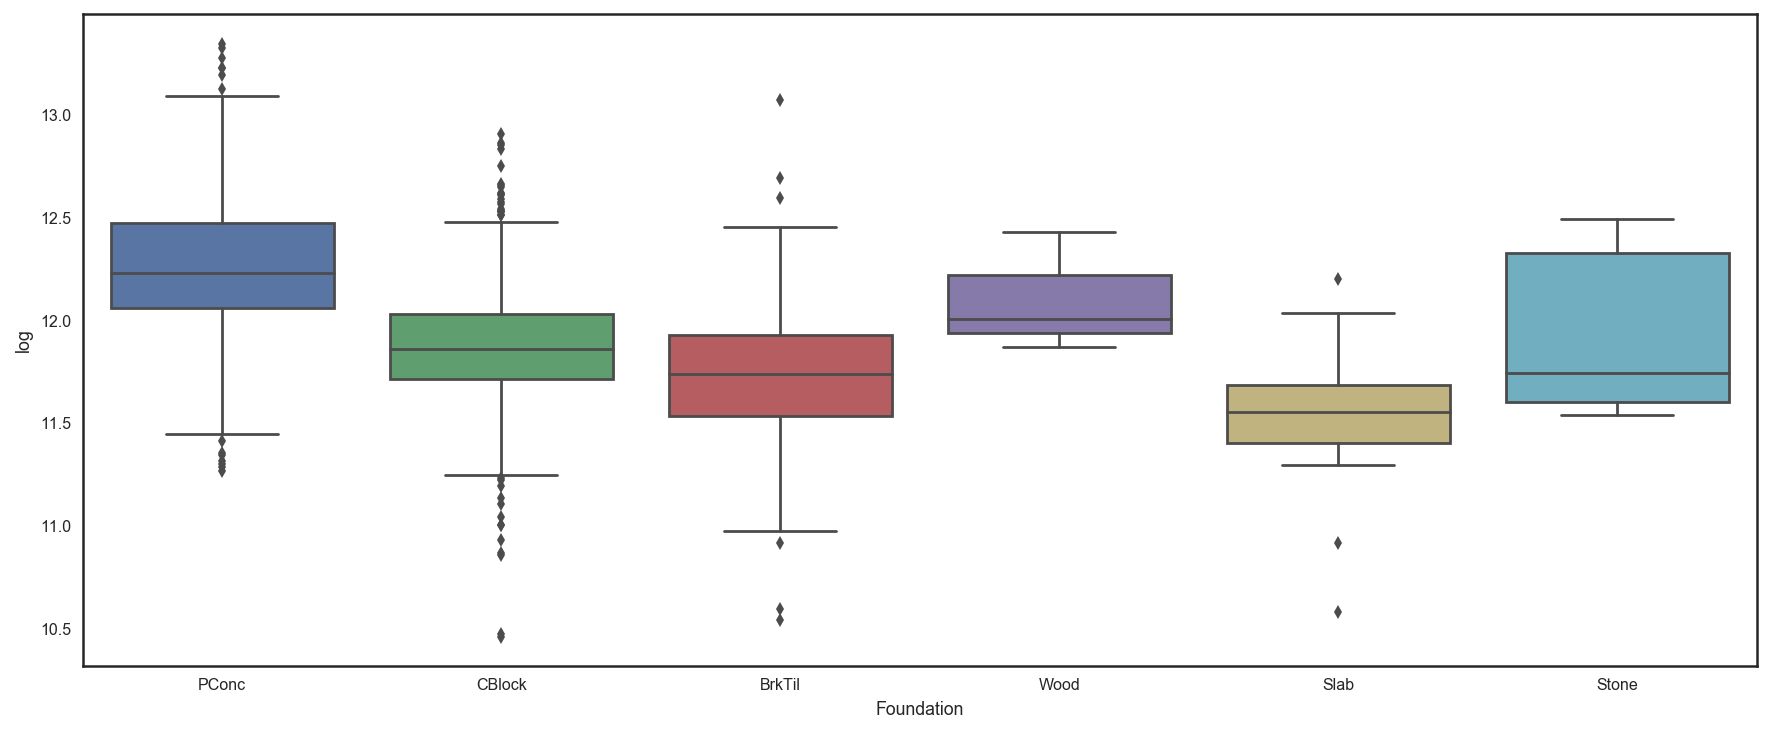

In [73]:
plt.figure(figsize=(15,6))
sns.countplot('Foundation', data=train)
plt.figure(figsize=(15,6))
sns.boxplot('Foundation', 'log', data=train)
train['Foundation'].value_counts()

**Discoveries:**

1. BsmtCond is not as useful as BsmtQual (consider regroup both of them into 3 grades?)
2. Log transformation of many features is useful.
3. Outliers are removed.
4. PoolQC, MiscFeature, ExterCond, RoofStyle, RoofMatl, Condition1, Condition2, BldgType, LandSlope, LotConfig, LandContour, LotSahpe, Utilities, LandSlope, MSSubClass, Street, Alley and Fense are not useful.
5. Exterior1st, Exterior2nd, BsmtExposure is not useful. BsmtFinType2 is not useful.
6. Consider regroup BsmtFinType1 into 3 grades.
7. Heating is not useful. Consider regroup heating into 2 grades.
8. Consider regroup Electrical into 2 groups.
9. Functional is not useful.
10. Regroup FireplaceQu into 3 grades?
11. Regroup GarageType into 3 grades.
12. GarageCond is either not helpful or can be regrouped into 2 grades. Maybe not helpful.
13. PavedDrive may be kept as is.
15. Only one of SaleType and SaleCondition is useful. (Partial and New are highly correlated).
16. OverallCond is not very helpful. (regroup into 2 grades?)
17. Regropu MSZoing into 2 grades.
18. HouseStyle does not seem very helpful.
19. MasVnrType needs more consideration. (Regroup into 2 grades?)
20. ExterQual is very useful.
21. Foundation can be regrouped into 2 grades.

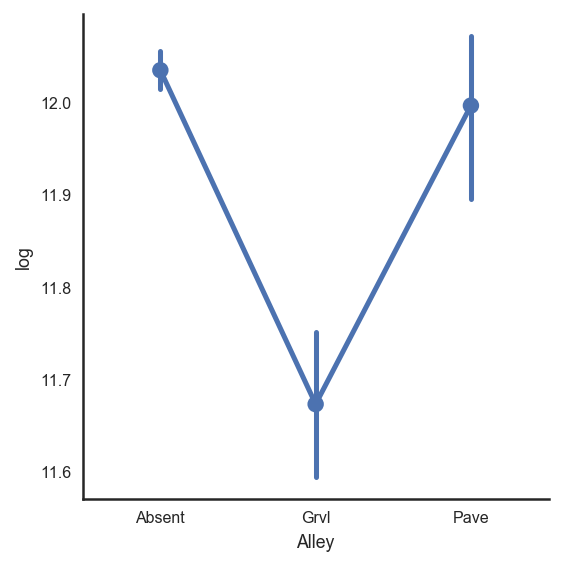

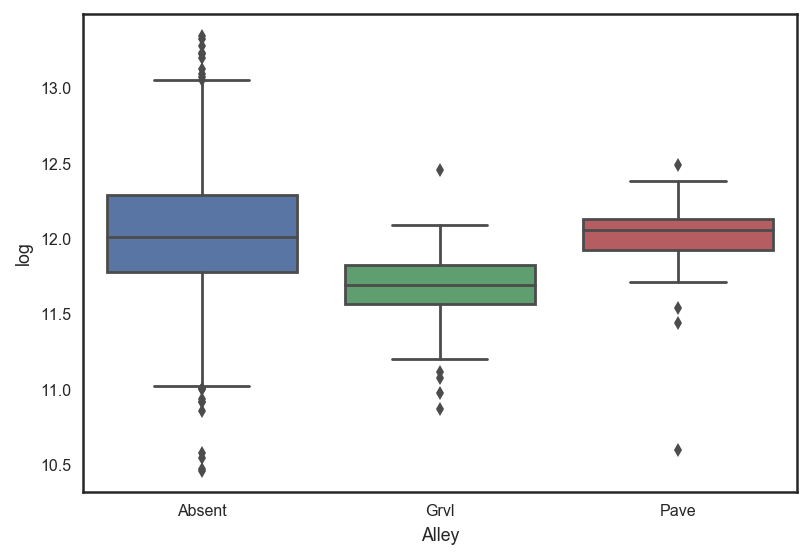

In [74]:
sns.factorplot(x='Alley', y='log', data=train)
plt.figure()
sns.boxplot(x='Alley', y='log', data=train)

**Fence may be coded into two features based on condioned mean sale price.**

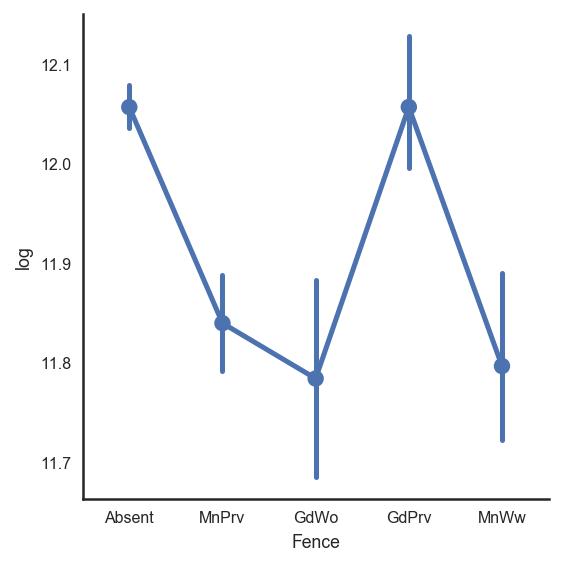

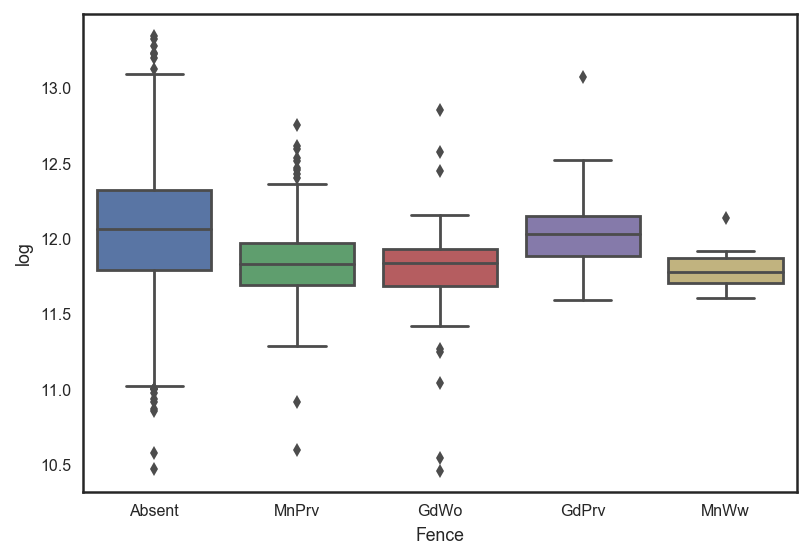

In [75]:
sns.factorplot(x='Fence', y='log', data=train)
plt.figure()
sns.boxplot(x='Fence', y='log', data=train)

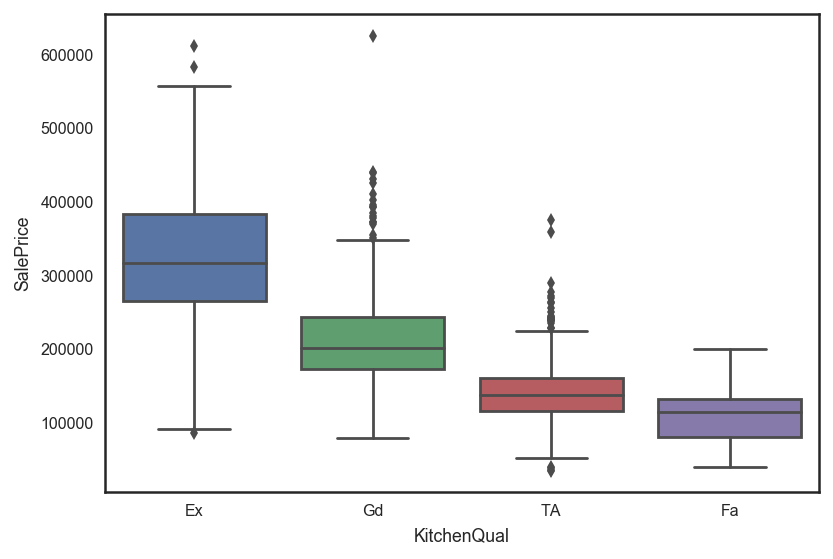

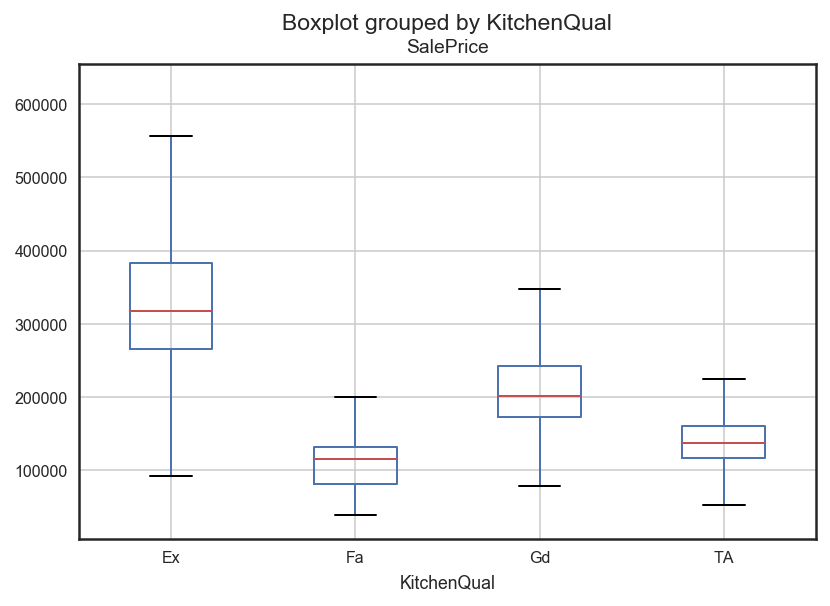

In [76]:
sns.boxplot(x='KitchenQual', y='SalePrice', data=train, order=['Ex', 'Gd', 'TA', 'Fa'])
train.boxplot('SalePrice', by='KitchenQual',)

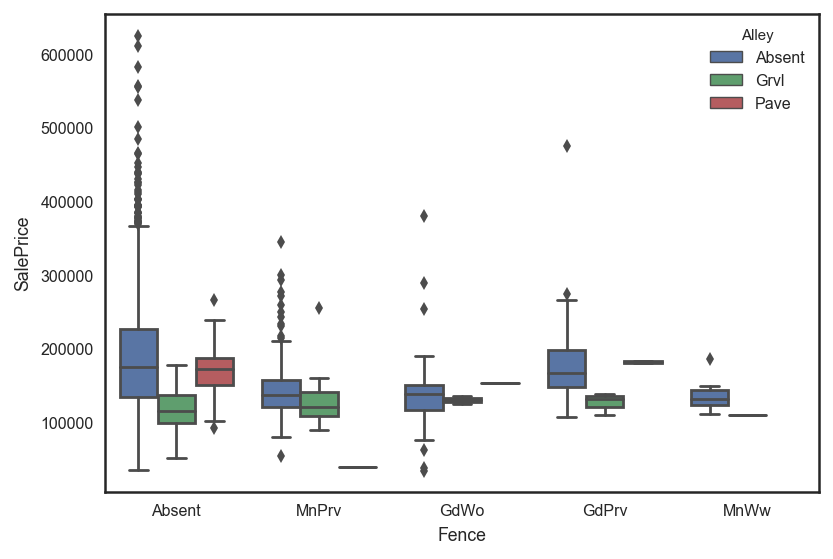

In [77]:
sns.boxplot(x='Fence', y='SalePrice', hue='Alley', data=train)

In [78]:
train[(train['Fence']=='MnPrv') & (train['Alley']=='Pave')]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
30  31          70  C (all)         50.0     8500   Pave  Pave      Reg   

   LandContour Utilities       ...        MoSold YrSold SaleType  \
30         Lvl    AllPub       ...             7   2008       WD   

   SaleCondition SalePrice        log log_1stFlrSF  log_GrLivArea  \
30        Normal     40000  10.596635     6.475433       7.183112   

    log_GarageArea  log_TotalBsmtSF  
30        5.857933         6.618739  

[1 rows x 86 columns]

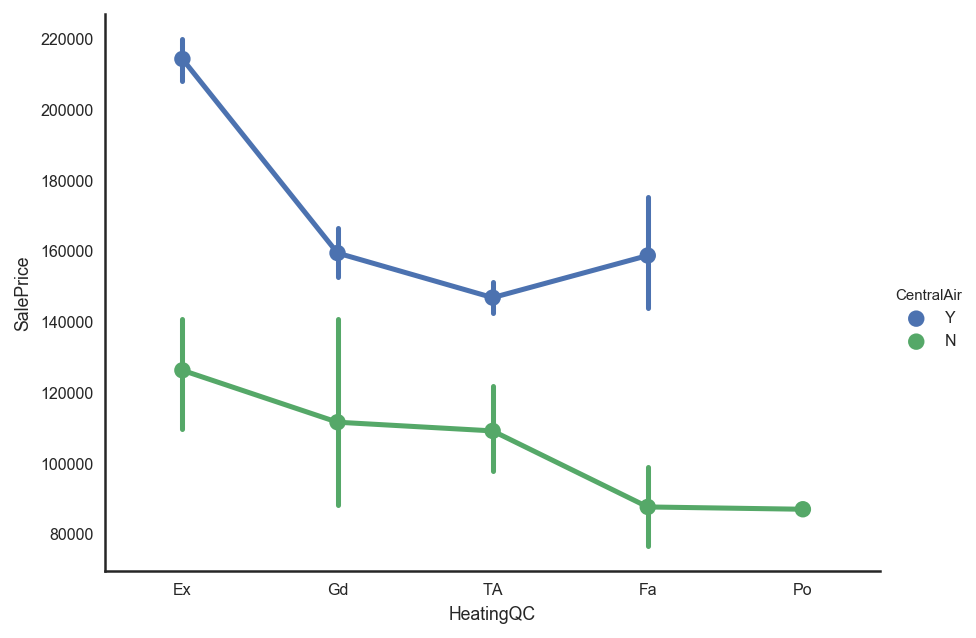

In [79]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, 
             size = 4.5, aspect = 1.4)

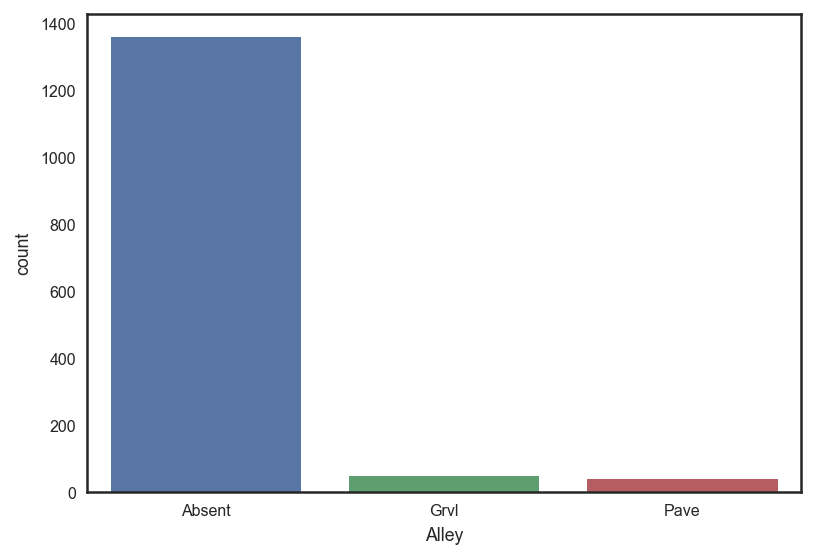

In [80]:
sns.countplot('Alley', data=train)

### Data wrangling

In [81]:
# combined = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
#                       test.loc[:,'MSSubClass':'SaleCondition']], axis=0)

# combined.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
#                'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
#                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
#               axis=1, inplace=True)

# combined = pd.get_dummies(combined)

# X_train = combined[0: train.shape[0]]
# X_test = combined[train.shape[0]:]
# y = np.log(train.SalePrice)

In [82]:
combined = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']], axis=0)

# drop_cols = ['PoolQC', 'MiscFeature', 'ExterCond', 'RoofStyle', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType',
#              'LandSlope', 'LotConfig', 'LandContour', 'LotShape', 'Utilities', 'MSSubClass', 'Street', 'Heating',
#              'Alley', 'Fence', 'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'BsmtFinType2', 'Functional', 'HouseStyle']

# combined.drop(drop_cols, axis=1, inplace=True)

# combined['log_1stFlrSF'] = np.log(combined['1stFlrSF'])
# combined['log_GrLivArea'] = np.log(combined['GrLivArea'])
# combined['log_GarageArea'] = np.log(combined['GarageArea']+100)
# combined['log_TotalBsmtSF'] = np.log(combined.TotalBsmtSF + 100)
# combined.drop(['1stFlrSF', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'], axis=1, inplace=True)
continuous_vars = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch',\
                'GarageArea', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'MiscVal',\
                'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF']
skew_threshold = 2
for entry in continuous_vars:
    if combined[entry].skew() > skew_threshold:
        combined[entry] = np.log1p(combined[entry])

from sklearn.preprocessing import StandardScaler
sub_df = combined[continuous_vars]
array_standard = StandardScaler().fit_transform(sub_df)
# df_standard = pd.DataFrame(array_standard, combined.index, continuous_vars)
# combined.drop(combined[continuous_vars], axis=1, inplace=True)
# combined = pd.concat([combined, df_standard], axis=1)
combined[continuous_vars] = array_standard
# print(array_standard, combined['LotArea'])

combined['MSSubClass'] = combined['MSSubClass'].astype(str)
    
combined['BsmtCond_new'] = combined['BsmtCond']
combined.loc[combined['BsmtCond'].isin(['TA', 'Gd']), 'BsmtCond_new'] = 'Gd'
combined.loc[combined['BsmtCond'].isin(['Absent', 'Fa']), 'BsmtCond_new'] = 'Fa'

combined['BsmtQual_new'] = combined['BsmtQual']
combined.loc[combined['BsmtQual']=='Absent', 'BsmtQual_new'] = 'Fa'

combined['BsmtFinType1_new'] = combined['BsmtFinType1']
combined.loc[~combined['BsmtFinType1'].isin(['GLQ', 'Absent']), 'BsmtFinType1_new'] = 'Avg'

combined['Electrical_new'] = combined['Electrical']
combined.loc[~(combined['Electrical']=='SBrkr'), 'Electrical_new'] = 'Other'

combined['FireplaceQu_new'] = combined['FireplaceQu']
combined.loc[combined['FireplaceQu'].isin(['Fa', 'Po', 'Absent']), 'FireplaceQu_new'] = 'Po'
combined.loc[combined['FireplaceQu'].isin(['Gd', 'TA']), 'FireplaceQu_new'] = 'Gd'

combined['GarageType_new'] = combined['GarageType']
combined.loc[combined['GarageType'].isin(['Attchd', 'BuiltIn']), 'GarageType_new'] = 'Type1'
combined.loc[combined['GarageType'].isin(['Detchd', 'Basment', '2Types']), 'GarageType_new'] = 'Type2'
combined.loc[combined['GarageType'].isin(['Absent', 'CarPort']), 'GarageType_new'] = 'Type3'

combined['GarageCond_new'] = combined['GarageCond']
combined.loc[combined['GarageCond'].isin(['Ex', 'Gd', 'TA']), 'GarageCond_new'] = 'Gd'
combined.loc[combined['GarageCond'].isin(['Fa', 'Po', 'Absent']), 'GarageCond_new'] = 'Po'

combined.loc[combined['OverallCond']<5, 'enc_OverallCond'] = 'Po'
combined.loc[combined['OverallCond']>=5, 'enc_OverallCond'] = 'Gd'
# combined.drop('OverallCond', axis=1, inplace=True)

combined['MSZoning_new'] = combined['MSZoning']
combined.loc[combined['MSZoning'].isin(['RL', 'FV']), 'MSZoning_new'] = 'Gd'
combined.loc[combined['MSZoning'].isin(['RM', 'RH']), 'MSZoning_new'] = 'Fa'

combined['MasVnrType_new'] = combined['MasVnrType']
combined.loc[~combined['MasVnrType'].isin(['Stone']), 'MasVnrType_new'] = 'Other'

combined['Foundation_new'] = combined['Foundation']
combined.loc[combined['Foundation'].isin(['PConc', 'Wood']), 'Foundation_new'] = 'Gd'
combined.loc[combined['Foundation'].isin(['CBlock', 'BrkTil', 'Slab', 'Stone']), 'Foundation_new'] = 'Po'

# combined[0: train.shape[0]].enc_OverallCond.value_counts() 
# combined.Foundation.value_counts()

In [83]:
combined = pd.get_dummies(combined)

X_train = combined[0: train.shape[0]]
X_test = combined[train.shape[0]:]
y = train.log

In [84]:
combined.shape

(2911, 345)

In [21]:
# ttrain = train
# ttrain.loc[ttrain['Foundation'].isin(['PConc', 'Wood']), 'Foundation'] = 'Gd'
# ttrain.loc[ttrain['Foundation'].isin(['CBlock', 'BrkTil', 'Slab', 'Stone']), 'Foundation'] = 'Po'
# sns.boxplot(x='Foundation', y='log', data=ttrain)
# ttrain.Foundation.value_counts()

### Playing with various machine learning algorithms

In [85]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Ridge regression

In [86]:
cv_ridge = RidgeCV(alphas=np.arange(16,18,.2),
    cv=10, normalize=True,
    scoring='neg_mean_squared_error')
# cv_ridge.fit(X_train, y)
ridgescore = np.sqrt(-cross_val_score(cv_ridge, X_train, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1))

In [87]:
np.mean(ridgescore)

0.10892690008580411

In [88]:
cv_ridge.fit(X_train, y)
cv_ridge.alpha_
cvres = cv_ridge.predict(X_test)

In [89]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = np.exp(cvres)
sub.head()
# sub.to_csv('sub2.csv', index=False)

Id      SalePrice
0  1461  121769.701654
1  1462  153112.567747
2  1463  183368.618054
3  1464  200280.647457
4  1465  191279.062857

#### Gradient boosting

In [90]:
param_grid = [{'n_estimators': [2500, 5000, 7500], 'learning_rate': [0.01], 'max_depth': [4,6,8]}]
GBest = GradientBoostingRegressor(max_features='sqrt',  min_samples_leaf=15, min_samples_split=10)

clf = GridSearchCV(GBest, param_grid, n_jobs=-1)

In [79]:
gbscore = np.sqrt(-cross_val_score(clf, X_train, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1))


In [80]:
np.mean(gbscore)

0.11559940685781937

In [140]:
clf.fit(X_train, y)
gbres = clf.predict(X_test)

In [428]:
# gbsub = pd.DataFrame()
# gbsub['Id'] = test['Id']
# gbsub['SalePrice'] = np.exp(gbres)
# gbsub.head()

Id      SalePrice
0  1461  124625.007288
1  1462  151921.258492
2  1463  189885.470332
3  1464  193888.437928
4  1465  199437.701804

In [429]:
# gbsub.to_csv('gbsub.csv', index=False)

#### Adaboost

In [141]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=1500, learning_rate=.1, loss='square')

param_grid = [{'n_estimators': [1000, 2000, 3000], 'learning_rate': [0.01,0.05, 0.1, 0.2], 'max_depth': [3,4,5]}]
ada = GradientBoostingRegressor(max_features='sqrt')

clf = GridSearchCV(ada, param_grid, n_jobs=-1)

In [142]:
adascore = np.sqrt(-cross_val_score(clf, X_train, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1))

In [143]:
np.mean(adascore)

0.11718452834974555

In [144]:
clf.fit(X_train, y)
adares = clf.predict(X_test)

In [434]:
# adasub = pd.DataFrame()
# adasub['Id'] = test['Id']
# adasub['SalePrice'] = np.exp(adares)
# adasub.head()

Id      SalePrice
0  1461  125003.500747
1  1462  163438.675137
2  1463  187199.113370
3  1464  192548.102268
4  1465  189973.970668

In [435]:
# adasub.to_csv('adasub.csv', index=False)

#### Lasso 

In [68]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(eps=1e-2, n_alphas=500, cv=10, normalize=True)

In [69]:
lasso.fit(X_train, y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.01, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [70]:
lasso.alpha_

9.0594259693076512e-05

In [71]:
np.mean(np.sqrt(-cross_val_score(lasso, X_train, y, scoring='neg_mean_squared_error', cv=5)))

0.1102427296589803

In [55]:
lasres = lasso.predict(X_test)

In [156]:
final2 = pd.DataFrame()
final2['Id'] = test.Id
final2['SalePrice'] = (np.exp(lasres)+np.exp(adares)+np.exp(gbres)+np.exp(cvres))/4
final2.to_csv('mean.csv', index=False)
final2.head()

Id      SalePrice
0  1461  123438.148132
1  1462  156175.519491
2  1463  185221.345300
3  1464  194220.444257
4  1465  196224.919873

In [122]:
# final2 = pd.DataFrame()
# final2['Id'] = test.Id
# final2['SalePrice'] = np.exp(lasres)
# final2.to_csv('lassub.csv', index=False)

In [170]:
# final2.head()

Id      SalePrice
0  1461  114944.494758
1  1462  160121.581393
2  1463  180276.420803
3  1464  196330.740653
4  1465  202756.603816

#### xgboost

In [103]:
import xgboost as xgb

In [104]:
xx = xgb.XGBRegressor(max_depth=4, n_estimators=1500, learning_rate=.1)


In [106]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, y_train, y_test = train_test_split(X_train, y, test_size=.3)
xx.fit(XX_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
yp = xx.predict(XX_test)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
np.sqrt(mean_squared_error(y_test, yp))

0.12194719762931103

In [513]:
xx = xgb.XGBRegressor(max_depth=3, n_estimators=1500, learning_rate=.1)
xx.fit(X_train, y)
ypp = xx.predict(X_test)
xg = pd.DataFrame()
xg['Id'] = test.Id
xg['SalePrice'] = np.exp(ypp)
xg.head()

Id      SalePrice
0  1461  121098.328125
1  1462  170189.406250
2  1463  194083.453125
3  1464  197150.531250
4  1465  180380.578125

In [514]:
xg.to_csv('xg.csv', index=False)